In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

APIv2 Get Request for 2017 year

GET places all of of our request variables in the URL itself. 

### CRUDE OIL IMPORTS (2017 only) FROM 'WORLD' INTO 'U.S.' REGIONS `crude_oil_imports`

- Destination
- \# Thousand Barrels
- Origin Information
- Destination Information
- Monthly Data
- Sweet and Sour grades

In [231]:
import requests
import json

api_url = 'https://api.eia.gov/v2/crude-oil-imports/data/'

api_key = 'aoHhoswkkxINMHkxRwyOtf2FESkGkI3t1F8hDdbC'

params = {"api_key": api_key}

header = {
    "frequency": "monthly",
    "data": ["quantity"],
    "facets": {
        "destinationType": ["PP", "PS", "PT", "RF", "RP", "RS", "US"],
        "gradeId": ["HSO", "HSW", "LSO", "LSW", "MED"],
        "destinationId": ["PP_1", "PP_2", "PP_3", "PP_4", "PP_5", "PP_6"],
        "originType": ["CTY", "OPN", "REG"]
    },
    "start": "2017-01",
    "end": "2017-12",
    "sort": [{"column": "period", "direction": "desc"}],
    "offset": 0,
    "length": 5000
}

r = requests.get(api_url, params=params, headers={"X-Params": json.dumps(header)})

In [232]:
data = r.json()

1. Flatten the nested JSON structure
2. Convert to DataFrame format

In [233]:
# Extract data from the 'data' key
data_list = data['response']['data']

# Flatten the nested JSON structure
flattened_data = []
for entry in data_list:
    flattened_entry = {}
    for key, value in entry.items():
        if isinstance(value, dict):
            for subkey, subvalue in value.items():
                flattened_entry[subkey] = subvalue
        else:
            flattened_entry[key] = value
    flattened_data.append(flattened_entry)

# Convert the flattened data into a DataFrame
df = pd.DataFrame(flattened_data)

# Print the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2081 entries, 0 to 2080
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   period               2081 non-null   object
 1   originId             2081 non-null   object
 2   originName           2081 non-null   object
 3   originType           2081 non-null   object
 4   originTypeName       2081 non-null   object
 5   destinationId        2081 non-null   object
 6   destinationName      2081 non-null   object
 7   destinationType      2081 non-null   object
 8   destinationTypeName  2081 non-null   object
 9   gradeId              2081 non-null   object
 10  gradeName            2081 non-null   object
 11  quantity             2081 non-null   object
 12  quantity-units       2081 non-null   object
dtypes: object(13)
memory usage: 211.5+ KB
None


**ONLY RUN THIS ONCE** as the DataFrame is modified when ran multiple times

In [234]:
# Assuming df is your DataFrame containing the 'period' column
df['period'] = pd.to_datetime(df['period'])

# Sort the DataFrame based on the 'period' column
df = df.sort_values(by='period')

         period originId originName originType originTypeName destinationId  \
2080 2017-01-01    WORLD      World      WORLD          World          PP_2   
1972 2017-01-01   CTY_VE  Venezuela        CTY        Country          PP_3   
1971 2017-01-01   CTY_VE  Venezuela        CTY        Country          PP_3   
1970 2017-01-01   CTY_NO     Norway        CTY        Country          PP_1   
1969 2017-01-01   CTY_LY      Libya        CTY        Country          PP_3   
1968 2017-01-01   CTY_IZ       Iraq        CTY        Country          PP_1   
1967 2017-01-01   CTY_IZ       Iraq        CTY        Country          PP_3   
1966 2017-01-01   CTY_IZ       Iraq        CTY        Country          PP_3   
1965 2017-01-01   CTY_GT  Guatemala        CTY        Country          PP_3   
1964 2017-01-01   CTY_NI    Nigeria        CTY        Country          PP_1   
1963 2017-01-01   CTY_NI    Nigeria        CTY        Country          PP_1   
1962 2017-01-01   CTY_NI    Nigeria        CTY      

In [235]:
df = df.reset_index(drop=True)

Modifications:
- format destinationName to be of format 'PADDx' like in other datasets 'remove actual name'
- destinationTypeName is always 'Port PADD' so remove the destination types.

In [236]:
# drop some columns
df = df.drop(['originType', 'destinationType', 'destinationTypeName', 'gradeName', 'destinationId'], axis=1)

In [239]:
df['destinationName'] = 'PADD '+df['destinationName'].str.extract(r'PADD(\d+)').astype(str)

No `nan` values in this dataset for number of barrels of crude oil

In [105]:
df.quantity.isna().sum()

0

In [240]:
crude_oil_imports = df

In [241]:
crude_oil_imports

,period,originId,originName,originTypeName,destinationName,gradeId,quantity,quantity-units
0,2017-01-01,WORLD,World,World,PADD 2,MED,9463,thousand barrels
1,2017-01-01,CTY_VE,Venezuela,Country,PADD 3,HSW,962,thousand barrels
2,2017-01-01,CTY_VE,Venezuela,Country,PADD 3,HSO,16197,thousand barrels
3,2017-01-01,CTY_NO,Norway,Country,PADD 1,LSW,2049,thousand barrels
4,2017-01-01,CTY_LY,Libya,Country,PADD 3,LSW,581,thousand barrels
...,...,...,...,...,...,...,...,...
2076,2017-12-01,CTY_VE,Venezuela,Country,PADD 3,HSO,12550,thousand barrels
2077,2017-12-01,CTY_VE,Venezuela,Country,PADD 3,HSW,994,thousand barrels
2078,2017-12-01,CTY_BR,Brazil,Country,PADD 3,HSO,938,thousand barrels
2079,2017-12-01,CTY_BR,Brazil,Country,PADD 5,HSW,251,thousand barrels


In [303]:
# Convert values in quantity from string values to float values
print(type(crude_oil_imports['quantity'][0])) # each value is a string
crude_oil_imports['quantity'] = crude_oil_imports['quantity'].astype(float)

<class 'str'>


In [356]:
crude_oil_imports.originName.unique()

array(['World', 'Venezuela', 'Norway', 'Libya', 'Iraq', 'Guatemala',
       'Nigeria', 'Ghana', 'Canada', 'Brazil', 'Asia-Pacific', 'Europe',
       'Africa', 'Mexico', 'Saudi Arabia', 'Kuwait', 'Ecuador', 'Chad',
       'Vietnam', 'United Kingdom', 'Algeria', 'Angola', 'Colombia',
       'Indonesia', 'Middle East', 'Non-OPEC', 'Canada (Region)',
       'Other Americas', 'OPEC', 'Eurasia', 'Thailand', 'Yemen', 'Russia',
       'Trinidad and Tobago', 'United Arab Emirates', 'Mauritania',
       'Egypt', 'Papua New Guinea', 'Equatorial Guinea', 'Azerbaijan',
       'Australia', 'Gabon', 'Brunei', 'Peru', 'Congo-Brazzaville',
       'Oman', 'Denmark', "Cote d'Ivoire", 'Malaysia'], dtype=object)

In [386]:
# drop PADD 6 from the dataset as it is practically insignificant
crude_oil_imports = crude_oil_imports[crude_oil_imports['destinationName'] != 'PADD 6']

**NOTES**

- Crude oil can be referred to as sour or sweet, based on the sulfur content of the unrefined oil. Sufur must be removed when refining crude. High sulfur content can also lead to the degradation of metals used in the refining process. Crude oil with a sulfur content greater than 0.5% is considered sour; less than 0.5% is sweet.

- WTI and Brent: When it comes to physical oil, there are different grades. The most heavily traded grades are Brent North Sea crude (commonly known as "Brent crude") and West Texas Intermediate (commonly known as "WTI"). Brent is oil that is produced in the Brent oil fields and other sites in the North Sea. Brent crude's price is the benchmark for African, European, and Middle Eastern crude oil. The pricing mechanism for Brent dictates the value of roughly two-thirds of the world's crude oil production. The percentage of sulfur in crude oil determines the amount of processing needed to refine the oil into energy products. "Sweet crude" is a term that refers to crude oil that has less than 1% sulfur. The sulfur content of both Brent and WTI is well under 1%, making them both “sweet.” These types are also less dense (“lighter”) than many of the crude oils extracted elsewhere. Both of these characteristics make them easier to refine and more attractive to petroleum product producers

### U.S. REFINERS ACQUISITION COST $ OF CRUDE OIL `df_ref_cost`


- `Composite Acquisition Cost`: collects the net acquisition costs and volumes of crude oil, both domestic and imported, on a corporate regional basis (i.e., not for individual refineries).

**Each month, refiners report the volume (in thousands  of barrels) and costs (in thousands of dollars) for:**

Domestic crude oil. Oil produced in the United States or from its outer continental shelf.

Imported crude oil. Oil produced outside the United States and brought into the United States for domestic processing.

In [243]:
import requests
import json

api_url = 'https://api.eia.gov/v2/petroleum/pri/rac2/data/'

api_key = 'aoHhoswkkxINMHkxRwyOtf2FESkGkI3t1F8hDdbC'

params = {"api_key": api_key}

header = {
    "frequency": "monthly",
    "data": [
        "value"
    ],
    "facets": {
        "series": [
            "R0000____3",
            "R0010____3",
            "R0020____3",
            "R0030____3",
            "R0040____3",
            "R0050____3"
        ],
        "process": [
            "PCT"
        ],
        "product": [
            "EPC0"
        ]
    },
    "start": "2017-01",
    "end": "2017-12",
    "sort": [
        {
            "column": "period",
            "direction": "desc"
        }
    ],
    "offset": 0,
    "length": 5000
}

r = requests.get(api_url, params=params, headers={"X-Params": json.dumps(header)})

In [244]:
data = r.json()
# Extract data from the 'data' key
data_list = data['response']['data']

# Flatten the nested JSON structure
flattened_data = []
for entry in data_list:
    flattened_entry = {}
    for key, value in entry.items():
        if isinstance(value, dict):
            for subkey, subvalue in value.items():
                flattened_entry[subkey] = subvalue
        else:
            flattened_entry[key] = value
    flattened_data.append(flattened_entry)

# Convert the flattened data into a DataFrame
df = pd.DataFrame(flattened_data)

# Print the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   period              66 non-null     object
 1   duoarea             66 non-null     object
 2   area-name           66 non-null     object
 3   product             66 non-null     object
 4   product-name        66 non-null     object
 5   process             66 non-null     object
 6   process-name        66 non-null     object
 7   series              66 non-null     object
 8   series-description  66 non-null     object
 9   value               66 non-null     object
 10  units               66 non-null     object
dtypes: object(11)
memory usage: 5.8+ KB
None


**ONLY RUN CELL ONCE TO SORT DATES IN CHRONOLOGICAL ORDER**

In [246]:
# Assuming df is your DataFrame containing the 'period' column
df['period'] = pd.to_datetime(df['period'])

# Sort the DataFrame based on the 'period' column
df = df.sort_values(by='period')

In [247]:
df = df.reset_index(drop=True)

In [248]:
df = df.drop(['duoarea', 'product', 'product-name', 'process', 'process-name', 'series', 'series-description'], axis=1)

In [249]:
df

,period,area-name,value,units
0,2017-01-01,PADD 3,49.85,$/BBL
1,2017-01-01,PADD 5,52.61,$/BBL
2,2017-01-01,PADD 2,48.26,$/BBL
3,2017-01-01,PADD 1,53.34,$/BBL
4,2017-01-01,PADD 4,46.38,$/BBL
...,...,...,...,...
61,2017-11-01,U.S.,57.75,$/BBL
62,2017-11-01,PADD 5,61.5,$/BBL
63,2017-11-01,PADD 4,53.78,$/BBL
64,2017-11-01,PADD 3,57.89,$/BBL


In [250]:
df_ref_cost = df

In [103]:
# Extract only the PADD code from 'area-name' column
#df_ref_cost['area-name'] = df_ref_cost['area-name'].str.replace('PADD ', 'PADD')

In [307]:
df_ref_cost['value'] = df_ref_cost['value'].astype(float)

In [310]:
df_ref_cost

,period,area-name,value,units
0,2017-01-01,PADD 3,49.85,$/BBL
1,2017-01-01,PADD 5,52.61,$/BBL
2,2017-01-01,PADD 2,48.26,$/BBL
3,2017-01-01,PADD 1,53.34,$/BBL
4,2017-01-01,PADD 4,46.38,$/BBL
...,...,...,...,...
61,2017-11-01,U.S.,57.75,$/BBL
62,2017-11-01,PADD 5,61.50,$/BBL
63,2017-11-01,PADD 4,53.78,$/BBL
64,2017-11-01,PADD 3,57.89,$/BBL


### PETROLEUM PRODUCTS SPOT PRICES `product_spot_prices`

In [6]:
import requests
import json

api_url = 'https://api.eia.gov/v2/petroleum/pri/spt/data/'

api_key = 'aoHhoswkkxINMHkxRwyOtf2FESkGkI3t1F8hDdbC'

params = {"api_key": api_key}

header = {
    "frequency": "weekly",
    "data": [
        "value"
    ],
    "facets": {
        "product": [
            "EPCBRENT",
            "EPCWTI",
            "EPD2DC",
            "EPD2DXL0",
            "EPD2F",
            "EPJK",
            "EPLLPA",
            "EPMRR"
        ],
        "process": [
            "PF4"
        ],
        "series": [
            "EER_EPD2DC_PF4_Y05LA_DPG",
            "EER_EPD2DXL0_PF4_RGC_DPG",
            "EER_EPD2DXL0_PF4_Y35NY_DPG",
            "EER_EPD2F_PF4_Y35NY_DPG",
            "EER_EPJK_PF4_RGC_DPG",
            "EER_EPLLPA_PF4_Y44MB_DPG",
            "EER_EPMRR_PF4_Y05LA_DPG",
            "RBRTE",
            "RWTC"
        ]
    },
    "start": "2017-01",
    "end": "2017-12",
    "sort": [
        {
            "column": "period",
            "direction": "desc"
        }
    ],
    "offset": 0,
    "length": 5000
}

r = requests.get(api_url, params=params, headers={"X-Params": json.dumps(header)})

In [7]:
data = r.json()
# Extract data from the 'data' key
data_list = data['response']['data']

# Flatten the nested JSON structure
flattened_data = []
for entry in data_list:
    flattened_entry = {}
    for key, value in entry.items():
        if isinstance(value, dict):
            for subkey, subvalue in value.items():
                flattened_entry[subkey] = subvalue
        else:
            flattened_entry[key] = value
    flattened_data.append(flattened_entry)

# Convert the flattened data into a DataFrame
df = pd.DataFrame(flattened_data)

# Print the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   period              432 non-null    object
 1   duoarea             432 non-null    object
 2   area-name           432 non-null    object
 3   product             432 non-null    object
 4   product-name        432 non-null    object
 5   process             432 non-null    object
 6   process-name        432 non-null    object
 7   series              432 non-null    object
 8   series-description  432 non-null    object
 9   value               432 non-null    object
 10  units               432 non-null    object
dtypes: object(11)
memory usage: 37.3+ KB
None


Only run cell once

In [8]:
# Assuming df is your DataFrame containing the 'period' column
df['period'] = pd.to_datetime(df['period'])

# Sort the DataFrame based on the 'period' column
df = df.sort_values(by='period')

The dates are equivalent to 'weeks' as the data is weekly

In [9]:
df = df.reset_index(drop=True)

In [10]:
df = df.drop(['process-name', 'process', 'series', 'series-description'], axis=1)

In [11]:
df

,period,duoarea,area-name,product,product-name,value,units
0,2017-01-06,Y05LA,LOS ANGELES,EPMRR,Reformulated Regular Gasoline,1.703,$/GAL
1,2017-01-06,Y44MB,NA,EPLLPA,Propane,.703,$/GAL
2,2017-01-06,RGC,NA,EPD2DXL0,No 2 Diesel Low Sulfur (0-15 ppm),1.633,$/GAL
3,2017-01-06,Y35NY,NEW YORK CITY,EPD2DXL0,No 2 Diesel Low Sulfur (0-15 ppm),1.676,$/GAL
4,2017-01-06,Y05LA,LOS ANGELES,EPD2DC,Carb Diesel,1.738,$/GAL
...,...,...,...,...,...,...,...
427,2017-12-01,ZEU,NA,EPCBRENT,UK Brent Crude Oil,63.73,$/BBL
428,2017-12-01,YCUOK,NA,EPCWTI,WTI Crude Oil,57.81,$/BBL
429,2017-12-01,RGC,NA,EPD2DXL0,No 2 Diesel Low Sulfur (0-15 ppm),1.857,$/GAL
430,2017-12-01,Y05LA,LOS ANGELES,EPD2DC,Carb Diesel,1.915,$/GAL


In [12]:
df['week']=df['period'].dt.isocalendar().week

In [326]:
# keep 'period' column as it was when plotting prices (weekly) vs. monthly data (e.g. refinery utilisation data)
#df['period']=df['period'] - pd.to_timedelta(df['period'].dt.day - 1, unit='D')

In [13]:
df['product'].unique()

array(['EPMRR', 'EPLLPA', 'EPD2DXL0', 'EPD2DC', 'EPD2F', 'EPCWTI',
       'EPCBRENT', 'EPJK'], dtype=object)

In [14]:
product_spot_prices = df

In [15]:
product_spot_prices['product-name'].unique()

array(['Reformulated Regular Gasoline', 'Propane',
       'No 2 Diesel Low Sulfur (0-15 ppm)', 'Carb Diesel',
       'No 2 Fuel Oil / Heating Oil', 'WTI Crude Oil',
       'UK Brent Crude Oil', 'Kerosene-Type Jet Fuel'], dtype=object)

In [16]:
product_spot_prices['value'] = product_spot_prices['value'].astype(float)

Convert units, from gallons to barrels and change units

In [17]:
product_spot_prices.loc[product_spot_prices['units'] == '$/GAL', 'value'] *= 42
#product_spot_prices.loc[product_spot_prices['units'] == '$/GAL', 'value'] = '$/BBL'

In [18]:
product_spot_prices['units'] = product_spot_prices['units'].str.replace('$/GAL', '$/BBL')

In [19]:
product_spot_prices

,period,duoarea,area-name,product,product-name,value,units,week
0,2017-01-06,Y05LA,LOS ANGELES,EPMRR,Reformulated Regular Gasoline,71.526,$/BBL,1
1,2017-01-06,Y44MB,NA,EPLLPA,Propane,29.526,$/BBL,1
2,2017-01-06,RGC,NA,EPD2DXL0,No 2 Diesel Low Sulfur (0-15 ppm),68.586,$/BBL,1
3,2017-01-06,Y35NY,NEW YORK CITY,EPD2DXL0,No 2 Diesel Low Sulfur (0-15 ppm),70.392,$/BBL,1
4,2017-01-06,Y05LA,LOS ANGELES,EPD2DC,Carb Diesel,72.996,$/BBL,1
...,...,...,...,...,...,...,...,...
427,2017-12-01,ZEU,NA,EPCBRENT,UK Brent Crude Oil,63.730,$/BBL,48
428,2017-12-01,YCUOK,NA,EPCWTI,WTI Crude Oil,57.810,$/BBL,48
429,2017-12-01,RGC,NA,EPD2DXL0,No 2 Diesel Low Sulfur (0-15 ppm),77.994,$/BBL,48
430,2017-12-01,Y05LA,LOS ANGELES,EPD2DC,Carb Diesel,80.430,$/BBL,48


Split dataframe by products from column 'product' using (e.g. df[df['product'] == 'EPCBRENT'])

### REFINERY UTILIZATION % PER U.S. REGION (PADDx) `refinery_utilization_US`

In [174]:
import requests
import json

api_url = 'https://api.eia.gov/v2/petroleum/pnp/unc/data/'

api_key = 'aoHhoswkkxINMHkxRwyOtf2FESkGkI3t1F8hDdbC'

params = {"api_key": api_key}

header = {
    "frequency": "monthly",
    "data": [
        "value"
    ],
    "facets": {
        "series": [
            "MOPUEP12",
            "MOPUEP22",
            "MOPUEP32",
            "MOPUEP42",
            "MOPUEP52",
            "MOPUEUS2"
        ],
        "process": [
            "YUP"
        ]
    },
    "start": "2017-01",
    "end": "2017-12",
    "sort": [
        {
            "column": "period",
            "direction": "desc"
        }
    ],
    "offset": 0,
    "length": 5000
}

r = requests.get(api_url, params=params, headers={"X-Params": json.dumps(header)})

data = r.json()
# Extract data from the 'data' key
data_list = data['response']['data']

# Flatten the nested JSON structure
flattened_data = []
for entry in data_list:
    flattened_entry = {}
    for key, value in entry.items():
        if isinstance(value, dict):
            for subkey, subvalue in value.items():
                flattened_entry[subkey] = subvalue
        else:
            flattened_entry[key] = value
    flattened_data.append(flattened_entry)

# Convert the flattened data into a DataFrame
df = pd.DataFrame(flattened_data)

# Print the DataFrame
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   period              66 non-null     object
 1   duoarea             66 non-null     object
 2   area-name           66 non-null     object
 3   product             66 non-null     object
 4   product-name        66 non-null     object
 5   process             66 non-null     object
 6   process-name        66 non-null     object
 7   series              66 non-null     object
 8   series-description  66 non-null     object
 9   value               66 non-null     object
 10  units               66 non-null     object
dtypes: object(11)
memory usage: 5.8+ KB
None


In [177]:
# Assuming df is your DataFrame containing the 'period' column
df['period'] = pd.to_datetime(df['period'])

# Sort the DataFrame based on the 'period' column
df = df.sort_values(by='period')
df = df.reset_index(drop=True)

In [180]:
refinery_utilization_US = df.drop(['duoarea', 'product', 'product-name', 'process', 'series'], axis=1)

The averages of the five PADD regions in the States is not equal to the 'U.S.' label data point... not sure whether it is an average, or not 

In [191]:
#refinery_utilization_US[refinery_utilization_US['period']=='2017-01-01'].loc[1:].value.values
pd.to_numeric(refinery_utilization_US[refinery_utilization_US['period']=='2017-01-01'].loc[1:].value.values, errors='coerce').mean()

87.89999999999999

In [194]:
refinery_utilization_US[refinery_utilization_US['period']=='2017-01-01']

,period,area-name,process-name,series-description,value,units
0,2017-01-01,U.S.,% Utilization Refinery Operable Capacity,U.S. Percent Utilization of Refinery Operable ...,88.4,%
1,2017-01-01,PADD 3,% Utilization Refinery Operable Capacity,Gulf Coast (PADD 3) Percent Utilization of Ref...,87.8,%
2,2017-01-01,PADD 5,% Utilization Refinery Operable Capacity,West Coast (PADD 5) Percent Utilization of Ref...,86.4,%
3,2017-01-01,PADD 2,% Utilization Refinery Operable Capacity,Midwest (PADD 2) Percent Utilization of Refine...,93,%
4,2017-01-01,PADD 4,% Utilization Refinery Operable Capacity,Rocky Mountains (PADD 4) Percent Utilization o...,88.6,%
5,2017-01-01,PADD 1,% Utilization Refinery Operable Capacity,East Coast (PADD 1) Percent Utilization of Ref...,83.7,%


In [197]:
refinery_utilization_US.loc[:11]

,period,area-name,process-name,series-description,value,units
0,2017-01-01,U.S.,% Utilization Refinery Operable Capacity,U.S. Percent Utilization of Refinery Operable ...,88.4,%
1,2017-01-01,PADD 3,% Utilization Refinery Operable Capacity,Gulf Coast (PADD 3) Percent Utilization of Ref...,87.8,%
2,2017-01-01,PADD 5,% Utilization Refinery Operable Capacity,West Coast (PADD 5) Percent Utilization of Ref...,86.4,%
3,2017-01-01,PADD 2,% Utilization Refinery Operable Capacity,Midwest (PADD 2) Percent Utilization of Refine...,93,%
4,2017-01-01,PADD 4,% Utilization Refinery Operable Capacity,Rocky Mountains (PADD 4) Percent Utilization o...,88.6,%
5,2017-01-01,PADD 1,% Utilization Refinery Operable Capacity,East Coast (PADD 1) Percent Utilization of Ref...,83.7,%
6,2017-02-01,PADD 3,% Utilization Refinery Operable Capacity,Gulf Coast (PADD 3) Percent Utilization of Ref...,85.7,%
7,2017-02-01,PADD 5,% Utilization Refinery Operable Capacity,West Coast (PADD 5) Percent Utilization of Ref...,80.7,%
8,2017-02-01,U.S.,% Utilization Refinery Operable Capacity,U.S. Percent Utilization of Refinery Operable ...,85,%
9,2017-02-01,PADD 2,% Utilization Refinery Operable Capacity,Midwest (PADD 2) Percent Utilization of Refine...,90.6,%


In [339]:
refinery_utilization_US['value'] = refinery_utilization_US['value'].astype(float)

In [345]:
refinery_utilization_US = refinery_utilization_US.drop('series-description', axis=1)

In [346]:
refinery_utilization_US

,period,area-name,process-name,value,units
0,2017-01-01,U.S.,% Utilization Refinery Operable Capacity,88.4,%
1,2017-01-01,PADD 3,% Utilization Refinery Operable Capacity,87.8,%
2,2017-01-01,PADD 5,% Utilization Refinery Operable Capacity,86.4,%
3,2017-01-01,PADD 2,% Utilization Refinery Operable Capacity,93.0,%
4,2017-01-01,PADD 4,% Utilization Refinery Operable Capacity,88.6,%
...,...,...,...,...,...
61,2017-11-01,PADD 1,% Utilization Refinery Operable Capacity,98.2,%
62,2017-11-01,PADD 2,% Utilization Refinery Operable Capacity,92.9,%
63,2017-11-01,PADD 4,% Utilization Refinery Operable Capacity,83.9,%
64,2017-11-01,PADD 5,% Utilization Refinery Operable Capacity,90.6,%


### Weekly Imports and Exports (in/out of U.S.) products and U.S. regions `weekly_imp_exp_products`

Crude Oil (EPC0): This is the primary feedstock for petroleum refining and is essential for understanding overall energy trends.

Distillate Fuel Oil, 0 to 15 ppm Sulfur (EPDXL0): Distillate fuel oil is a crucial component used for various purposes, including heating and transportation.

Kerosene-Type Jet Fuel (EPJK): Jet fuel is vital for the aviation industry and reflects trends in air travel and transportation.

Propane and Propylene (EPLLPZ): Propane and propylene are important petroleum products used for heating, cooking, and as feedstocks for various chemical processes.

Total Gasoline (EPM0): Gasoline is one of the most widely consumed petroleum products and is critical for transportation.

Fuel Ethanol (EPOOXE): Ethanol is blended with gasoline to produce ethanol-blended fuels and is important for understanding renewable fuel trends.

Residual Fuel Oil (EPPR): Residual fuel oil is used primarily in industrial boilers and power plants and provides insights into energy consumption in these sectors


**Use approximately same products contained in spot price dataset**

Including SPR imports in total crude oil production figures can distort the analysis by inflating total import volumes 

In [431]:
import requests
import json

api_url = 'https://api.eia.gov/v2/petroleum/move/wkly/data/'

api_key = 'aoHhoswkkxINMHkxRwyOtf2FESkGkI3t1F8hDdbC'

params = {"api_key": api_key}

header = {
    "frequency": "weekly",
    "data": [
        "value"
    ],
    "facets": {
        "product": [
            "EPC0",
            "EPD0",
            "EPDXL0",
            "EPJK",
            "EPLLPZ",
            "EPM0R"
        ],
        "series": [
            "WCEIMP12",
            "WCEIMP22",
            "WCEIMP32",
            "WCEIMP42",
            "WCEIMP52",
            "WCEIMUS2",
            "WCREXUS2",
            "WDIEXUS2",
            "WKJEXUS2",
            "W_EPLLPZ_EEX_NUS-Z00_MBBLD"
        ],
        "process": [
            "EEX",
            "IMX"
        ]
    },
    "start": "2017-01-01",
    "end": "2017-12-31",
    "sort": [
        {
            "column": "period",
            "direction": "desc"
        }
    ],
    "offset": 0,
    "length": 5000
}

r = requests.get(api_url, params=params, headers={"X-Params": json.dumps(header)})

data = r.json()
# Extract data from the 'data' key
data_list = data['response']['data']

# Flatten the nested JSON structure
flattened_data = []
for entry in data_list:
    flattened_entry = {}
    for key, value in entry.items():
        if isinstance(value, dict):
            for subkey, subvalue in value.items():
                flattened_entry[subkey] = subvalue
        else:
            flattened_entry[key] = value
    flattened_data.append(flattened_entry)

# Convert the flattened data into a DataFrame
df = pd.DataFrame(flattened_data)

# Print the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   period              520 non-null    object
 1   duoarea             520 non-null    object
 2   area-name           520 non-null    object
 3   product             520 non-null    object
 4   product-name        520 non-null    object
 5   process             520 non-null    object
 6   process-name        520 non-null    object
 7   series              520 non-null    object
 8   series-description  520 non-null    object
 9   value               520 non-null    object
 10  units               520 non-null    object
dtypes: object(11)
memory usage: 44.8+ KB
None


In [432]:
# Assuming df is your DataFrame containing the 'period' column
df['period'] = pd.to_datetime(df['period'])

# Sort the DataFrame based on the 'period' column
df = df.sort_values(by='period')
df = df.reset_index(drop=True)

convert into week number and month 

In [433]:
df['week']=df['period'].dt.isocalendar().week
df['period']=df['period'] - pd.to_timedelta(df['period'].dt.day - 1, unit='D')

In [434]:
weekly_imp_exp_products = df

In [435]:
weekly_imp_exp_products['value'] = weekly_imp_exp_products['value'].astype(float)

In [436]:
weekly_imp_exp_products

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units,week
0,2017-01-01,R10-Z00,PADD 1,EPC0,Crude Oil,IMX,Imports Excluding SPR,WCEIMP12,East Coast (PADD 1) Commercial Crude Oil Impor...,1172.0,MBBL/D,1
1,2017-01-01,R20-Z00,PADD 2,EPC0,Crude Oil,IMX,Imports Excluding SPR,WCEIMP22,Midwest (PADD 2) Commercial Crude Oil Imports ...,2573.0,MBBL/D,1
2,2017-01-01,R30-Z00,PADD 3,EPC0,Crude Oil,IMX,Imports Excluding SPR,WCEIMP32,Gulf Coast (PADD 3) Commercial Crude Oil Impor...,4096.0,MBBL/D,1
3,2017-01-01,NUS-Z00,U.S.,EPD0,Distillate Fuel Oil,EEX,Exports,WDIEXUS2,U.S. Exports of Total Distillate (Thousand Bar...,1035.0,MBBL/D,1
4,2017-01-01,NUS-Z00,U.S.,EPLLPZ,Propane and Propylene,EEX,Exports,W_EPLLPZ_EEX_NUS-Z00_MBBLD,U.S. Exports of Propane and Propylene (Thousan...,1043.0,MBBL/D,1
...,...,...,...,...,...,...,...,...,...,...,...,...
515,2017-12-01,R30-Z00,PADD 3,EPC0,Crude Oil,IMX,Imports Excluding SPR,WCEIMP32,Gulf Coast (PADD 3) Commercial Crude Oil Impor...,2601.0,MBBL/D,52
516,2017-12-01,R40-Z00,PADD 4,EPC0,Crude Oil,IMX,Imports Excluding SPR,WCEIMP42,Rocky Mountain (PADD 4) Commercial Crude Oil I...,293.0,MBBL/D,52
517,2017-12-01,NUS-Z00,U.S.,EPJK,Kerosene-Type Jet Fuel,EEX,Exports,WKJEXUS2,U.S. Exports of Kerosene-Type Jet Fuel (Thousa...,54.0,MBBL/D,52
518,2017-12-01,R10-Z00,PADD 1,EPC0,Crude Oil,IMX,Imports Excluding SPR,WCEIMP12,East Coast (PADD 1) Commercial Crude Oil Impor...,706.0,MBBL/D,52


### Refiner Petroleum Product Prices by sales type per area (monthly) `ref_product_prices`

There are 18 missing values for No 1 Distillate

In [930]:
df[df['product-name']=='No 1 Distillate']['value'].isna().sum()

18

There are no missing values for No 2 Distillate, so drop the No 1 Distillate data

In [931]:
df[df['product-name']=='No 2 Distillate']['value'].isna().sum()

0

In [938]:
api_url = 'https://api.eia.gov/v2/petroleum/pri/refoth/data/'

api_key = 'aoHhoswkkxINMHkxRwyOtf2FESkGkI3t1F8hDdbC'

params = {"api_key": api_key}

header = {
    "frequency": "monthly",
    "data": [
        "value"
    ],
    "facets": {
        "series": [
            "EMA_EPD2_PWG_R10_DPG",
            "EMA_EPD2_PWG_R20_DPG",
            "EMA_EPD2_PWG_R30_DPG",
            "EMA_EPD2_PWG_R40_DPG",
            "EMA_EPD2_PWG_R50_DPG",
            "EMA_EPM0_PWG_R10_DPG",
            "EMA_EPM0_PWG_R20_DPG",
            "EMA_EPM0_PWG_R30_DPG",
            "EMA_EPM0_PWG_R40_DPG",
            "EMA_EPM0_PWG_R50_DPG"
        ],
        "process": [
            "PWG"
        ],
        "product": [
            "EPD1",
            "EPD2",
            "EPM0"
        ]
    },
    "start": "2017-01",
    "end": "2017-12",
    "sort": [
        {
            "column": "period",
            "direction": "desc"
        }
    ],
    "offset": 0,
    "length": 5000
}

r = requests.get(api_url, params=params, headers={"X-Params": json.dumps(header)})

data = r.json()
# Extract data from the 'data' key
data_list = data['response']['data']

# Flatten the nested JSON structure
flattened_data = []
for entry in data_list:
    flattened_entry = {}
    for key, value in entry.items():
        if isinstance(value, dict):
            for subkey, subvalue in value.items():
                flattened_entry[subkey] = subvalue
        else:
            flattened_entry[key] = value
    flattened_data.append(flattened_entry)

# Convert the flattened data into a DataFrame
df = pd.DataFrame(flattened_data)

# Print the DataFrame
print(df.info())


# Assuming df is your DataFrame containing the 'period' column
df['period'] = pd.to_datetime(df['period'])

# Sort the DataFrame based on the 'period' column
df = df.sort_values(by='period')
df = df.reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   period              110 non-null    object
 1   duoarea             110 non-null    object
 2   area-name           110 non-null    object
 3   product             110 non-null    object
 4   product-name        110 non-null    object
 5   process             110 non-null    object
 6   process-name        110 non-null    object
 7   series              110 non-null    object
 8   series-description  110 non-null    object
 9   value               110 non-null    object
 10  units               110 non-null    object
dtypes: object(11)
memory usage: 9.6+ KB
None


In [937]:
df

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
0,2017-01-01,R50,PADD 5,EPD2,No 2 Distillate,PWG,Wholesale/Resale Price by Refiners and Gas Plants,EMA_EPD2_PWG_R50_DPG,West Coast (PADD 5) No 2 Distillate Wholesale/...,1.7511.7511.7511.7511.7511.7511.7511.7511.7511...,$/BBL
1,2017-01-01,R50,PADD 5,EPM0,Total Gasoline,PWG,Wholesale/Resale Price by Refiners and Gas Plants,EMA_EPM0_PWG_R50_DPG,West Coast (PADD 5) Total Gasoline Wholesale/R...,1.7821.7821.7821.7821.7821.7821.7821.7821.7821...,$/BBL
2,2017-01-01,R30,PADD 3,EPM0,Total Gasoline,PWG,Wholesale/Resale Price by Refiners and Gas Plants,EMA_EPM0_PWG_R30_DPG,Gulf Coast (PADD 3) Total Gasoline Wholesale/R...,1.5921.5921.5921.5921.5921.5921.5921.5921.5921...,$/BBL
3,2017-01-01,R20,PADD 2,EPM0,Total Gasoline,PWG,Wholesale/Resale Price by Refiners and Gas Plants,EMA_EPM0_PWG_R20_DPG,Midwest (PADD 2) Total Gasoline Wholesale/Resa...,1.5711.5711.5711.5711.5711.5711.5711.5711.5711...,$/BBL
4,2017-01-01,R40,PADD 4,EPM0,Total Gasoline,PWG,Wholesale/Resale Price by Refiners and Gas Plants,EMA_EPM0_PWG_R40_DPG,Rocky Mountain (PADD 4) Total Gasoline Wholesa...,1.6221.6221.6221.6221.6221.6221.6221.6221.6221...,$/BBL
...,...,...,...,...,...,...,...,...,...,...,...
105,2017-11-01,R40,PADD 4,EPD2,No 2 Distillate,PWG,Wholesale/Resale Price by Refiners and Gas Plants,EMA_EPD2_PWG_R40_DPG,Rocky Mountain (PADD 4) No 2 Distillate Wholes...,2.1492.1492.1492.1492.1492.1492.1492.1492.1492...,$/BBL
106,2017-11-01,R40,PADD 4,EPM0,Total Gasoline,PWG,Wholesale/Resale Price by Refiners and Gas Plants,EMA_EPM0_PWG_R40_DPG,Rocky Mountain (PADD 4) Total Gasoline Wholesa...,1.8331.8331.8331.8331.8331.8331.8331.8331.8331...,$/BBL
107,2017-11-01,R20,PADD 2,EPM0,Total Gasoline,PWG,Wholesale/Resale Price by Refiners and Gas Plants,EMA_EPM0_PWG_R20_DPG,Midwest (PADD 2) Total Gasoline Wholesale/Resa...,1.771.771.771.771.771.771.771.771.771.771.771....,$/BBL
108,2017-11-01,R50,PADD 5,EPD2,No 2 Distillate,PWG,Wholesale/Resale Price by Refiners and Gas Plants,EMA_EPD2_PWG_R50_DPG,West Coast (PADD 5) No 2 Distillate Wholesale/...,2.0652.0652.0652.0652.0652.0652.0652.0652.0652...,$/BBL


In [939]:
df['value'] = df['value'].astype(float)

convert from gallons to barrels

In [948]:
df.loc[df['units'] == '$/GAL', 'value'] *= 42
df['units'] = df['units'].str.replace('$/GAL', '$/BBL')

In [951]:
df

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
0,2017-01-01,R50,PADD 5,EPD2,No 2 Distillate,PWG,Wholesale/Resale Price by Refiners and Gas Plants,EMA_EPD2_PWG_R50_DPG,West Coast (PADD 5) No 2 Distillate Wholesale/...,73.542,$/BBL
1,2017-01-01,R50,PADD 5,EPM0,Total Gasoline,PWG,Wholesale/Resale Price by Refiners and Gas Plants,EMA_EPM0_PWG_R50_DPG,West Coast (PADD 5) Total Gasoline Wholesale/R...,74.844,$/BBL
2,2017-01-01,R30,PADD 3,EPM0,Total Gasoline,PWG,Wholesale/Resale Price by Refiners and Gas Plants,EMA_EPM0_PWG_R30_DPG,Gulf Coast (PADD 3) Total Gasoline Wholesale/R...,66.864,$/BBL
3,2017-01-01,R20,PADD 2,EPM0,Total Gasoline,PWG,Wholesale/Resale Price by Refiners and Gas Plants,EMA_EPM0_PWG_R20_DPG,Midwest (PADD 2) Total Gasoline Wholesale/Resa...,65.982,$/BBL
4,2017-01-01,R40,PADD 4,EPM0,Total Gasoline,PWG,Wholesale/Resale Price by Refiners and Gas Plants,EMA_EPM0_PWG_R40_DPG,Rocky Mountain (PADD 4) Total Gasoline Wholesa...,68.124,$/BBL
...,...,...,...,...,...,...,...,...,...,...,...
105,2017-11-01,R40,PADD 4,EPD2,No 2 Distillate,PWG,Wholesale/Resale Price by Refiners and Gas Plants,EMA_EPD2_PWG_R40_DPG,Rocky Mountain (PADD 4) No 2 Distillate Wholes...,90.258,$/BBL
106,2017-11-01,R40,PADD 4,EPM0,Total Gasoline,PWG,Wholesale/Resale Price by Refiners and Gas Plants,EMA_EPM0_PWG_R40_DPG,Rocky Mountain (PADD 4) Total Gasoline Wholesa...,76.986,$/BBL
107,2017-11-01,R20,PADD 2,EPM0,Total Gasoline,PWG,Wholesale/Resale Price by Refiners and Gas Plants,EMA_EPM0_PWG_R20_DPG,Midwest (PADD 2) Total Gasoline Wholesale/Resa...,74.340,$/BBL
108,2017-11-01,R50,PADD 5,EPD2,No 2 Distillate,PWG,Wholesale/Resale Price by Refiners and Gas Plants,EMA_EPD2_PWG_R50_DPG,West Coast (PADD 5) No 2 Distillate Wholesale/...,86.730,$/BBL


In [952]:
ref_product_prices = df

### Oil price shocks (change in log prices)

In [43]:
import requests
import json

api_url = 'https://api.eia.gov/v2/petroleum/pri/spt/data/'

api_key = 'aoHhoswkkxINMHkxRwyOtf2FESkGkI3t1F8hDdbC'

params = {"api_key": api_key}

header = {
    "frequency": "daily",
    "data": [
        "value"
    ],
    "facets": {
        "product": [
            "EPCBRENT",
            "EPCWTI"
        ]
    },
    "start": "2012-01-01",
    "end": "2017-12-31",
    "sort": [
        {
            "column": "period",
            "direction": "desc"
        }
    ],
    "offset": 0,
    "length": 5000
}

r = requests.get(api_url, params=params, headers={"X-Params": json.dumps(header)})

data = r.json()
# Extract data from the 'data' key
data_list = data['response']['data']

# Flatten the nested JSON structure
flattened_data = []
for entry in data_list:
    flattened_entry = {}
    for key, value in entry.items():
        if isinstance(value, dict):
            for subkey, subvalue in value.items():
                flattened_entry[subkey] = subvalue
        else:
            flattened_entry[key] = value
    flattened_data.append(flattened_entry)

# Convert the flattened data into a DataFrame
df = pd.DataFrame(flattened_data)

# Print the DataFrame
print(df.info())


# Assuming df is your DataFrame containing the 'period' column
df['period'] = pd.to_datetime(df['period'])

# Sort the DataFrame based on the 'period' column
df = df.sort_values(by='period')
df = df.reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3033 entries, 0 to 3032
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   period              3033 non-null   object
 1   duoarea             3033 non-null   object
 2   area-name           3033 non-null   object
 3   product             3033 non-null   object
 4   product-name        3033 non-null   object
 5   process             3033 non-null   object
 6   process-name        3033 non-null   object
 7   series              3033 non-null   object
 8   series-description  3033 non-null   object
 9   value               3033 non-null   object
 10  units               3033 non-null   object
dtypes: object(11)
memory usage: 260.8+ KB
None


In [44]:
df = df.drop(['duoarea', 'area-name', 'product', 'process', 'process-name', 'series'], axis=1)

In [45]:
brent_spot = df[df['product-name'] == 'UK Brent Crude Oil']

In [60]:
wti_spot = df[df['product-name'] == 'WTI Crude Oil']

In [61]:
wti_spot['value'] = pd.to_numeric(wti_spot['value'])

/var/folders/g2/l186zykd1g56mc9vp1p2rv280000gn/T/ipykernel_71879/2295570087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wti_spot['value'] = pd.to_numeric(wti_spot['value'])


In [62]:
# Calculate logarithmic returns
#wti_spot['log_return'] = wti_spot['value'].pct_change().apply(lambda x: np.log(1 + x))

# Calculate the change in the logarithm over each day
wti_spot['log_change'] = np.log(wti_spot['value']).diff()

/var/folders/g2/l186zykd1g56mc9vp1p2rv280000gn/T/ipykernel_71879/654310209.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wti_spot['log_change'] = np.log(wti_spot['value']).diff()


In [63]:
wti_spot

,period,product-name,series-description,value,units,log_change
0,2012-01-03,WTI Crude Oil,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",102.96,$/BBL,NaN
2,2012-01-04,WTI Crude Oil,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",103.22,$/BBL,0.002522
4,2012-01-05,WTI Crude Oil,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",101.81,$/BBL,-0.013754
6,2012-01-06,WTI Crude Oil,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",101.56,$/BBL,-0.002459
9,2012-01-09,WTI Crude Oil,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",101.31,$/BBL,-0.002465
...,...,...,...,...,...,...
3025,2017-12-22,WTI Crude Oil,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",58.25,$/BBL,-0.001544
3026,2017-12-26,WTI Crude Oil,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",59.55,$/BBL,0.022072
3028,2017-12-27,WTI Crude Oil,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",59.67,$/BBL,0.002013
3030,2017-12-28,WTI Crude Oil,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",59.84,$/BBL,0.002845


plt distribution

Alternatively, we measure the magnitude of the shocks as simply the change in the logarithm of the spot oil price on the day. This quantitative approach is consistent with the belief that oil futures prices do not have any predictive content for future oil prices (Alquist and Kilian, 2010) and that the log oil price follows a random walk. We call the shock measure based on this approach the “log-price change” measure and, in subsequent econometric analysis, use it along with the “predicting error” measure described above.

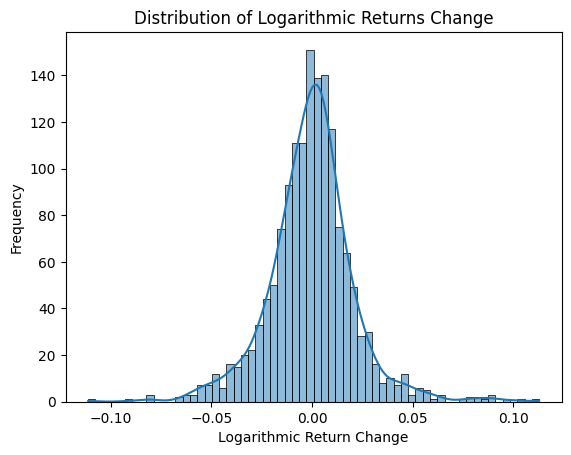

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop NaN values from the 'log_change' column
df_cleaned = wti_spot.dropna(subset=['log_change'])

# Plot the distribution of log_change
sns.histplot(df_cleaned['log_change'], kde=True)
plt.title('Distribution of Logarithmic Returns Change')
plt.xlabel('Logarithmic Return Change')
plt.ylabel('Frequency')
plt.show()


In [67]:
# Calculate mean and standard deviation
mean = df_cleaned['log_change'].mean()
std_dev = df_cleaned['log_change'].std()

# Calculate skewness and kurtosis
skewness = df_cleaned['log_change'].skew()
kurtosis = df_cleaned['log_change'].kurtosis()

# Display the results
print("Mean:", mean)
print("Standard Deviation:", std_dev)
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

Mean: -0.0003525553469778537
Standard Deviation: 0.02128798024022706
Skewness: 0.22435874784964152
Kurtosis: 3.4688339190567143


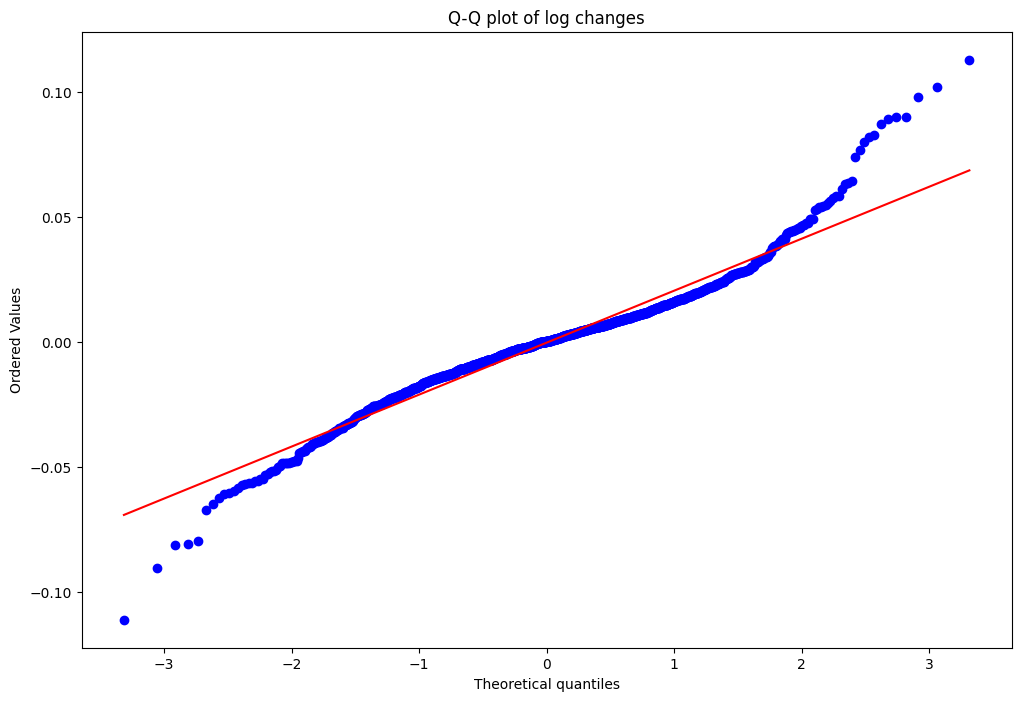

In [68]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Create a Q-Q plot
stats.probplot(df_cleaned['log_change'], dist="norm", plot=plt)
plt.title('Q-Q plot of log changes')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')
plt.show()

Extreme changes identified by quantiles

In [71]:
# Calculate the quantiles
lower_quantile = df_cleaned['log_change'].quantile(0.01)  # Selecting the lower 5%
upper_quantile = df_cleaned['log_change'].quantile(0.99)  # Selecting the upper 5%

# Filter the DataFrame based on the extreme values
extreme_values = df_cleaned[(df_cleaned['log_change'] <= lower_quantile) | (df_cleaned['log_change'] >= upper_quantile)]


In [76]:

# Display the extreme values
extreme_values.sort_values(by='log_change')

,period,product-name,series-description,value,units,log_change
1461,2014-11-28,WTI Crude Oil,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",65.94,$/BBL,-0.111258
1551,2015-02-04,WTI Crude Oil,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",48.45,$/BBL,-0.090514
1761,2015-07-06,WTI Crude Oil,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",52.48,$/BBL,-0.081390
1842,2015-09-01,WTI Crude Oil,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",45.38,$/BBL,-0.080822
2131,2016-03-23,WTI Crude Oil,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",38.28,$/BBL,-0.079560
1637,2015-04-08,WTI Crude Oil,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",50.44,$/BBL,-0.067273
2043,2016-01-20,WTI Crude Oil,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",26.68,$/BBL,-0.064937
2059,2016-02-01,WTI Crude Oil,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",31.62,$/BBL,-0.062520
1980,2015-12-07,WTI Crude Oil,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",37.64,$/BBL,-0.060812
2070,2016-02-09,WTI Crude Oil,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",27.96,$/BBL,-0.060709


### Analysis

- Select `imports` within the same month

In [264]:
weekly_imp_exp_products[weekly_imp_exp_products['period']=='2017-01-01'][weekly_imp_exp_products['process']=='IMX']

/var/folders/g2/l186zykd1g56mc9vp1p2rv280000gn/T/ipykernel_6256/1890095366.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  weekly_imp_exp_products[weekly_imp_exp_products['period']=='2017-01-01'][weekly_imp_exp_products['process']=='IMX']


,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units,week
0,2017-01-01,R10-Z00,PADD 1,EPC0,Crude Oil,IMX,Imports Excluding SPR,WCEIMP12,East Coast (PADD 1) Commercial Crude Oil Impor...,1172,MBBL/D,1
1,2017-01-01,R20-Z00,PADD 2,EPC0,Crude Oil,IMX,Imports Excluding SPR,WCEIMP22,Midwest (PADD 2) Commercial Crude Oil Imports ...,2573,MBBL/D,1
2,2017-01-01,R30-Z00,PADD 3,EPC0,Crude Oil,IMX,Imports Excluding SPR,WCEIMP32,Gulf Coast (PADD 3) Commercial Crude Oil Impor...,4096,MBBL/D,1
6,2017-01-01,R50-Z00,PADD 5,EPC0,Crude Oil,IMX,Imports Excluding SPR,WCEIMP52,West Coast (PADD 5) Commercial Crude Oil Impor...,888,MBBL/D,1
8,2017-01-01,NUS-Z00,U.S.,EPC0,Crude Oil,IMX,Imports Excluding SPR,WCEIMUS2,U.S. Commercial Crude Oil Imports Excluding SP...,9052,MBBL/D,1
9,2017-01-01,R40-Z00,PADD 4,EPC0,Crude Oil,IMX,Imports Excluding SPR,WCEIMP42,Rocky Mountain (PADD 4) Commercial Crude Oil I...,323,MBBL/D,1
10,2017-01-01,R30-Z00,PADD 3,EPC0,Crude Oil,IMX,Imports Excluding SPR,WCEIMP32,Gulf Coast (PADD 3) Commercial Crude Oil Impor...,3355,MBBL/D,2
12,2017-01-01,R20-Z00,PADD 2,EPC0,Crude Oil,IMX,Imports Excluding SPR,WCEIMP22,Midwest (PADD 2) Commercial Crude Oil Imports ...,2741,MBBL/D,2
14,2017-01-01,R40-Z00,PADD 4,EPC0,Crude Oil,IMX,Imports Excluding SPR,WCEIMP42,Rocky Mountain (PADD 4) Commercial Crude Oil I...,352,MBBL/D,2
17,2017-01-01,R10-Z00,PADD 1,EPC0,Crude Oil,IMX,Imports Excluding SPR,WCEIMP12,East Coast (PADD 1) Commercial Crude Oil Impor...,844,MBBL/D,2


We can see that the only product imported into the U.S. for the first month of 2017 seems to be Crude Oil (not any petroleum derivatives imported)

Only petroleum products imported into the U.S. are Crude Oil for *any* month

- check `imports` products at any month during 2017

In [274]:
weekly_imp_exp_products[weekly_imp_exp_products['process']=='IMX']['product-name'].unique()

array(['Crude Oil'], dtype=object)

#### Which countries does imported Crude Oil come from in U.S. (per Region)? Expressed as percentage for each region (pie chart)

Compare the two datasets to see if there is a similarity with the imported barrels values

In [275]:
weekly_imp_exp_products[weekly_imp_exp_products['area-name']=='U.S.']

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units,week
3,2017-01-01,NUS-Z00,U.S.,EPD0,Distillate Fuel Oil,EEX,Exports,WDIEXUS2,U.S. Exports of Total Distillate (Thousand Bar...,1035,MBBL/D,1
4,2017-01-01,NUS-Z00,U.S.,EPLLPZ,Propane and Propylene,EEX,Exports,W_EPLLPZ_EEX_NUS-Z00_MBBLD,U.S. Exports of Propane and Propylene (Thousan...,1043,MBBL/D,1
5,2017-01-01,NUS-Z00,U.S.,EPC0,Crude Oil,EEX,Exports,WCREXUS2,U.S. Exports of Crude Oil (Thousand Barrels pe...,727,MBBL/D,1
7,2017-01-01,NUS-Z00,U.S.,EPJK,Kerosene-Type Jet Fuel,EEX,Exports,WKJEXUS2,U.S. Exports of Kerosene-Type Jet Fuel (Thousa...,190,MBBL/D,1
8,2017-01-01,NUS-Z00,U.S.,EPC0,Crude Oil,IMX,Imports Excluding SPR,WCEIMUS2,U.S. Commercial Crude Oil Imports Excluding SP...,9052,MBBL/D,1
...,...,...,...,...,...,...,...,...,...,...,...,...
511,2017-12-01,NUS-Z00,U.S.,EPC0,Crude Oil,IMX,Imports Excluding SPR,WCEIMUS2,U.S. Commercial Crude Oil Imports Excluding SP...,7966,MBBL/D,52
512,2017-12-01,NUS-Z00,U.S.,EPC0,Crude Oil,EEX,Exports,WCREXUS2,U.S. Exports of Crude Oil (Thousand Barrels pe...,1475,MBBL/D,52
513,2017-12-01,NUS-Z00,U.S.,EPD0,Distillate Fuel Oil,EEX,Exports,WDIEXUS2,U.S. Exports of Total Distillate (Thousand Bar...,862,MBBL/D,52
514,2017-12-01,NUS-Z00,U.S.,EPLLPZ,Propane and Propylene,EEX,Exports,W_EPLLPZ_EEX_NUS-Z00_MBBLD,U.S. Exports of Propane and Propylene (Thousan...,534,MBBL/D,52


**Countries each U.S. zone imports Crude Oil from:**

Drop following `originName` labels, which basically repeat the same information as in the other labels with individual countries: OPEC, non-OPEC, World, Middle East, Canada (Region), Other Americas, Asia-Pacific

In [374]:
for zone, zone_Data in crude_oil_imports.groupby('destinationName'):
    if zone=='PADD 6':
        #print(zone) # e.g. PADD1
        #print(zone_Data) # e.g. DataFrame of PADD1
        print(zone_Data.groupby('originName')['quantity'].sum()) # sums of barrels coming from each country to Europe
        break

originName
Colombia          1448.0
Non-OPEC          1448.0
Other Americas    1448.0
World             1448.0
Name: quantity, dtype: float64


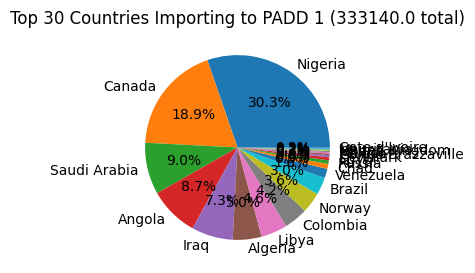

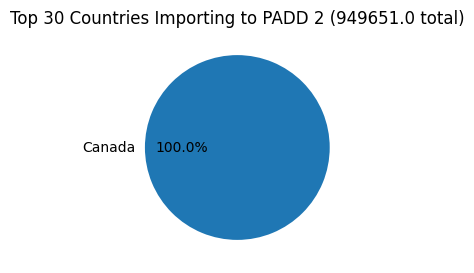

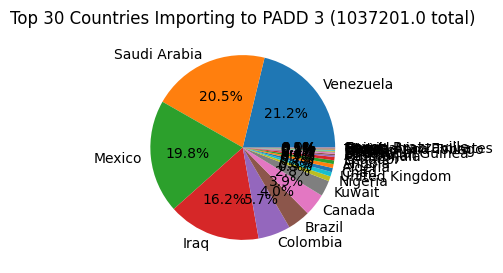

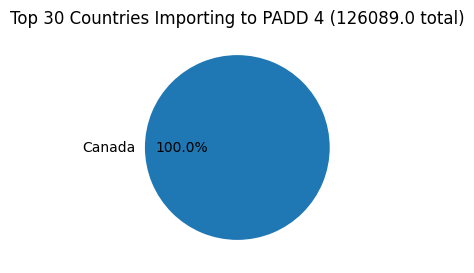

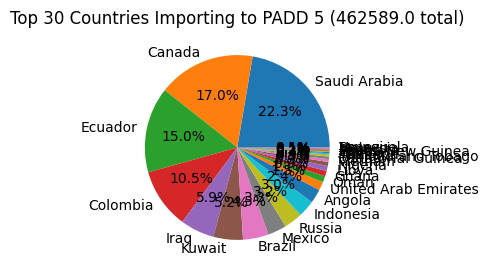

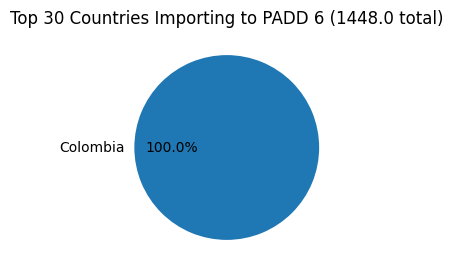

In [377]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'crude_oil_imports' DataFrame is already defined

# Define the function to create pie charts for each zone
def create_pie_charts(zone_data, total_quantity, zone_name, top_n=30):

    # Select the top N countries based on quantity summed for each region
    top_countries = zone_data.groupby('originName')['quantity'].sum().nlargest(top_n)
    
    # Create pie chart for the top N countries
    plt.figure(figsize=(3, 3))
    plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%')
    plt.title(f'Top {top_n} Countries Importing to {zone_name} ({total_quantity} total)')
    plt.show()

regions = ['OPEC', 'Non-OPEC', 'Africa', 'World', 'Middle East', 'Canada (Region)', 'Other Americas', 'Asia-Pacific', 'Europe', 'Eurasia']

# Group by destinationName and iterate over each group (drop the aggregations of countries)
for zone, zone_data in crude_oil_imports[~crude_oil_imports['originName'].isin(regions)].groupby('destinationName'):
    total_quantity = zone_data['quantity'].sum()
    
    # Create pie chart only if there are more than 1 country
    #if len(zone_data) > 1:
    create_pie_charts(zone_data, total_quantity, zone)
    #else:
    #    print(f"Not enough data for {zone}")


**PADD 1 (East Coast): New England, Central Atlantic**

PADD 2 (Midwest):  Illinois, Indiana, Iowa, Kansas, Kentucky, Michigan, Minnesota

**PADD 3 (Gulf Coast): : Alabama, Arkansas, Louisiana, Mississippi, New Mexico, and Texas.**

PADD 4 (Rocky Mountain): Colorado, Idaho, Montana, Utah, and Wyoming.

**PADD 5 (West Coast): Alaska, Arizona, California, Hawaii, Nevada, Oregon, and Washington.**

PADD 6: U.S. Virgin Islands and Puerto Rico. (not included in U.S. totals) so we can drop it from the dataset

#### Check who U.S. `exports` petroleum products to:

`week` column is not a string

Do not convert `units`, assume the `value` describes the flow per day during a certain week. And that changes over time. Plot how those values change over time for the same pair or `area-name` and `product`

For **exports**, we are only given the U.S. as an area (no regions for exports given).

In [401]:
weekly_imp_exp_products[weekly_imp_exp_products['process']=='EEX']['area-name'].unique()

array(['U.S.'], dtype=object)

Plot quantity of every product leaving the U.S. each week of 2017 (no specific region)

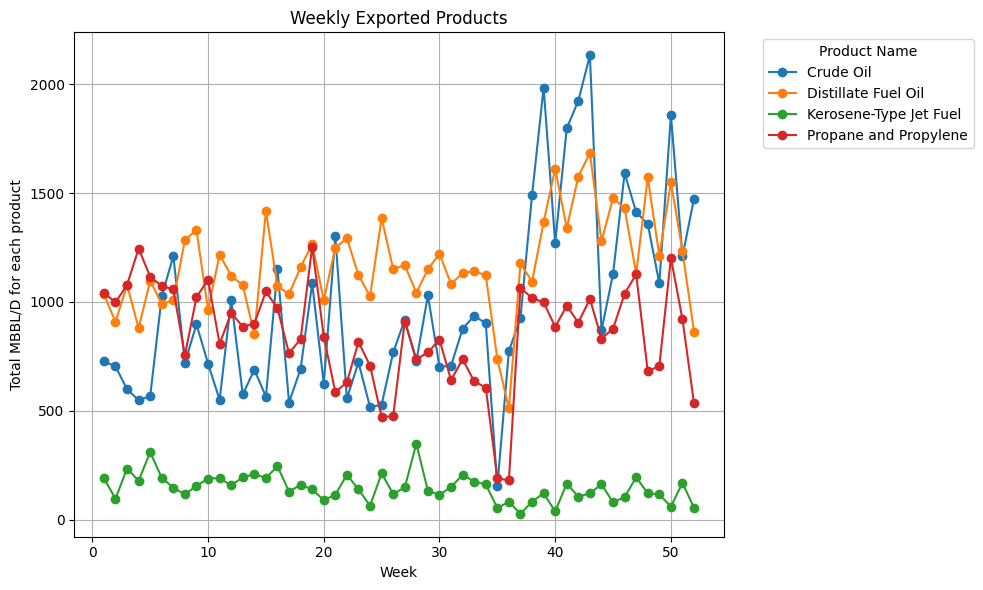

In [415]:
# group filtered data by 'week' and 'product-name' summing the value for each group
grouped_data = weekly_imp_exp_products[weekly_imp_exp_products['process']=='EEX'].groupby(['week', 'product-name'])['value'].sum().reset_index()

# reset the index and values columns
pivot_data = grouped_data.pivot(index='week', columns='product-name', values='value')

# plot time series for each product-name
pivot_data.plot(marker='o', figsize=(10, 6))
plt.xlabel('Week')
plt.ylabel('Total MBBL/D for each product')
plt.title('Weekly Exported Products')
plt.legend(title='Product Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Check seasonality of exports: does the US export certain products more to certain regions at different times of year? Does this change with spot price of different petroleum products? Compare with weekly import export dataset

Overlay prices on the above chart found in the spot prices per petroleum product dataframe

In [419]:
product_spot_prices['product-name'].unique()

array(['Reformulated Regular Gasoline', 'Propane',
       'No 2 Diesel Low Sulfur (0-15 ppm)', 'Carb Diesel',
       'No 2 Fuel Oil / Heating Oil', 'WTI Crude Oil',
       'UK Brent Crude Oil', 'Kerosene-Type Jet Fuel'], dtype=object)

In [501]:
weekly_imp_exp_products['product-name'].unique()

array(['Crude Oil', 'Distillate Fuel Oil', 'Propane and Propylene',
       'Kerosene-Type Jet Fuel'], dtype=object)

In [451]:
# manually match the product names
product_name_mapping = {
    'Crude Oil':'WTI Crude Oil',
    'Propane and Propylene':'Propane',
    'Distillate Fuel Oil':'No 2 Fuel Oil / Heating Oil',
    'Kerosene-Type Jet Fuel':'Kerosene-Type Jet Fuel'
}

# merge datasets based on the 'product-name'
# only keep exports
merged_data = pd.merge(weekly_imp_exp_products[weekly_imp_exp_products['process']=='EEX'], product_spot_prices, on='week', how='left')

In [453]:
# apply mapping to 'product-name_x' column
merged_data['mapped_product-name_x'] = merged_data['product-name_x'].map(product_name_mapping)

# compare rows based on mapped product names
filtered_df = merged_data[merged_data['mapped_product-name_x'] == merged_data['product-name_y']]

# drop intermediate column
filtered_df = filtered_df.drop(columns='mapped_product-name_x')

For each product, plot the quantity exported each week vs. price curve on second y axis

product-name_y = 'WTI Crude Oil', 'Propane', 'No 2 Fuel Oil / Heating Oil', 'Kerosene-Type Jet Fuel' (from product spot prices)

value_y = spot price

product-name_x = 'Crude Oil', 'Propane and Propylene', 'Distillate Fuel Oil', 'Kerosene-Type Jet Fuel' (from exports barrels data)

value_x = thousand barrels of exported products

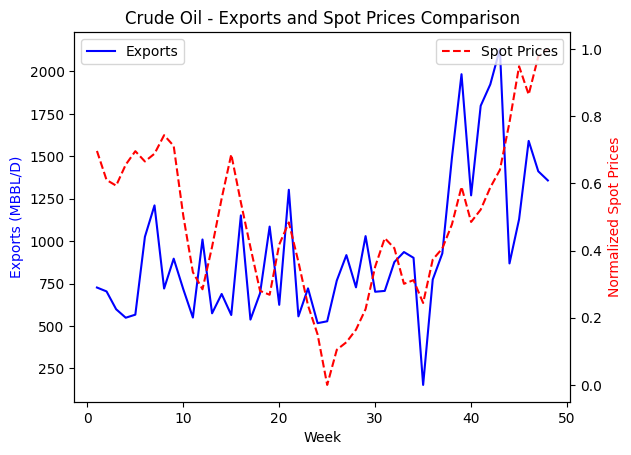

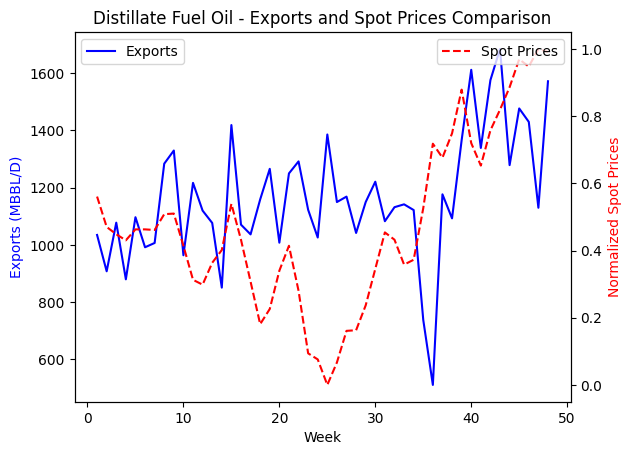

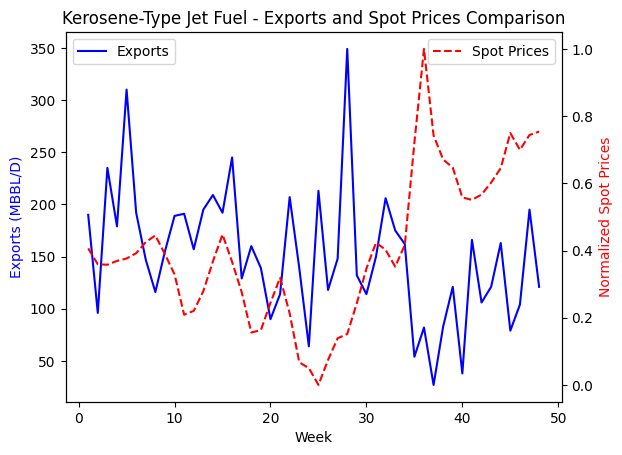

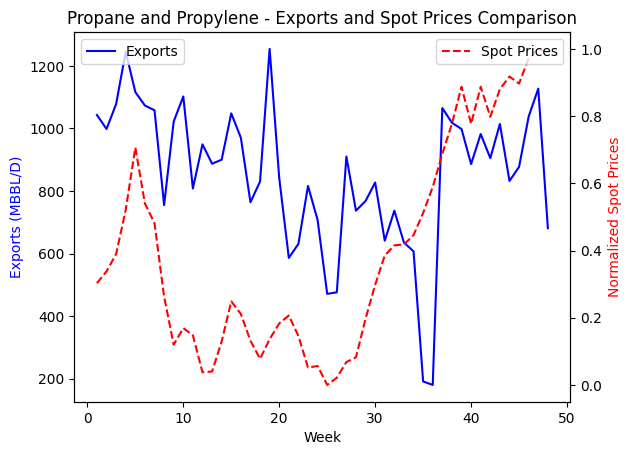

In [486]:

# normalise the data
def normalise(data):
    return (data - min(data)) / (max(data)-min(data))

# Create a figure and axis object for each product
for product, df in filtered_df.groupby('product-name_x'):
    fig, ax1 = plt.subplots()

    # Plot exports on the first y-axis (left)
    ax1.plot(df['week'], df['value_x'], label='Exports', color='blue')
    
    # Create a second y-axis (right)
    ax2 = ax1.twinx()
    
    # Find the corresponding spot prices DataFrame using the export product name
    spot_prices_product_df = df[df['product-name_x'] == product]
    
    # Normalize spot prices
    normalized_spot_prices = normalise(spot_prices_product_df['value_y'])
    
    # Plot normalized spot prices on the second y-axis (right)
    ax2.plot(df['week'], normalized_spot_prices, label='Spot Prices', linestyle='--', color='red')
    
    # Set labels and title
    ax1.set_xlabel('Week')
    ax1.set_ylabel('Exports (MBBL/D)', color='blue')
    ax2.set_ylabel('Normalized Spot Prices', color='red')
    ax1.set_title(f'{product} - Exports and Spot Prices Comparison')
    
    # Display legend
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    
    # Show the plot
    plt.show()


#### Compare refinery utilisation % with spot prices of various products.... input crude oil, output petrleum products

Only two products quoted on Los Angeles (PADD 5) prices

In [527]:
product_spot_prices[product_spot_prices['area-name'] == 'LOS ANGELES']['product-name'].unique()

array(['Reformulated Regular Gasoline', 'Carb Diesel'], dtype=object)

Only two products quoted on New York City (PADD 1) prices

In [528]:
product_spot_prices[product_spot_prices['area-name'] == 'NEW YORK CITY']['product-name'].unique()

array(['No 2 Diesel Low Sulfur (0-15 ppm)', 'No 2 Fuel Oil / Heating Oil'],
      dtype=object)

In [553]:
print(refinery_utilization_US['period'].unique())
print(product_spot_prices['period'].unique())

<DatetimeArray>
['2017-01-01 00:00:00', '2017-02-01 00:00:00', '2017-03-01 00:00:00',
 '2017-04-01 00:00:00', '2017-05-01 00:00:00', '2017-06-01 00:00:00',
 '2017-07-01 00:00:00', '2017-08-01 00:00:00', '2017-09-01 00:00:00',
 '2017-10-01 00:00:00', '2017-11-01 00:00:00']
Length: 11, dtype: datetime64[ns]
<DatetimeArray>
['2017-01-06 00:00:00', '2017-01-13 00:00:00', '2017-01-20 00:00:00',
 '2017-01-27 00:00:00', '2017-02-03 00:00:00', '2017-02-10 00:00:00',
 '2017-02-17 00:00:00', '2017-02-24 00:00:00', '2017-03-03 00:00:00',
 '2017-03-10 00:00:00', '2017-03-17 00:00:00', '2017-03-24 00:00:00',
 '2017-03-31 00:00:00', '2017-04-07 00:00:00', '2017-04-14 00:00:00',
 '2017-04-21 00:00:00', '2017-04-28 00:00:00', '2017-05-05 00:00:00',
 '2017-05-12 00:00:00', '2017-05-19 00:00:00', '2017-05-26 00:00:00',
 '2017-06-02 00:00:00', '2017-06-09 00:00:00', '2017-06-16 00:00:00',
 '2017-06-23 00:00:00', '2017-06-30 00:00:00', '2017-07-07 00:00:00',
 '2017-07-14 00:00:00', '2017-07-21 00:00:00', 

The product spot prices are sampled weekly, whereas the weekly data is sampled monthly. 

A few attempted methods for making the comparisons:

1. assign the monthly utilisation rate to all dates within that month
2. interpolate or resample the weekly data to match the monthly frequency

In [633]:
#product_spot_prices
period_counts = product_spot_prices['period'].value_counts().tolist()
period_counts = [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ]

[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]


In [630]:
new_list = []
for i in range(0, len(period_counts[:48]), 4):

    # check if current index is within range of the list
    if i + 1 < len(period_counts[:48]):
        new_list.append(period_counts[:48][i] + period_counts[:47][i+1]+ period_counts[:48][i+2]+period_counts[:48][i+3])


#new_list.append(27)
print(new_list)

[36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36]


In [635]:
# account for 4 or 5 dates per month due to different lengths of months
new_list = [36, 36, 45, 36, 36, 45, 36, 36, 45, 36, 36] # december not incuded as no available data

In [631]:
U_S_util = refinery_utilization_US[(refinery_utilization_US['period'].dt.day == 1) & (refinery_utilization_US['area-name']=='U.S.')]
U_S_util

,period,area-name,process-name,value,units
0,2017-01-01,U.S.,% Utilization Refinery Operable Capacity,88.4,%
8,2017-02-01,U.S.,% Utilization Refinery Operable Capacity,85.0,%
13,2017-03-01,U.S.,% Utilization Refinery Operable Capacity,88.2,%
23,2017-04-01,U.S.,% Utilization Refinery Operable Capacity,92.8,%
27,2017-05-01,U.S.,% Utilization Refinery Operable Capacity,94.4,%
30,2017-06-01,U.S.,% Utilization Refinery Operable Capacity,94.4,%
40,2017-07-01,U.S.,% Utilization Refinery Operable Capacity,95.1,%
46,2017-08-01,U.S.,% Utilization Refinery Operable Capacity,92.9,%
52,2017-09-01,U.S.,% Utilization Refinery Operable Capacity,85.4,%
57,2017-10-01,U.S.,% Utilization Refinery Operable Capacity,88.4,%


In [636]:
repeated_df = U_S_util.loc[U_S_util.index.repeat(new_list)].reset_index(drop=True)
repeated_df

,period,area-name,process-name,value,units
0,2017-01-01,U.S.,% Utilization Refinery Operable Capacity,88.4,%
1,2017-01-01,U.S.,% Utilization Refinery Operable Capacity,88.4,%
2,2017-01-01,U.S.,% Utilization Refinery Operable Capacity,88.4,%
3,2017-01-01,U.S.,% Utilization Refinery Operable Capacity,88.4,%
4,2017-01-01,U.S.,% Utilization Refinery Operable Capacity,88.4,%
...,...,...,...,...,...
418,2017-11-01,U.S.,% Utilization Refinery Operable Capacity,92.6,%
419,2017-11-01,U.S.,% Utilization Refinery Operable Capacity,92.6,%
420,2017-11-01,U.S.,% Utilization Refinery Operable Capacity,92.6,%
421,2017-11-01,U.S.,% Utilization Refinery Operable Capacity,92.6,%


In [651]:
repeated_df['period'] = product_spot_prices[product_spot_prices['period'].dt.month != 12]['period']

In [638]:
product_spot_prices[product_spot_prices['period'].dt.month != 12]

,period,duoarea,area-name,product,product-name,value,units,week
0,2017-01-06,Y05LA,LOS ANGELES,EPMRR,Reformulated Regular Gasoline,71.526,$/BBL,1
1,2017-01-06,Y44MB,NA,EPLLPA,Propane,29.526,$/BBL,1
2,2017-01-06,RGC,NA,EPD2DXL0,No 2 Diesel Low Sulfur (0-15 ppm),68.586,$/BBL,1
3,2017-01-06,Y35NY,NEW YORK CITY,EPD2DXL0,No 2 Diesel Low Sulfur (0-15 ppm),70.392,$/BBL,1
4,2017-01-06,Y05LA,LOS ANGELES,EPD2DC,Carb Diesel,72.996,$/BBL,1
...,...,...,...,...,...,...,...,...
418,2017-11-24,Y35NY,NEW YORK CITY,EPD2DXL0,No 2 Diesel Low Sulfur (0-15 ppm),81.144,$/BBL,47
419,2017-11-24,RGC,NA,EPD2DXL0,No 2 Diesel Low Sulfur (0-15 ppm),78.078,$/BBL,47
420,2017-11-24,Y05LA,LOS ANGELES,EPD2DC,Carb Diesel,81.564,$/BBL,47
421,2017-11-24,Y05LA,LOS ANGELES,EPMRR,Reformulated Regular Gasoline,72.282,$/BBL,47


DataFrames are now of the same length. Only U.S. data is used, not region specific. Not very important as most of the spot price data is unknown region (NA), only LA and NYC data is available for certain products. 

1. General U.S. refinery data with all products comparison, regardless of region

In [662]:
#merged_data = pd.merge(product_spot_prices[product_spot_prices['period'].dt.month != 12], repeated_df, on='period', how='left')
merged_data = pd.concat([product_spot_prices[product_spot_prices['period'].dt.month != 12, repeated_df]])
merged_data

InvalidIndexError: (0       True
1       True
2       True
3       True
4       True
       ...  
427    False
428    False
429    False
430    False
431    False
Name: period, Length: 432, dtype: bool,         period area-name                              process-name  value  \
0   2017-01-06      U.S.  % Utilization Refinery Operable Capacity   88.4   
1   2017-01-06      U.S.  % Utilization Refinery Operable Capacity   88.4   
2   2017-01-06      U.S.  % Utilization Refinery Operable Capacity   88.4   
3   2017-01-06      U.S.  % Utilization Refinery Operable Capacity   88.4   
4   2017-01-06      U.S.  % Utilization Refinery Operable Capacity   88.4   
..         ...       ...                                       ...    ...   
418 2017-11-24      U.S.  % Utilization Refinery Operable Capacity   92.6   
419 2017-11-24      U.S.  % Utilization Refinery Operable Capacity   92.6   
420 2017-11-24      U.S.  % Utilization Refinery Operable Capacity   92.6   
421 2017-11-24      U.S.  % Utilization Refinery Operable Capacity   92.6   
422 2017-11-24      U.S.  % Utilization Refinery Operable Capacity   92.6   

    units  
0       %  
1       %  
2       %  
3       %  
4       %  
..    ...  
418     %  
419     %  
420     %  
421     %  
422     %  

[423 rows x 5 columns])

In [658]:
product_spot_prices[product_spot_prices['period'].dt.month != 12]['period']

0     2017-01-06
1     2017-01-06
2     2017-01-06
3     2017-01-06
4     2017-01-06
         ...    
418   2017-11-24
419   2017-11-24
420   2017-11-24
421   2017-11-24
422   2017-11-24
Name: period, Length: 423, dtype: datetime64[ns]

In [660]:
repeated_df['period']

0     2017-01-06
1     2017-01-06
2     2017-01-06
3     2017-01-06
4     2017-01-06
         ...    
418   2017-11-24
419   2017-11-24
420   2017-11-24
421   2017-11-24
422   2017-11-24
Name: period, Length: 423, dtype: datetime64[ns]

In [663]:
# Reset the index of both DataFrames
product_spot_prices.reset_index(drop=True, inplace=True)
repeated_df.reset_index(drop=True, inplace=True)

# Perform the merge operation
merged_data = pd.merge(product_spot_prices[product_spot_prices['period'].dt.month != 12], repeated_df, on='period', how='left')

In [665]:
merged_data.drop_duplicates()

,period,duoarea,area-name_x,product,product-name,value_x,units_x,week,area-name_y,process-name,value_y,units_y
0,2017-01-06,Y05LA,LOS ANGELES,EPMRR,Reformulated Regular Gasoline,71.526,$/BBL,1,U.S.,% Utilization Refinery Operable Capacity,88.4,%
9,2017-01-06,Y44MB,NA,EPLLPA,Propane,29.526,$/BBL,1,U.S.,% Utilization Refinery Operable Capacity,88.4,%
18,2017-01-06,RGC,NA,EPD2DXL0,No 2 Diesel Low Sulfur (0-15 ppm),68.586,$/BBL,1,U.S.,% Utilization Refinery Operable Capacity,88.4,%
27,2017-01-06,Y35NY,NEW YORK CITY,EPD2DXL0,No 2 Diesel Low Sulfur (0-15 ppm),70.392,$/BBL,1,U.S.,% Utilization Refinery Operable Capacity,88.4,%
36,2017-01-06,Y05LA,LOS ANGELES,EPD2DC,Carb Diesel,72.996,$/BBL,1,U.S.,% Utilization Refinery Operable Capacity,88.4,%
...,...,...,...,...,...,...,...,...,...,...,...,...
3762,2017-11-24,Y35NY,NEW YORK CITY,EPD2DXL0,No 2 Diesel Low Sulfur (0-15 ppm),81.144,$/BBL,47,U.S.,% Utilization Refinery Operable Capacity,92.6,%
3771,2017-11-24,RGC,NA,EPD2DXL0,No 2 Diesel Low Sulfur (0-15 ppm),78.078,$/BBL,47,U.S.,% Utilization Refinery Operable Capacity,92.6,%
3780,2017-11-24,Y05LA,LOS ANGELES,EPD2DC,Carb Diesel,81.564,$/BBL,47,U.S.,% Utilization Refinery Operable Capacity,92.6,%
3789,2017-11-24,Y05LA,LOS ANGELES,EPMRR,Reformulated Regular Gasoline,72.282,$/BBL,47,U.S.,% Utilization Refinery Operable Capacity,92.6,%


In [668]:
merged_data = merged_data.drop_duplicates().reset_index()

In [671]:
merged_data = merged_data.drop('index', axis=1)

In [672]:
merged_data

,period,duoarea,area-name_x,product,product-name,value_x,units_x,week,area-name_y,process-name,value_y,units_y
0,2017-01-06,Y05LA,LOS ANGELES,EPMRR,Reformulated Regular Gasoline,71.526,$/BBL,1,U.S.,% Utilization Refinery Operable Capacity,88.4,%
1,2017-01-06,Y44MB,NA,EPLLPA,Propane,29.526,$/BBL,1,U.S.,% Utilization Refinery Operable Capacity,88.4,%
2,2017-01-06,RGC,NA,EPD2DXL0,No 2 Diesel Low Sulfur (0-15 ppm),68.586,$/BBL,1,U.S.,% Utilization Refinery Operable Capacity,88.4,%
3,2017-01-06,Y35NY,NEW YORK CITY,EPD2DXL0,No 2 Diesel Low Sulfur (0-15 ppm),70.392,$/BBL,1,U.S.,% Utilization Refinery Operable Capacity,88.4,%
4,2017-01-06,Y05LA,LOS ANGELES,EPD2DC,Carb Diesel,72.996,$/BBL,1,U.S.,% Utilization Refinery Operable Capacity,88.4,%
...,...,...,...,...,...,...,...,...,...,...,...,...
418,2017-11-24,Y35NY,NEW YORK CITY,EPD2DXL0,No 2 Diesel Low Sulfur (0-15 ppm),81.144,$/BBL,47,U.S.,% Utilization Refinery Operable Capacity,92.6,%
419,2017-11-24,RGC,NA,EPD2DXL0,No 2 Diesel Low Sulfur (0-15 ppm),78.078,$/BBL,47,U.S.,% Utilization Refinery Operable Capacity,92.6,%
420,2017-11-24,Y05LA,LOS ANGELES,EPD2DC,Carb Diesel,81.564,$/BBL,47,U.S.,% Utilization Refinery Operable Capacity,92.6,%
421,2017-11-24,Y05LA,LOS ANGELES,EPMRR,Reformulated Regular Gasoline,72.282,$/BBL,47,U.S.,% Utilization Refinery Operable Capacity,92.6,%


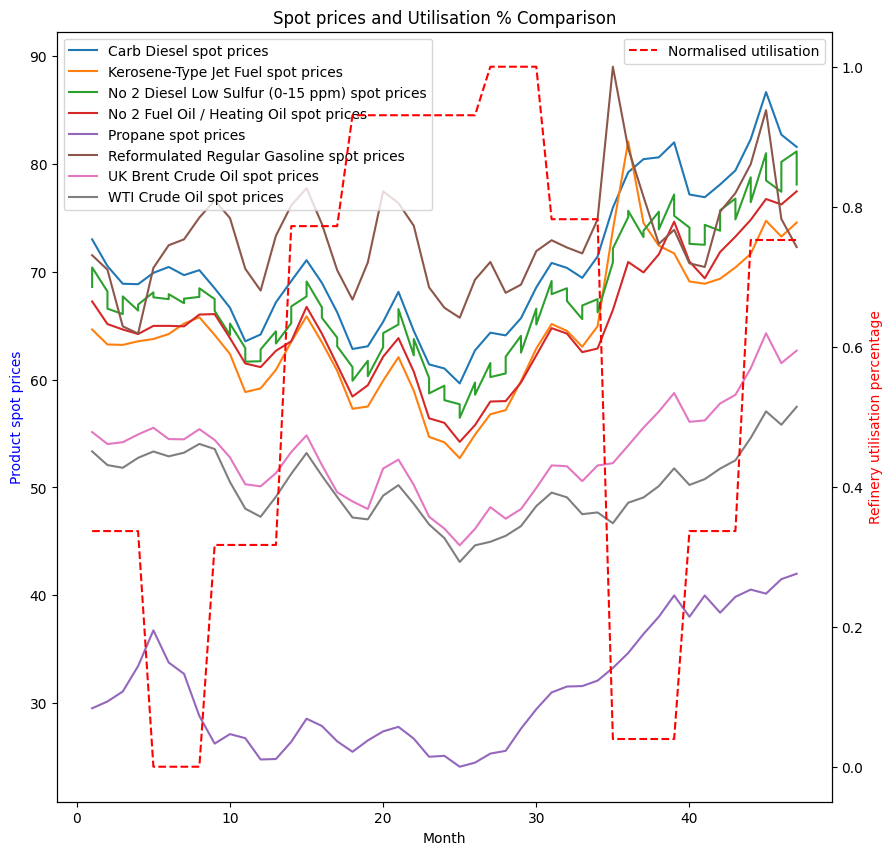

In [675]:
# no need to filter the dataframe as we plot for all regions all together 
fig, ax1 = plt.subplots(figsize=(7, 7))
for product, df_product in merged_data.groupby('product-name'):
    # plot the petroleum products on the left y axis
    ax1.plot(df_product['week'], df_product['value_x'], label=f'{product} spot prices')

# create a second y-axis for the utilization of refineries
ax2 = ax1.twinx()

# normalise the utilisation percentage (modify the grid later)
normalised_utilisation = normalise(merged_data['value_y'])

# plot the normalised utilisation percentage
ax2.plot(merged_data['week'], normalised_utilisation, label='Normalised utilisation', linestyle='--', color='red')

min_nonzero_utilization = merged_data['value_y'][merged_data['value_y'] > 0].min()


# Set labels and title
ax1.set_xlabel('Week (2017)')
ax1.set_ylabel('Product spot prices', color='blue')
ax2.set_ylabel('Refinery utilisation percentage', color='red')
ax1.set_title('Spot prices and Utilisation % Comparison')
    
# Display legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
    
# Show the plot
plt.show()

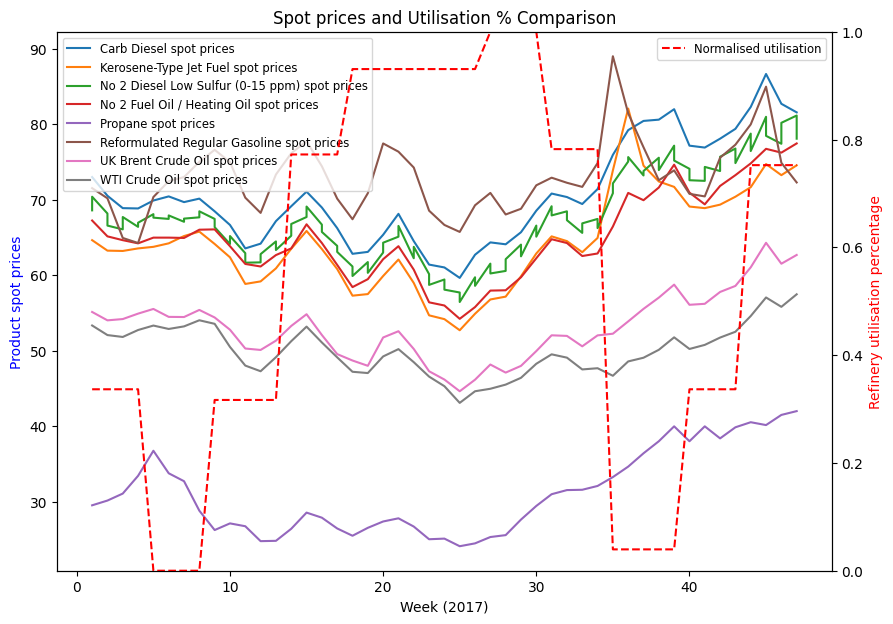

In [679]:
# Function to normalize data
def normalise(data):
    return (data - min(data)) / (max(data) - min(data))

# no need to filter the dataframe as we plot for all regions all together 
fig, ax1 = plt.subplots(figsize=(10, 7))
for product, df_product in merged_data.groupby('product-name'):
    # plot the petroleum products on the left y axis
    ax1.plot(df_product['week'], df_product['value_x'], label=f'{product} spot prices')

# create a second y-axis for the utilization of refineries
ax2 = ax1.twinx()

# normalise the utilisation percentage
normalised_utilisation = normalise(merged_data['value_y'])

# plot the normalised utilisation percentage
ax2.plot(merged_data['week'], normalised_utilisation, label='Normalised utilisation', linestyle='--', color='red')

# Adjust y-axis limits to 0 and 1
ax2.set_ylim(0, 1)

# Set labels and title
ax1.set_xlabel('Week (2017)')
ax1.set_ylabel('Product spot prices', color='blue')
ax2.set_ylabel('Refinery utilisation percentage', color='red')
ax1.set_title('Spot prices and Utilisation % Comparison')

# Set legend font size
ax1.legend(loc='upper left', fontsize='small')
ax2.legend(loc='upper right', fontsize='small')

# Show the plot
plt.show()


Seems as though as when the price of crude oil falls in value, the refinery utilisation expressed as a percentage (%) starts increasing as the input costs for refineries decrease. The utilisation percentage therefore reaches a maximum at around the same time as when price of crude oil and therefore petroleum derivatives start rising again. A significant increase in price in crude oil in short periods coincide with a rapid fall in refinery utilisation percentage. 

Let's try to estimate the missing weekly values in the refinery utilisation percentage dataset

In [682]:
refinery_utilization_US['period'].unique()

<DatetimeArray>
['2017-01-01 00:00:00', '2017-02-01 00:00:00', '2017-03-01 00:00:00',
 '2017-04-01 00:00:00', '2017-05-01 00:00:00', '2017-06-01 00:00:00',
 '2017-07-01 00:00:00', '2017-08-01 00:00:00', '2017-09-01 00:00:00',
 '2017-10-01 00:00:00', '2017-11-01 00:00:00']
Length: 11, dtype: datetime64[ns]

In [681]:
product_spot_prices['period'].unique()

<DatetimeArray>
['2017-01-06 00:00:00', '2017-01-13 00:00:00', '2017-01-20 00:00:00',
 '2017-01-27 00:00:00', '2017-02-03 00:00:00', '2017-02-10 00:00:00',
 '2017-02-17 00:00:00', '2017-02-24 00:00:00', '2017-03-03 00:00:00',
 '2017-03-10 00:00:00', '2017-03-17 00:00:00', '2017-03-24 00:00:00',
 '2017-03-31 00:00:00', '2017-04-07 00:00:00', '2017-04-14 00:00:00',
 '2017-04-21 00:00:00', '2017-04-28 00:00:00', '2017-05-05 00:00:00',
 '2017-05-12 00:00:00', '2017-05-19 00:00:00', '2017-05-26 00:00:00',
 '2017-06-02 00:00:00', '2017-06-09 00:00:00', '2017-06-16 00:00:00',
 '2017-06-23 00:00:00', '2017-06-30 00:00:00', '2017-07-07 00:00:00',
 '2017-07-14 00:00:00', '2017-07-21 00:00:00', '2017-07-28 00:00:00',
 '2017-08-04 00:00:00', '2017-08-11 00:00:00', '2017-08-18 00:00:00',
 '2017-08-25 00:00:00', '2017-09-01 00:00:00', '2017-09-08 00:00:00',
 '2017-09-15 00:00:00', '2017-09-22 00:00:00', '2017-09-29 00:00:00',
 '2017-10-06 00:00:00', '2017-10-13 00:00:00', '2017-10-20 00:00:00',
 '20

In [683]:
# remove all values that we just repeated by duplicating rows
repeated_df['period']

0     2017-01-06
1     2017-01-06
2     2017-01-06
3     2017-01-06
4     2017-01-06
         ...    
418   2017-11-24
419   2017-11-24
420   2017-11-24
421   2017-11-24
422   2017-11-24
Name: period, Length: 423, dtype: datetime64[ns]

In [743]:
repeated_df_interpol = repeated_df.copy()

In [719]:
# first version not recording the first occurences of a month 
for month in repeated_df_interpol['period'].dt.to_period('M').unique():

    # all days of month
    monthly_dates = repeated_df_interpol[repeated_df_interpol['period'].dt.to_period('M') == month]['period']

    # first day of month
    earliest_dates = repeated_df_interpol[repeated_df_interpol['period'].dt.to_period('M') == month]['period'].min()

    # index of first occurence of that date
    first_index = repeated_df_interpol[repeated_df_interpol['period']==earliest_dates].index[0]

    # retrieve value corresponding to that first index
    earliest_values = repeated_df_interpol.loc[first_index, 'value']
    
    # set values from rest of the rows in that month to NaN
    repeated_df_interpol.loc[monthly_dates.index[1:], 'value'] = np.nan

    

In [886]:
repeated_df_interpol = repeated_df.copy()

In [887]:
list_dates_interpolate = []
for month in repeated_df_interpol['period'].dt.to_period('M').unique():

    # all days of month
    monthly_dates = repeated_df_interpol[repeated_df_interpol['period'].dt.to_period('M') == month]['period']

    # first day of month
    earliest_dates = repeated_df_interpol[repeated_df_interpol['period'].dt.to_period('M') == month]['period'].min()

    # index of first occurence of that date
    first_index = repeated_df_interpol[repeated_df_interpol['period']==earliest_dates].index[0]


    # retrieve value corresponding to that first index
    earliest_values = repeated_df_interpol.loc[first_index, 'value']
    list_dates_interpolate.append(earliest_dates)
    
    # set values from rest of the rows in that month to NaN
    repeated_df_interpol.loc[monthly_dates.index[1:], 'value'] = np.nan
    

In [888]:
repeated_df_interpol

,period,area-name,process-name,value,units
0,2017-01-06,U.S.,% Utilization Refinery Operable Capacity,88.4,%
1,2017-01-06,U.S.,% Utilization Refinery Operable Capacity,NaN,%
2,2017-01-06,U.S.,% Utilization Refinery Operable Capacity,NaN,%
3,2017-01-06,U.S.,% Utilization Refinery Operable Capacity,NaN,%
4,2017-01-06,U.S.,% Utilization Refinery Operable Capacity,NaN,%
...,...,...,...,...,...
418,2017-11-24,U.S.,% Utilization Refinery Operable Capacity,NaN,%
419,2017-11-24,U.S.,% Utilization Refinery Operable Capacity,NaN,%
420,2017-11-24,U.S.,% Utilization Refinery Operable Capacity,NaN,%
421,2017-11-24,U.S.,% Utilization Refinery Operable Capacity,NaN,%


Record first day of each month and store in Pandas Series

In [837]:
list_dates_interpolate = pd.Series(list_dates_interpolate)

In [843]:
list_dates_interpolate

0    2017-01-06
1    2017-02-03
2    2017-03-03
3    2017-04-07
4    2017-05-05
5    2017-06-02
6    2017-07-07
7    2017-08-04
8    2017-09-01
9    2017-10-06
10   2017-11-03
dtype: datetime64[ns]

In [838]:
#type(repeated_df_interpol['period'].unique())
unique_dates_df = pd.Series(repeated_df_interpol['period'].unique())

create boolean series

In [859]:
boolean_series = unique_dates_df.isin(list_dates_interpolate)

In [860]:
boolean_series.describe()

count        47
unique        2
top       False
freq         36
dtype: object

In [873]:
masked_series = unique_dates_df.mask(~boolean_series)

In [874]:
masked_series

0    2017-01-06
1           NaT
2           NaT
3           NaT
4    2017-02-03
5           NaT
6           NaT
7           NaT
8    2017-03-03
9           NaT
10          NaT
11          NaT
12          NaT
13   2017-04-07
14          NaT
15          NaT
16          NaT
17   2017-05-05
18          NaT
19          NaT
20          NaT
21   2017-06-02
22          NaT
23          NaT
24          NaT
25          NaT
26   2017-07-07
27          NaT
28          NaT
29          NaT
30   2017-08-04
31          NaT
32          NaT
33          NaT
34   2017-09-01
35          NaT
36          NaT
37          NaT
38          NaT
39   2017-10-06
40          NaT
41          NaT
42          NaT
43   2017-11-03
44          NaT
45          NaT
46          NaT
dtype: datetime64[ns]

check if value in `masked_series` is datetime or NaN

In [865]:
isinstance(masked_series.iloc[0], datetime.datetime)

True

In [882]:
import datetime
value_masked_series = pd.Series()
for index, value in masked_series.items():
    if isinstance(value, datetime.datetime):
        corresponding_values = repeated_df_interpol[repeated_df_interpol['period'] == value]['value']
        if not corresponding_values.empty:
            corresponding_value = corresponding_values.iloc[0]
            #print(corresponding_value)
            value_masked_series.loc[index] = corresponding_value
        else:
            value_masked_series.loc[index] = np.nan

    else:
        value_masked_series.loc[index] = np.nan

In [883]:
value_masked_series

0     88.4
1      NaN
2      NaN
3      NaN
4     85.0
5      NaN
6      NaN
7      NaN
8     88.2
9      NaN
10     NaN
11     NaN
12     NaN
13    92.8
14     NaN
15     NaN
16     NaN
17    94.4
18     NaN
19     NaN
20     NaN
21    94.4
22     NaN
23     NaN
24     NaN
25     NaN
26    95.1
27     NaN
28     NaN
29     NaN
30    92.9
31     NaN
32     NaN
33     NaN
34    85.4
35     NaN
36     NaN
37     NaN
38     NaN
39    88.4
40     NaN
41     NaN
42     NaN
43    92.6
44     NaN
45     NaN
46     NaN
dtype: float64

We can interpole the NaN missing values in Pandas Series `value_masked_series`

interpolate using polynomial

In [908]:
interpolated_list = value_masked_series.interpolate(method='polynomial', order=3)
#interpolated_list = value_masked_series.interpolate(method='polynomial', order=5, limit_direction='both', limit=5)


In [896]:
interpolated_list

0     88.400000
1     86.405207
2     85.299294
3     84.886787
4     85.000000
5     85.496733
6     86.257972
7     87.185580
8     88.200000
9     89.237949
10    90.250114
11    91.198852
12    92.055886
13    92.800000
14    93.414796
15    93.887940
16    94.214205
17    94.400000
18    94.467837
19    94.457463
20    94.418540
21    94.400000
22    94.439328
23    94.553368
24    94.732999
25    94.939338
26    95.100000
27    95.105788
28    94.818661
29    94.108308
30    92.900000
31    91.222047
32    89.231889
33    87.187929
34    85.400000
35    84.179007
36    83.786570
37    84.384666
38    85.985270
39    88.400000
40    91.189759
41    93.614378
42    94.582254
43    92.600000
44          NaN
45          NaN
46          NaN
dtype: float64

In [824]:
repeated_df_interpol.head(50)

,period,area-name,process-name,value,units
0,2017-01-06,U.S.,% Utilization Refinery Operable Capacity,88.400000,%
1,2017-01-06,U.S.,% Utilization Refinery Operable Capacity,88.400000,%
2,2017-01-06,U.S.,% Utilization Refinery Operable Capacity,88.400000,%
3,2017-01-06,U.S.,% Utilization Refinery Operable Capacity,88.400000,%
4,2017-01-06,U.S.,% Utilization Refinery Operable Capacity,88.400000,%
5,2017-01-06,U.S.,% Utilization Refinery Operable Capacity,88.400000,%
6,2017-01-06,U.S.,% Utilization Refinery Operable Capacity,88.400000,%
7,2017-01-06,U.S.,% Utilization Refinery Operable Capacity,88.400000,%
8,2017-01-06,U.S.,% Utilization Refinery Operable Capacity,88.400000,%
9,2017-01-13,U.S.,% Utilization Refinery Operable Capacity,85.724565,%


In [909]:
j=0
for i in range(len(repeated_df_interpol)):
    if i > 1:
        if repeated_df_interpol['period'].dt.to_period('D').loc[i] > repeated_df_interpol['period'].dt.to_period('D').loc[i-1]:
            j += 1
            repeated_df_interpol.loc[i, 'value'] = interpolated_list.iloc[[j]].values[0]
            #j+=1
    
        else:
            repeated_df_interpol.loc[i, 'value'] = interpolated_list.iloc[[j]].values[0]
        
    else:
        repeated_df_interpol.loc[i, 'value'] = interpolated_list.iloc[[j]].values[0]

Plot interpolated data

In [910]:
# Reset the index of both DataFrames
product_spot_prices.reset_index(drop=True, inplace=True)
repeated_df_interpol.reset_index(drop=True, inplace=True)

# Perform the merge operation
merged_data = pd.merge(product_spot_prices[product_spot_prices['period'].dt.month != 12], repeated_df_interpol, on='period', how='left')

In [911]:
merged_data = merged_data.drop_duplicates().reset_index()

In [912]:
merged_data = merged_data.drop('index', axis=1)

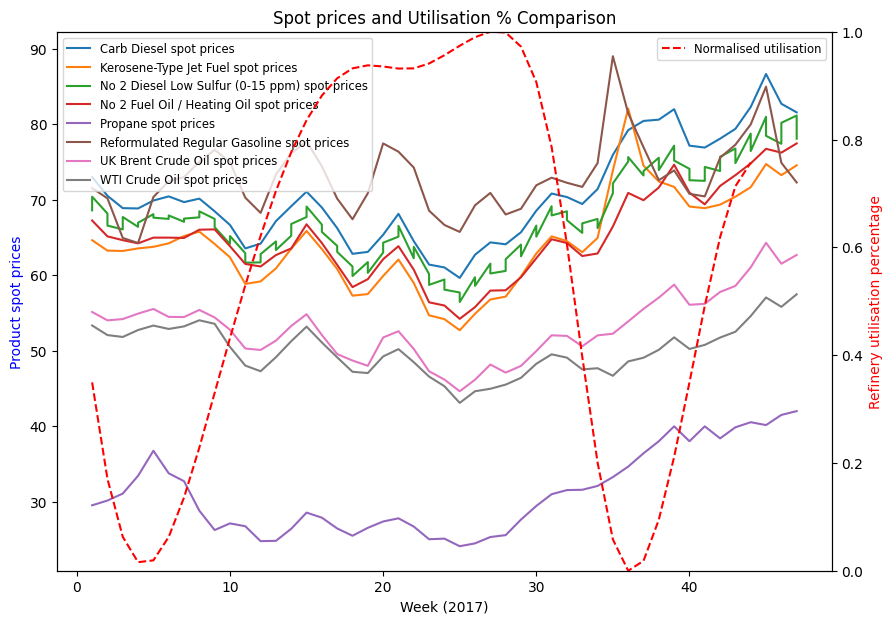

In [913]:
# Function to normalize data
def normalise(data):
    return (data - min(data)) / (max(data) - min(data))

# no need to filter the dataframe as we plot for all regions all together 
fig, ax1 = plt.subplots(figsize=(10, 7))
for product, df_product in merged_data.groupby('product-name'):
    # plot the petroleum products on the left y axis
    ax1.plot(df_product['week'], df_product['value_x'], label=f'{product} spot prices')

# create a second y-axis for the utilization of refineries
ax2 = ax1.twinx()

# normalise the utilisation percentage
normalised_utilisation = normalise(merged_data['value_y'])

# plot the normalised utilisation percentage
ax2.plot(merged_data['week'], normalised_utilisation, label='Normalised utilisation', linestyle='--', color='red')

# Adjust y-axis limits to 0 and 1
ax2.set_ylim(0, 1)

# Set labels and title
ax1.set_xlabel('Week (2017)')
ax1.set_ylabel('Product spot prices', color='blue')
ax2.set_ylabel('Refinery utilisation percentage', color='red')
ax1.set_title('Spot prices and Utilisation % Comparison')

# Set legend font size
ax1.legend(loc='upper left', fontsize='small')
ax2.legend(loc='upper right', fontsize='small')

# Show the plot
plt.show()

Because the data is for refineries in the United States, we are more concerned with the spot price of W.T.I crude oil. 

#### Crack Spreads for refinery activity/ profitability per area


Difference between wholesale petroleum product prices and crude oil prices. These spreads are often used to estimate refining margins. They do not take into consideration all refinery products and exclude refining costs other than the cost of crude oil. 

By comparing the price of crude oil (which is set in a global marketplace) with the price of refined products (which can be affected by local and seasonal factors), crack spreads can often give an indication of supply conditions in a given market.

**Multi-product crack spreads:** The 3:2:1 crack spread is calculated by subtracting the price of 3 barrels of oil from the price of 2 barrels of gasoline and 1 barrel of distillate.

We know:

1. Refinery utilisation % per area
2. Crude oil acquisition cost $ for refineries per area
3. Wholesale price $/gallon of distillate and gasoline per area
4. Calculate 3:2:1 crack spread using refinery data for each area 
5. Evaluate whether price shocks impact the statistical relationship as much for different areas in U.S.

- Calculate margins and crack spread vs. refinery utilisation per area 

In [972]:
df_ref_cost_crack = df_ref_cost.copy()

In [973]:
# drop rows containing string 'U.S.' in column 'area-name' of refinery acquision cost dataframe
filter = df_ref_cost_crack['area-name'].str.contains('U.S.')
df_ref_cost_crack = df_ref_cost_crack[~filter]
df_ref_cost_crack

,period,area-name,value,units
0,2017-01-01,PADD 3,49.85,$/BBL
1,2017-01-01,PADD 5,52.61,$/BBL
2,2017-01-01,PADD 2,48.26,$/BBL
3,2017-01-01,PADD 1,53.34,$/BBL
4,2017-01-01,PADD 4,46.38,$/BBL
6,2017-02-01,PADD 2,49.59,$/BBL
7,2017-02-01,PADD 1,53.29,$/BBL
8,2017-02-01,PADD 3,51.37,$/BBL
9,2017-02-01,PADD 4,47.68,$/BBL
11,2017-02-01,PADD 5,53.31,$/BBL


In [974]:
len(df_ref_cost_crack)

55

In [975]:
df_ref_cost_crack = pd.concat([df_ref_cost_crack, df_ref_cost_crack], axis=0)

In [976]:
df_ref_cost_crack

,period,area-name,value,units
0,2017-01-01,PADD 3,49.85,$/BBL
1,2017-01-01,PADD 5,52.61,$/BBL
2,2017-01-01,PADD 2,48.26,$/BBL
3,2017-01-01,PADD 1,53.34,$/BBL
4,2017-01-01,PADD 4,46.38,$/BBL
...,...,...,...,...
60,2017-11-01,PADD 2,54.69,$/BBL
62,2017-11-01,PADD 5,61.50,$/BBL
63,2017-11-01,PADD 4,53.78,$/BBL
64,2017-11-01,PADD 3,57.89,$/BBL


Crack Spread per area

In [990]:
merged_df = pd.merge(ref_product_prices, df_ref_cost_crack, on=['period', 'area-name'], how='inner')

In [991]:
merged_df = merged_df.drop_duplicates()

In [996]:
merged_df

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value_x,units_x,value_y,units_y
0,2017-01-01,R50,PADD 5,EPD2,No 2 Distillate,PWG,Wholesale/Resale Price by Refiners and Gas Plants,EMA_EPD2_PWG_R50_DPG,West Coast (PADD 5) No 2 Distillate Wholesale/...,73.542,$/BBL,52.61,$/BBL
2,2017-01-01,R50,PADD 5,EPM0,Total Gasoline,PWG,Wholesale/Resale Price by Refiners and Gas Plants,EMA_EPM0_PWG_R50_DPG,West Coast (PADD 5) Total Gasoline Wholesale/R...,74.844,$/BBL,52.61,$/BBL
4,2017-01-01,R30,PADD 3,EPM0,Total Gasoline,PWG,Wholesale/Resale Price by Refiners and Gas Plants,EMA_EPM0_PWG_R30_DPG,Gulf Coast (PADD 3) Total Gasoline Wholesale/R...,66.864,$/BBL,49.85,$/BBL
6,2017-01-01,R20,PADD 2,EPM0,Total Gasoline,PWG,Wholesale/Resale Price by Refiners and Gas Plants,EMA_EPM0_PWG_R20_DPG,Midwest (PADD 2) Total Gasoline Wholesale/Resa...,65.982,$/BBL,48.26,$/BBL
8,2017-01-01,R40,PADD 4,EPM0,Total Gasoline,PWG,Wholesale/Resale Price by Refiners and Gas Plants,EMA_EPM0_PWG_R40_DPG,Rocky Mountain (PADD 4) Total Gasoline Wholesa...,68.124,$/BBL,46.38,$/BBL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,2017-11-01,R40,PADD 4,EPD2,No 2 Distillate,PWG,Wholesale/Resale Price by Refiners and Gas Plants,EMA_EPD2_PWG_R40_DPG,Rocky Mountain (PADD 4) No 2 Distillate Wholes...,90.258,$/BBL,53.78,$/BBL
212,2017-11-01,R40,PADD 4,EPM0,Total Gasoline,PWG,Wholesale/Resale Price by Refiners and Gas Plants,EMA_EPM0_PWG_R40_DPG,Rocky Mountain (PADD 4) Total Gasoline Wholesa...,76.986,$/BBL,53.78,$/BBL
214,2017-11-01,R20,PADD 2,EPM0,Total Gasoline,PWG,Wholesale/Resale Price by Refiners and Gas Plants,EMA_EPM0_PWG_R20_DPG,Midwest (PADD 2) Total Gasoline Wholesale/Resa...,74.340,$/BBL,54.69,$/BBL
216,2017-11-01,R50,PADD 5,EPD2,No 2 Distillate,PWG,Wholesale/Resale Price by Refiners and Gas Plants,EMA_EPD2_PWG_R50_DPG,West Coast (PADD 5) No 2 Distillate Wholesale/...,86.730,$/BBL,61.50,$/BBL


`value_x` is the wholesale price of petroleum products

`value_y` is the crude oil acquisition cost for refiners

In [998]:
# drop rows containing string 'U.S.' in column 'area-name' of refinery acquision cost dataframe
filter = refinery_utilization_US['area-name'].str.contains('U.S.')
refinery_utilization_US_crack = refinery_utilization_US[~filter]

In [1001]:
refinery_utilization_US_crack = refinery_utilization_US_crack.reset_index(drop=True)

In [1006]:
monthly_crack_spread_per_area = refinery_utilization_US_crack.copy()
monthly_crack_spread_per_area['units'] = monthly_crack_spread_per_area['units'].str.replace('%', '$/BBL')
monthly_crack_spread_per_area['process-name'] = monthly_crack_spread_per_area['process-name'].str.replace('% Utilization Refinery Operable Capacity', 'Crack Spread')


In [1007]:
monthly_crack_spread_per_area

,period,area-name,process-name,value,units
0,2017-01-01,PADD 3,Crack Spread,87.8,$/BBL
1,2017-01-01,PADD 5,Crack Spread,86.4,$/BBL
2,2017-01-01,PADD 2,Crack Spread,93.0,$/BBL
3,2017-01-01,PADD 4,Crack Spread,88.6,$/BBL
4,2017-01-01,PADD 1,Crack Spread,83.7,$/BBL
5,2017-02-01,PADD 3,Crack Spread,85.7,$/BBL
6,2017-02-01,PADD 5,Crack Spread,80.7,$/BBL
7,2017-02-01,PADD 2,Crack Spread,90.6,$/BBL
8,2017-02-01,PADD 4,Crack Spread,85.4,$/BBL
9,2017-02-01,PADD 1,Crack Spread,71.9,$/BBL


In [1011]:
for area, df in merged_df.groupby('area-name'):

    grouped_df = df.groupby('period')

    for period, period_df in grouped_df:
        no2_distillate_price = period_df.loc[period_df['product-name'] == 'No 2 Distillate', 'value_x'].values[0]
        total_gasoline_price = period_df.loc[period_df['product-name'] == 'Total Gasoline', 'value_x'].values[0]
        crude_oil_price = period_df.loc[period_df['product-name'] == 'Total Gasoline', 'value_y'].values[0] # crude price on both rows for that date

        crack_spread = - 3 * crude_oil_price + 2 * total_gasoline_price + no2_distillate_price
        # we have current 'period' and 'area' for spread... insert crack spread into original dataframe
        monthly_crack_spread_per_area.loc[(monthly_crack_spread_per_area['period']==period) &
                                            (monthly_crack_spread_per_area['area-name']==area),
                                            'value'] = crack_spread

In [1012]:
monthly_crack_spread_per_area

,period,area-name,process-name,value,units
0,2017-01-01,PADD 3,Crack Spread,51.840,$/BBL
1,2017-01-01,PADD 5,Crack Spread,65.400,$/BBL
2,2017-01-01,PADD 2,Crack Spread,54.552,$/BBL
3,2017-01-01,PADD 4,Crack Spread,64.518,$/BBL
4,2017-01-01,PADD 1,Crack Spread,43.344,$/BBL
5,2017-02-01,PADD 3,Crack Spread,45.978,$/BBL
6,2017-02-01,PADD 5,Crack Spread,70.524,$/BBL
7,2017-02-01,PADD 2,Crack Spread,47.664,$/BBL
8,2017-02-01,PADD 4,Crack Spread,65.238,$/BBL
9,2017-02-01,PADD 1,Crack Spread,41.520,$/BBL


In [1015]:
# plot the crack spread and refinery utilisation per area
merged_df = pd.merge(monthly_crack_spread_per_area, refinery_utilization_US_crack, on=['period', 'area-name'], how='inner')

value_x = crack spread

value_y = utilisation refinery %

/var/folders/g2/l186zykd1g56mc9vp1p2rv280000gn/T/ipykernel_6256/3244579071.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(['3', '4'])


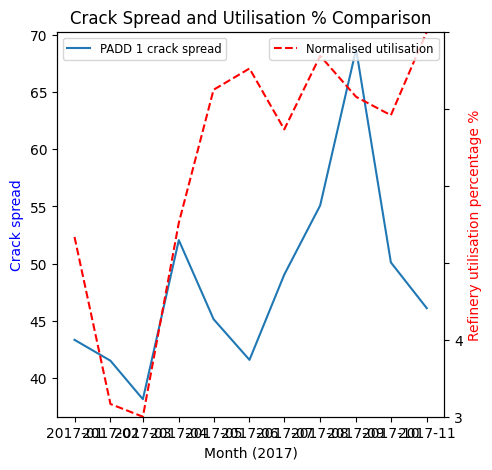

/var/folders/g2/l186zykd1g56mc9vp1p2rv280000gn/T/ipykernel_6256/3244579071.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(['3', '4'])


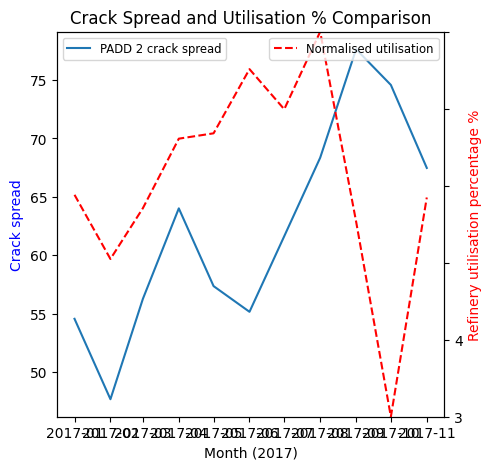

/var/folders/g2/l186zykd1g56mc9vp1p2rv280000gn/T/ipykernel_6256/3244579071.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(['3', '4'])


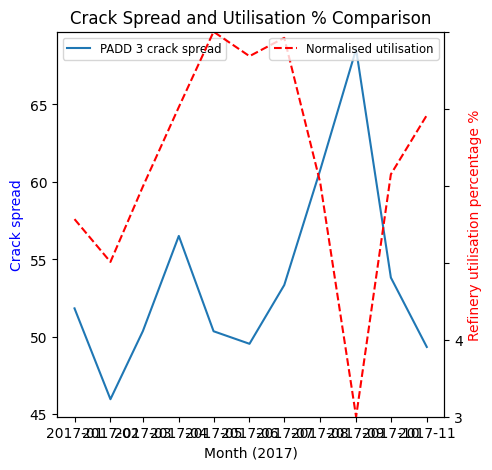

/var/folders/g2/l186zykd1g56mc9vp1p2rv280000gn/T/ipykernel_6256/3244579071.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(['3', '4'])


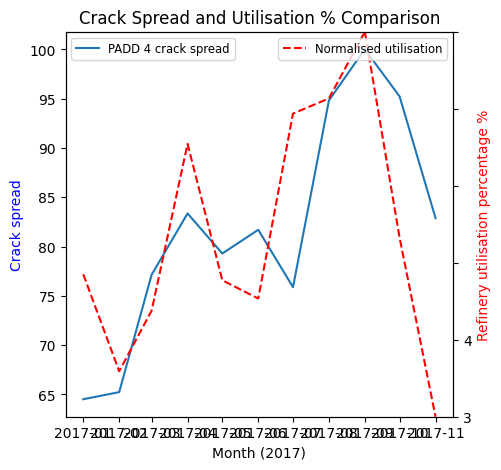

/var/folders/g2/l186zykd1g56mc9vp1p2rv280000gn/T/ipykernel_6256/3244579071.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(['3', '4'])


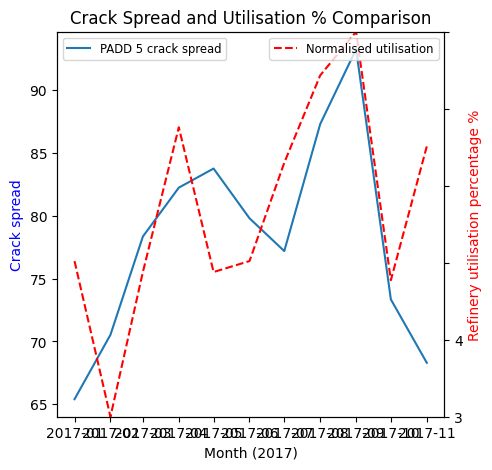

In [1035]:
# Function to normalize data
def normalise(data):
    return (data - min(data)) / (max(data) - min(data))


for area, df_area in merged_df.groupby('area-name'):
    # no need to filter the dataframe as we plot for all regions all together 
    fig, ax1 = plt.subplots(figsize=(5, 5))
    
    # plot the crack spread on the left y axis
    ax1.plot(df_area['period'], df_area['value_x'], label=f'{area} crack spread')

    # create a second y-axis for the utilization of refineries
    ax2 = ax1.twinx()

    # normalise the utilisation percentage
    normalised_utilisation = normalise(df_area['value_y'])

    # plot the normalised utilisation percentage
    ax2.plot(df_area['period'], normalised_utilisation, label='Normalised utilisation', linestyle='--', color='red')

    # Adjust y-axis limits to 0 and 1
    ax2.set_ylim(0, 1)
    ax2.set_yticklabels(['3', '4'])


    # Set labels and title
    ax1.set_xlabel('Month (2017)')
    ax1.set_ylabel('Crack spread', color='blue')
    ax2.set_ylabel('Refinery utilisation percentage %', color='red')
    ax1.set_title('Crack Spread and Utilisation % Comparison')

    # Set legend font size
    ax1.legend(loc='upper left', fontsize='small')
    ax2.legend(loc='upper right', fontsize='small')

    # Show the plot
    plt.show()

#### Additional ideas: crude oil price shocks
- impact of permanent disruption to global revenue on inventories of crude oil (search for dataset)
- when adverse (bad) shock on demand stems from the permanent component of the shock = could correspond to to persistent innovation lowering the dependency on oil

### Oil Market Variables - SVAR assessment

#### SVAR

- Estimating the model: The SVAR model is estimated using historical data on the chosen variables. This estimation involves specifying the lag structure of the model (how many past periods of each variable to include), identifying any cointegrating relationships, and estimating the parameters of the model.

- Impulse Response Analysis: Once the SVAR model is estimated, researchers can conduct impulse response analysis to examine how the variables respond to shocks. In this analysis, a shock is applied to one variable, and the responses of all variables in the system are observed over time. By examining the responses, researchers can infer the dynamic relationships among the variables and the effects of different shocks on the system.

- Shock Identification: SVAR models allow researchers to identify different types of shocks based on their economic interpretation. For example, a positive oil demand shock might be interpreted as an increase in global economic activity, leading to higher demand for oil. A negative oil supply shock could be due to geopolitical events disrupting oil production in key regions. By analyzing the impulse responses, researchers can attribute changes in oil prices to specific shocks based on their timing and magnitude.

### Relationship between Log oil prices and Log dollar exchange rates


In [41]:
epo_r

Date
1986-01-01   -0.264642
1986-02-01   -0.656091
1986-03-01   -0.855271
1986-04-01   -0.835356
1986-05-01   -0.657612
                ...   
2018-10-01   -0.190836
2018-11-01   -0.327453
2018-12-01   -0.287382
2019-01-01   -0.222112
2019-02-01   -0.169728
Name: epo_r, Length: 398, dtype: float64

/var/folders/g2/l186zykd1g56mc9vp1p2rv280000gn/T/ipykernel_98044/2835643497.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index_value = float(full_data.loc[full_data.Date == '01-2000']['TWEXBPA'].values)
/var/folders/g2/l186zykd1g56mc9vp1p2rv280000gn/T/ipykernel_98044/2835643497.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index_value = float(full_data.loc[full_data.Date == '01-2000']['TWEXMPA'].values)
/var/folders/g2/l186zykd1g56mc9vp1p2rv280000gn/T/ipykernel_98044/2835643497.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single ele

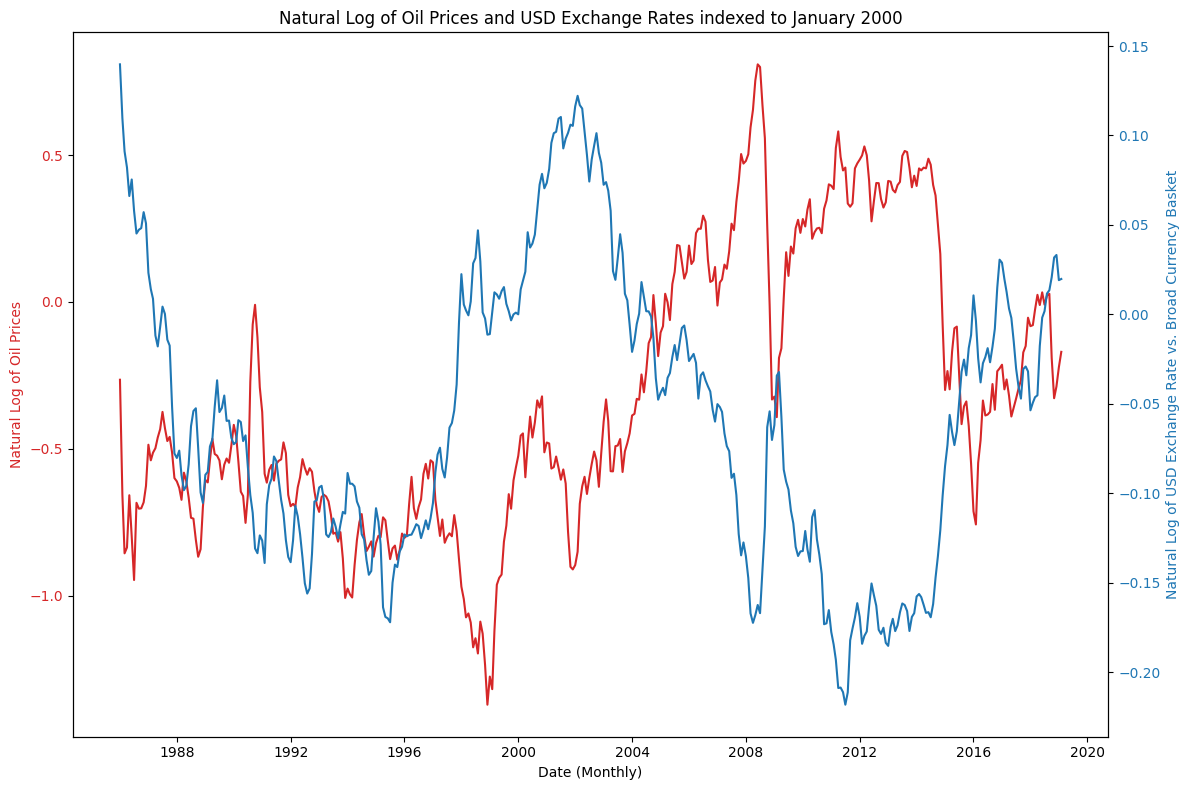

In [8]:
# for linear algebra and mathematical functions
import numpy as np
# for dataframe manipulation
import pandas as pd
# for data visualization
import matplotlib.pyplot as plt
# for setting plot size
import matplotlib as mpl
# for changing the plot size in the Jupyter Notebook output
%matplotlib inline
# sets the plot size to 12x8
mpl.rcParams['figure.figsize'] = (12,8)

# reads in data on historical oil prices and dollar exchange rates
full_data = pd.read_csv('Oil Data.csv')

# generates a variable for the growth rate of the Real Trade Weighted U.S. Dollar Index: 
# Broad, Goods indexed to January 2000
index_value = float(full_data.loc[full_data.Date == '01-2000']['TWEXBPA'].values)
full_data['broad_r'] = list(full_data.TWEXBPA / index_value)
full_data['ebroad_r'] = np.log(full_data.broad_r)

# generates a variable for the growth rate of the Real Trade Weighted U.S. Dollar Index: 
# Major Currencies, Goods indexed to January 2000
index_value = float(full_data.loc[full_data.Date == '01-2000']['TWEXMPA'].values)
full_data['major_r'] = list(full_data.TWEXMPA / index_value)
full_data['emajor_r'] = np.log(full_data.major_r)

# generates a variable for the growth rate of the Real Trade Weighted U.S. Dollar Index: 
# Other Important Trading Partners, Goods indexed to January 2000
index_value = float(full_data.loc[full_data.Date == '01-2000']['TWEXOPA'].values)
full_data['oitp_r'] = list(full_data.TWEXOPA / index_value)
full_data['eoitp_r'] = np.log(full_data.oitp_r)

# generates a variable for the growth rate of Crude Oil Prices: West Texas Intermediate 
# (WTI) - Cushing, Oklahoma indexed to January 2000
index_value = float(full_data.loc[full_data.Date == '01-2000']['MCOILWTICO'].values)

# adjusts for inflation prior to indexing to January 2000
full_data['po_r'] = full_data.MCOILWTICO / (full_data.Fred_CPIAUCNS / 100) / index_value
full_data['epo_r'] = np.log(full_data.po_r)

# creates a column for month
full_data.Date = pd.to_datetime(full_data.Date)
full_data['month'] = full_data.Date.map(lambda x: x.month)

# creates a list of all the variables of interest
variables_to_keep = ['epo_r', 'Date', 'month', 'ebroad_r', 'emajor_r', 'eoitp_r']

# creates a new dataframe containing only the variables of interest
my_data = full_data[variables_to_keep]

# creates dummy variables for each month, dropping January to avoid multicollinearity
my_data =  pd.concat([my_data, pd.get_dummies(my_data.month, drop_first = True)], axis = 1)

# sets the Date as the index
my_data.index = pd.DatetimeIndex(my_data.Date)

# drops these columns for a tidy data set
my_data = my_data.drop(['month', 'Date'], axis = 1)


# the code below plots the real oil price growth rate with the USD vs Broad Currency Basket
# exchange growth rate

# Create some mock data
time = my_data.index
epo_r = my_data.epo_r
ebroad_r = my_data.ebroad_r

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date (Monthly)')
ax1.set_ylabel('Natural Log of Oil Prices', color = color)
ax1.plot(time, epo_r, color=color)
ax1.tick_params(axis = 'y', labelcolor = color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Natural Log of USD Exchange Rate vs. Broad Currency Basket', 
               color = color)  # we already handled the x-label with ax1
ax2.plot(time, ebroad_r, color = color)
ax2.tick_params(axis = 'y', labelcolor = color)

plt.title('Natural Log of Oil Prices and USD Exchange Rates indexed to January 2000')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Appears inversely related over time. One goes up, the other goes down. Blue line represents the log of USD exchange vs. basket of foreign currencies. Red line represents the log of Crude Oil Prices. 

People outside the U.S. buying oil need to buy U.S. dollars for the transaction. During a rise in oil prices (USD), they need to exchange moer of their domestic currency for the same amount purchased. This increases USD demand to purchase oil, and the supply of foreign currencies increases. This strengthens the dollar and the exchange rate does down. (i.e. exchange rate of 1 means one needs 1 USD to purchase 1 unit of foreign currency, and a lower rate of exchange rate means one needs 0.5 USD to purchase 1 unit of foreign currency).

**Question:** does this inverse relationship always hold up? For example:
- During certain periods, does a movement in one correspond to a larger movement in the other relative to other times? 

**Why would this relationship change over time?**

- Major currency crisis across a region drives up demand for USD vs. inflationary domestic currency, however, a weaker economy has lower oil demand due to a weakening economy
- Many currencies could disappear and one major one forms as the countries join a monetary union, such as the EU in 1999


**Potential Historical Events:** Test all of these potential structural breaks and analyse which ones are the most impactful. 

- Creation of EU zone 1999
- 2008 Global Financial Crisis: During the financial crisis, economic uncertainty and decreased demand for oil led to a sharp decline in oil prices. Simultaneously, investors sought safe-haven assets like the USD, leading to an appreciation of the currency.
- 2014 Oil Price Crash: The oversupply of oil due to increased production, coupled with weakening global demand, resulted in a steep drop in oil prices. This dynamic affected the USD exchange rate differently depending on economic conditions and market sentiment.

#### 5-year Rolling Correlation (60 months)

In [3]:
epo_r.corr(ebroad_r)

-0.4522777454695896

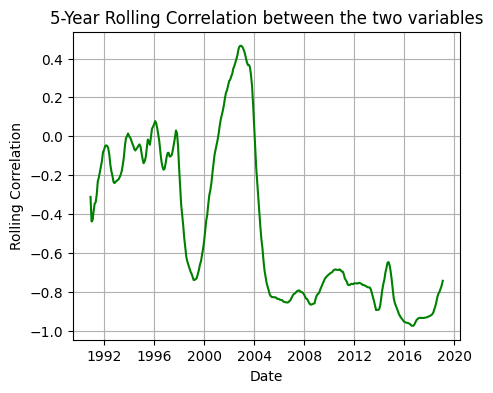

In [9]:
# Calculate the rolling correlation with a window of 5 years (60 months)
rolling_corr = epo_r.rolling(window=60).corr(ebroad_r)

# Plot the rolling correlation
plt.figure(figsize=(5, 4))
plt.plot(rolling_corr.index, rolling_corr, color='green')
plt.title('5-Year Rolling Correlation between the two variables')
plt.xlabel('Date')
plt.ylabel('Rolling Correlation')
plt.grid(True)
plt.show()

The relationship does not seem to be the same over time. It is needed to use flexible modelling to capture the relationship over time. 

#### Stochastic Properties of both Time Series

- **ADF Test** does not consider structural breaks

Differentiated exchange rates seem stationary

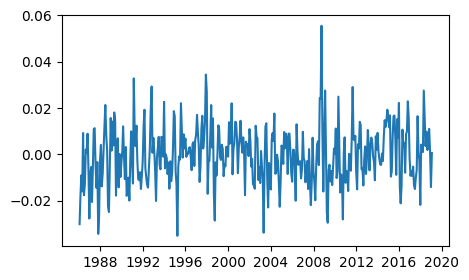

In [12]:
plt.figure(figsize=(5,3))
plt.plot(my_data.index, my_data['ebroad_r'].diff())

In [7]:
# Perform the Augmented Dickey-Fuller (ADF) test
from statsmodels.tsa.stattools import adfuller
result = adfuller(my_data['ebroad_r'].diff().dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}: {value}')

ADF Statistic: -12.695296168455684
p-value: 1.1094758247714135e-23
Critical Values:
1%: -3.447014064067954
5%: -2.8688850015516016
10%: -2.5706826870693797


In [16]:
# Perform the Augmented Dickey-Fuller (ADF) test
from statsmodels.tsa.stattools import adfuller
result = adfuller(my_data['epo_r'].diff().dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}: {value}')

ADF Statistic: -15.684998337915014
p-value: 1.4570855069423291e-28
Critical Values:
1%: -3.4469717056192213
5%: -2.868866381945153
10%: -2.570672761197837


- **Zivot Andrews Test** allows the possibility of a single structural break in the series. Here we test the default using the test.

In [ ]:
from arch.unitroot import ZivotAndrews

In [19]:
za = ZivotAndrews(my_data['ebroad_r'].diff().dropna())
print(za.summary().as_text())

        Zivot-Andrews Results        
Test Statistic                -13.320
P-value                         0.000
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -5.28 (1%), -4.81 (5%), -4.57 (10%)
Null Hypothesis: The process contains a unit root with a single structural break.
Alternative Hypothesis: The process is trend and break stationary.


In [20]:
za = ZivotAndrews(my_data['epo_r'].diff().dropna())
print(za.summary().as_text())

        Zivot-Andrews Results        
Test Statistic                -15.837
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -5.28 (1%), -4.81 (5%), -4.57 (10%)
Null Hypothesis: The process contains a unit root with a single structural break.
Alternative Hypothesis: The process is trend and break stationary.


Since the p-value is extremely small (0.000), much smaller than any conventional significance level, we reject the null hypothesis. This suggests that there is strong evidence against the presence of a unit root with a single structural break in the time series, indicating that the series is likely trend and break stationary.

Log Exchange Rates and Log Oil Price seem to be {\it I(1)} 

Since both time series seem to be {\it I(1)}, we test for cointegration by using the:

1. Johansen cointegration test (only detects stable linear relationships) on the original time series, not differenced time series

2. Test whether there are any structural breaks in the individual

If there is evidence of structural breaks, employ cointegration tests that allow for structural breaks

In [10]:
# 1. johansen cointgration test for linear relationships
#from statsmodels.tsa.vector_ar.vecm import coint_johansen
import statsmodels.tsa.stattools as ts 
#data_diff = my_data[['epo_r', 'ebroad_r']].diff().dropna()
result = ts.coint(epo_r, ebroad_r)
result

(-1.674243102854624,
 0.6885624793909968,
 array([-3.92423937, -3.35156397, -3.05515038]))

With this result obtained using the Engle-Granger Cointegration Test. It considers the case that there is a single cointegrating vector. The test follows the very simple intuition that if variables are cointegrated, then the residual of the cointegrating regression should be stationary.

We conclude that we fail to reject the null hypothesis of no cointegration (i.e. the series are not cointegrated)

Test for structural breaks in the individual series 

In [12]:
import ruptures as rp

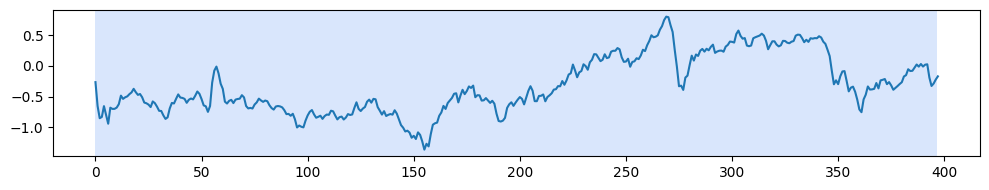

In [15]:
# 2. structural breaks for log of oil price

pelt = rp.Pelt(jump = 10)
bkps = pelt.fit_predict(epo_r.diff().dropna().values, 5) # log oil price series
rp.display(epo_r.values, bkps)
plt.show()

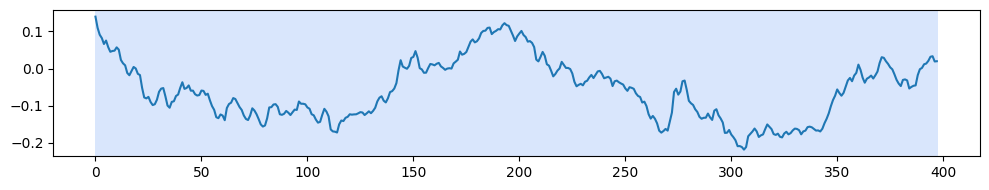

In [35]:
# 2. structural breaks for log of exchange rates differenced

pelt = rp.Pelt(jump = 10)
bkps = pelt.fit_predict(ebroad_r.values, 5) # log oil price series
rp.display(ebroad_r.values, bkps)
plt.show()

We see no structural breaks in the original time series.

#### Linear Granger-Causality

/opt/anaconda3/envs/datasci/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/anaconda3/envs/datasci/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/anaconda3/envs/datasci/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/anaconda3/envs/datasci/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/anaconda3/envs/datasci/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/anaconda3/envs/datasci/lib/python3.12/site-packages/statsmod

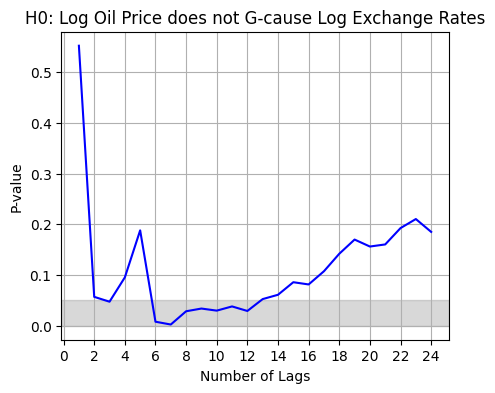

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests

# Define the number of lags
max_lag = 24

# Initialize a list to store p-values
p_values = []

# Perform Granger causality tests for each lag
for lag in range(1, max_lag + 1):
    result = grangercausalitytests(my_data[['epo_r', 'ebroad_r']], maxlag=lag, verbose=False) # oil vs. exchange
    p_value = result[lag][0]['ssr_ftest'][1]  # Get the p-value for the F-test
    p_values.append(p_value)

# Plotting the results
plt.figure(figsize=(5, 4))

# Plot the p-values
plt.plot(range(1, max_lag + 1), p_values, color='blue')

# Highlight significant p-values (<= 0.05) by shading the area
plt.axhspan(0, 0.05, color='grey', alpha=0.3)

# Add labels and title
plt.title('H0: Log Oil Price does not G-cause Log Exchange Rates')
plt.xlabel('Number of Lags')
plt.ylabel('P-value')
plt.xticks(np.arange(0, max_lag + 1, 2))  # Show x-axis ticks every 2 lags
plt.grid(True)
plt.show()



/opt/anaconda3/envs/datasci/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/anaconda3/envs/datasci/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/anaconda3/envs/datasci/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/anaconda3/envs/datasci/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/anaconda3/envs/datasci/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/anaconda3/envs/datasci/lib/python3.12/site-packages/statsmod

/opt/anaconda3/envs/datasci/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/anaconda3/envs/datasci/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/anaconda3/envs/datasci/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/anaconda3/envs/datasci/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/anaconda3/envs/datasci/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/anaconda3/envs/datasci/lib/python3.12/site-packages/statsmod

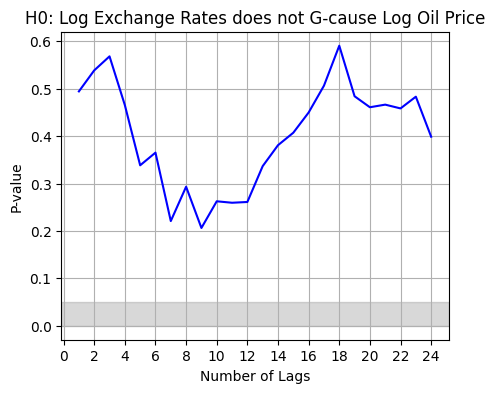

In [4]:
# Define the number of lags
max_lag = 24

# Initialize a list to store p-values
p_values = []

# Perform Granger causality tests for each lag
for lag in range(1, max_lag + 1):
    result = grangercausalitytests(my_data[['ebroad_r', 'epo_r']], maxlag=lag, verbose=False) # oil vs. exchange
    p_value = result[lag][0]['ssr_ftest'][1]  # Get the p-value for the F-test
    p_values.append(p_value)

# Plotting the results
plt.figure(figsize=(5, 4))

# Plot the p-values
plt.plot(range(1, max_lag + 1), p_values, color='blue')

# Highlight significant p-values (<= 0.05) by shading the area
plt.axhspan(0, 0.05, color='grey', alpha=0.3)

# Add labels and title
plt.title('H0: Log Exchange Rates does not G-cause Log Oil Price')
plt.xlabel('Number of Lags')
plt.ylabel('P-value')
plt.xticks(np.arange(0, max_lag + 1, 2))  # Show x-axis ticks every 2 lags
plt.grid(True)
plt.show()

#### Non-Linear Granger Causality

"Apply the nonlinear G-causality test proposed by [29] -henceforth DP- to the de-linearized series obtained by using the VAR filter, whose number of lags are 2 based on Schwarz Information Criterion. It is worth noting that “by removing linear predictive power with a linear VAR model, any remaining incremental predictive power of one residual series for another can be considered nonlinear predictive power” (see [30], page 1648)"

In [5]:
import nonlincausality

2024-04-24 13:39:01.316743: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Fit linear VAR model to differenced log-transformed series, to capture the linear relationships between the variables

In [49]:
import numpy as np
import pandas as pd
from statsmodels.tsa.api import VAR

data_diff = my_data[['ebroad_r', 'epo_r']].diff().dropna()

# Fit a VAR model to the differenced series
model = VAR(data_diff)

# lags=2 based on Schwarz Information Criterion
result = model.fit(maxlags=2, ic='bic')

# Print the summary of the VAR model
print(result.summary())


/opt/anaconda3/envs/datasci/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 24, Apr, 2024
Time:                     18:58:54
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -14.0002
Nobs:                     396.000    HQIC:                  -14.0366
Log likelihood:           1666.18    FPE:                7.82705e-07
AIC:                     -14.0605    Det(Omega_mle):     7.70979e-07
--------------------------------------------------------------------
Results for equation ebroad_r
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              -0.000115         0.000564           -0.204           0.838
L1.ebroad_r         0.364745         0.047454            7.686           0.000
L1.epo_r           -0.006540         0.006753           -0.968   

Schwarz criterion, or Bayesion Information Criterion, 

The formula for the Schwarz Criterion is given by:

BIC = ln(n)k - 2ln(L)

where:

n is the number of data points in the sample,
k
is the number of parameters estimated by the model,

L is the maximized value of the likelihood function of the model.
The BIC is particularly useful because it introduces a penalty term for the number of parameters in the model, which helps to prevent overfitting. As the number of parameters increases, the penalty becomes more severe, thus discouraging the selection of overly complex models. The model with the lowest BIC is generally preferred as it is considered to be the best balance between fit and complexity.

Subtract the predicted values obtained (from the VAR model) from the original log-transformed series

In [58]:
# Step 3: Subtract the predicted values from the original series to get the residuals
residuals = data_diff - result.fittedvalues
residuals = residuals.dropna()
residuals

,ebroad_r,epo_r
Date,,
1986-03-01,-0.010036,-0.133418
1986-04-01,-0.003446,0.050261
1986-05-01,-0.012402,0.164816
1986-06-01,0.016330,-0.196367
1986-07-01,-0.021747,-0.107949
...,...,...
2018-10-01,0.006697,-0.219416
2018-11-01,0.007076,-0.080795
2018-12-01,-0.003389,0.079890


In [62]:
residuals_oil = residuals['epo_r']

In [63]:
residuals_USD = residuals['ebroad_r']

In [70]:
np.array(np.array(pd.concat([residuals_oil, residuals_USD], axis=1)))

array([[-1.33417975e-01, -1.00361284e-02],
       [ 5.02613012e-02, -3.44583555e-03],
       [ 1.64815838e-01, -1.24020755e-02],
       [-1.96367344e-01,  1.63303535e-02],
       [-1.07948586e-01, -2.17466891e-02],
       [ 2.81809863e-01, -7.08297133e-03],
       [-9.23026696e-02,  8.56804491e-03],
       [ 6.51068650e-03,  9.88103496e-05],
       [ 1.98506073e-02,  8.74961672e-03],
       [ 5.75034865e-02, -9.29859539e-03],
       [ 1.21009184e-01, -2.48500965e-02],
       [-1.09069353e-01,  1.96396290e-03],
       [ 3.00157769e-02, -2.30377858e-03],
       [ 3.80115919e-03, -1.82569235e-02],
       [ 1.51718405e-02,  1.58747789e-03],
       [ 1.39821912e-02,  1.34939983e-02],
       [ 6.00224181e-02,  7.65388655e-03],
       [-6.01498976e-02, -7.71182829e-03],
       [-3.59165379e-02, -1.31583148e-02],
       [ 1.18314922e-02,  1.77115200e-03],
       [-5.99992034e-02, -3.28425400e-02],
       [-1.03392785e-01, -1.37672858e-02],
       [-1.31670709e-02,  6.49364194e-03],
       [-2.

**Nonlinear Granger Causality Test:** Finally, you apply the nonlinear Granger causality test to these de-linearized residuals to assess the presence of any incremental predictive power beyond the linear relationships captured by the VAR model.

Non-linear causality using Neural Networks (MLP)

X = ebroad_r i.e. exchange rates

Y = epo_r i.e. log oil price

1. Residuals of Oil **G-cause** residuals of Exchange USD

the residuals of oil prices are used as the independent variable, while the residuals of the U.S. exchange rate (USD) are used as the dependent variable.

In [ ]:
import os
os.environ['TF_USE_LEGACY_KERAS'] = '1'

import numpy as np
from statsmodels.tsa.api import VAR
from sklearn.model_selection import train_test_split
import nonlincausality as nlc

# Splitting into train and temp sets (80% train, 20% temp)
data_train, temp = train_test_split(np.array(pd.concat([residuals_USD, residuals_oil], axis=1)), test_size=0.4, random_state=42)

# Splitting temp into validation and test sets (50% validation, 50% test)
data_val, data_test = train_test_split(temp, test_size=0.5, random_state=42)
lags = [i for i in range(1, 25)]


results = nlc.nonlincausalitymeasureNN(
    x=data_train,
    maxlag=lags,
    window=100,
    step=1,
    NN_config=['d','dr','d','dr'],
    NN_neurons=[100,0.05,100,0.05],
    x_test=data_test,
    run=3,
    epochs_num=[50,50],
    learning_rate=[0.0001, 0.00001],
    batch_size_num=32,
    x_val=data_val,
    verbose=True,
    plot=True,
)

2. Residuals Log Oil Price **G-cause** residuals of Log Exchange Rate

In [ ]:
import os
os.environ['TF_USE_LEGACY_KERAS'] = '1'

import numpy as np
from statsmodels.tsa.api import VAR
from sklearn.model_selection import train_test_split
import nonlincausality as nlc

# Splitting into train and temp sets (80% train, 20% temp)
data_train, temp = train_test_split(np.array(pd.concat([residuals_USD, residuals_oil], axis=1)), test_size=0.4, random_state=42)

# Splitting temp into validation and test sets (50% validation, 50% test)
data_val, data_test = train_test_split(temp, test_size=0.5, random_state=42)
lags = [i for i in range(1, 25)]


results = nlc.nonlincausalitymeasureNN(
    x=data_train,
    maxlag=lags,
    window=100,
    step=1,
    NN_config=['d','dr','d','dr'],
    NN_neurons=[100,0.05,100,0.05],
    x_test=data_test,
    run=3,
    epochs_num=[50,50],
    learning_rate=[0.0001, 0.00001],
    batch_size_num=32,
    x_val=data_val,
    verbose=True,
    plot=True,
)

Non-linear Granger Causality

1. H0: Log Exchange Rates does not G-cause Log Oil Prices

In [22]:
import matplotlib as mpl 
mpl.rcParams['text.usetex'] = False

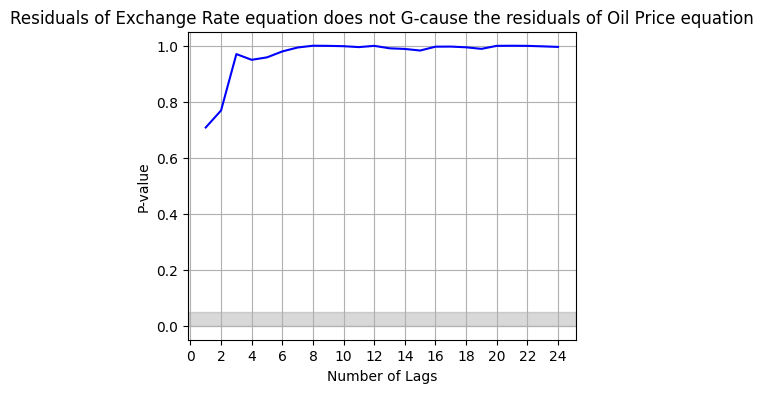

In [25]:
# Define the number of lags
max_lag = 24

# Initialize a list to store p-values
p_values = [0.7079314650098844, 0.7687270020623229, 0.9700277442297254, 0.9496242038938199, 0.9583652337155824, 0.979545741678291, 0.993570382644863, 0.9999394799740572, 0.9994762834640527, 0.9982675369699314, 0.9949725622406672, 0.9994943609804783, 0.9907382846292309, 0.9884253875503287, 0.9827445757349075, 0.9965512395102734, 0.9968485767812949, 0.9942559754913256, 0.9887119009647728, 0.999500195118436, 0.9998544131191202, 0.9994343490071415, 0.9976904810307261, 0.9956876292572623]

# Plotting the results
plt.figure(figsize=(5, 4))

# Plot the p-values
plt.plot(range(1, max_lag + 1), p_values, color='blue')

# Highlight significant p-values (<= 0.05) by shading the area
plt.axhspan(0, 0.05, color='grey', alpha=0.3)

# Add labels and title
plt.title('Residuals of Exchange Rate equation does not G-cause the residuals of Oil Price equation')
plt.xlabel('Number of Lags')
plt.ylabel('P-value')
plt.xticks(np.arange(0, max_lag + 1, 2))  # Show x-axis ticks every 2 lags
plt.grid(True)
plt.show()


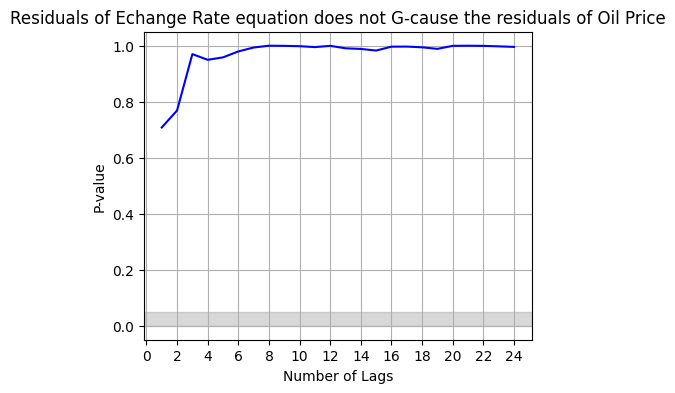

In [24]:
# Define the number of lags
max_lag = 24

# Initialize a list to store p-values
p_values = [0.7079314650098844, 0.7687270020623229, 0.9700277442297254, 0.9496242038938199, 0.9583652337155824, 0.979545741678291, 0.993570382644863, 0.9999394799740572, 0.9994762834640527, 0.9982675369699314, 0.9949725622406672, 0.9994943609804783, 0.9907382846292309, 0.9884253875503287, 0.9827445757349075, 0.9965512395102734, 0.9968485767812949, 0.9942559754913256, 0.9887119009647728, 0.999500195118436, 0.9998544131191202, 0.9994343490071415, 0.9976904810307261, 0.9956876292572623]

# Plotting the results
plt.figure(figsize=(5, 4))

# Plot the p-values
plt.plot(range(1, max_lag + 1), p_values, color='blue')

# Highlight significant p-values (<= 0.05) by shading the area
plt.axhspan(0, 0.05, color='grey', alpha=0.3)

# Add labels and title
plt.title('Residuals of Echange Rate equation does not G-cause the residuals of Oil Price equation')
plt.xlabel('Number of Lags')
plt.ylabel('P-value')
plt.xticks(np.arange(0, max_lag + 1, 2))  # Show x-axis ticks every 2 lags
plt.grid(True)
plt.show()

H0: residuals of log Oil Price does not G-cause residuals of log Exchange Rate

findfont: Font family 'small' not found.
findfont: Font family 'small' not found.


findfont: Font family 'small' not found.
findfont: Font family 'small' not found.
findfont: Font family 'small' not found.


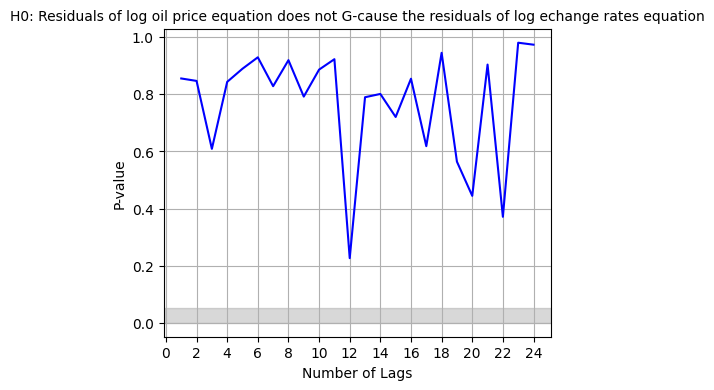

In [26]:
# Define the number of lags
max_lag = 24

# Initialize a list to store p-values
p_values = [0.8555400618267376, 0.8469747895236379, 0.6090031921109206, 0.84365262444983, 0.8897291893213484, 0.9296796109262604, 0.8285188548368125, 0.9196801546024359, 0.7920734434600325, 0.8865678335653864, 0.9230627548960683, 0.2261537984281674, 0.7898259005069821, 0.8013409708598687, 0.720684705640813, 0.8546587865085515, 0.6183799013374005, 0.9454255344920685, 0.5641944747485581, 0.4443811718334736, 0.9041896833734426, 0.3710590274302984, 0.9807610278576443, 0.973894268221905]

# Plotting the results
plt.figure(figsize=(5, 4))

# Plot the p-values
plt.plot(range(1, max_lag + 1), p_values, color='blue')

# Highlight significant p-values (<= 0.05) by shading the area
plt.axhspan(0, 0.05, color='grey', alpha=0.3)

# Add labels and title
plt.title('H0: Residuals of log oil price equation does not G-cause the residuals of log echange rates equation', font='small')
plt.xlabel('Number of Lags')
plt.ylabel('P-value')
plt.xticks(np.arange(0, max_lag + 1, 2))  # Show x-axis ticks every 2 lags
plt.grid(True)
plt.show()

In [196]:
from statsmodels.tsa.api import VAR
from sklearn.model_selection import train_test_split
import nonlincausality as nlc

# Splitting into train and temp sets (80% train, 20% temp)
data_train, temp = train_test_split(np.array(my_data[['ebroad_r', 'epo_r']]), test_size=0.4, random_state=42)

# Splitting temp into validation and test sets (50% validation, 50% test)
data_val, data_test = train_test_split(temp, test_size=0.5, random_state=42)
lags = range(1, 24 + 1)

# Define any parameters if needed
params = {}

# Define the endogenous variables
endog_vars = ['epo_r', 'ebroad_r']  # Adjust this based on your endogenous variables

# Initialize the VAR model with endogenous variables
var_model = VAR(data_train[endog_vars])

results_skl = nlc.nonlincausality_sklearn(    
    x=data_train,
    sklearn_model=VAR,
    maxlag=lags,
    params={},
    x_test=data_test,
    x_val=data_val,
    plot=True)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [3]:
import os
print(os.environ)


environ({'CONDA_DEFAULT_ENV': 'datasci', 'CONDA_EXE': '/opt/anaconda3/bin/conda', 'CONDA_PREFIX': '/opt/anaconda3/envs/datasci', 'CONDA_PROMPT_MODIFIER': '(datasci) ', 'CONDA_PYTHON_EXE': '/opt/anaconda3/bin/python', 'CONDA_SHLVL': '2', 'GSETTINGS_SCHEMA_DIR': '/opt/anaconda3/share/glib-2.0/schemas', 'HOME': '/Users/Alexandre', 'LOGNAME': 'Alexandre', 'MallocNanoZone': '0', 'OLDPWD': '/', 'ORIGINAL_XDG_CURRENT_DESKTOP': 'undefined', 'PATH': '/opt/anaconda3/envs/datasci/bin:/opt/anaconda3/condabin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Library/Apple/usr/bin', 'PWD': '/', 'SHELL': '/bin/zsh', 'SHLVL': '2', 'SSH_AUTH_SOCK': '/private/tmp/com.apple.launchd.4pfA2hA2zH/Listeners', 'TMPDIR': '/var/folders/g2/l186zykd1g56mc9vp1p2rv280000gn/T/', 'USER': 'Alexandre', 'VSCODE_AMD_ENTRYPOINT': 'vs/workbench/api/node/extensionHostProcess', 'VSCODE_CODE_CACHE_PATH': '/Users/Alexandre/Library/Application Support/Code/CachedData/8b3775030ed1a69b13e4f4c628c612102e30a681', 'VSCODE_CRASH_REPORTER_

In [2]:
import os
os.environ['TF_USE_LEGACY_KERAS'] = 'True'

Oil Price shocks are defined as a period over which we see a cumulative change larger than 40% (+ or -) in the log of the variable of interest. We identify 8 oil shocks 

In [ ]:
import pandas as pd

# Create a DataFrame with the shock information
shock_data = {
    'Start date': ['Jun-90', 'Dec-96', 'Jan-99', 'Dec-01', 'Jul-08', 'Jan-09', 'Jun-14', 'Mar-16', 'Feb-02'],
    'End date': ['Oct-90', 'Dec-98', 'Nov-00', 'Jun-08', 'Dec-08', 'Apr-11', 'Jan-16', 'Jul-18', 'Jul-08'],
    'Main event': ['Gulf war', 'Asian crisis', 'OPEC cutbacks', 'Asian boom', 'Great crisis', 'Gradual global recover', 'Weak growth', 'Global growth', 'U.S. monetary policy']
}

# Convert the shock information to a DataFrame
shock_df = pd.DataFrame(shock_data)

# Convert the date columns to datetime format
shock_df['Start date'] = pd.to_datetime(shock_df['Start date'], format='%b-%y')
shock_df['End date'] = pd.to_datetime(shock_df['End date'], format='%b-%y')

# Print the DataFrame with datetime format
print(shock_df)


#### Fitting the order of the VAR

In [33]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [39]:
# Splitting into train and temp sets (80% train, 20% temp)
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(my_data[['epo_r', 'ebroad_r']].diff().dropna(), test_size=0.2, random_state=42)
model = VAR(my_data[['epo_r', 'ebroad_r']].diff().dropna())

# autofit
x = model.select_order(maxlags=12)
x.summary()

/opt/anaconda3/envs/datasci/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,-13.92,-13.90,9.000e-07,-13.91
1,-14.12,-14.06*,7.342e-07,-14.10*
2,-14.13*,-14.03,7.299e-07*,-14.09
3,-14.13,-13.98,7.320e-07,-14.07
4,-14.12,-13.94,7.371e-07,-14.05
5,-14.13,-13.90,7.320e-07,-14.04
6,-14.12,-13.85,7.392e-07,-14.01
7,-14.10,-13.80,7.493e-07,-13.98
8,-14.09,-13.74,7.594e-07,-13.95
9,-14.07,-13.68,7.719e-07,-13.92


In [40]:
# fit model with optimal
model_fitted = model.fit(2)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 27, Apr, 2024
Time:                     15:35:44
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -13.9696
Nobs:                     395.000    HQIC:                  -14.0305
Log likelihood:           1667.94    FPE:                7.75027e-07
AIC:                     -14.0704    Det(Omega_mle):     7.55772e-07
--------------------------------------------------------------------
Results for equation epo_r
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.001231         0.004021            0.306           0.760
L1.epo_r            0.218013         0.051473            4.235           0.000
L1.ebroad_r        -0.851868         0.367366           -2.319      

#### Impulse Response Analysis


Impulse responses are of interest in econometric studies: they are the estimated responses to a unit impulse in one of the variables. They are computed in practice using the MA(
) representation of the VAR(p) process:

In [84]:
import statsmodels.tsa.vector_ar.irf
print(statsmodels.tsa.vector_ar.irf.__file__)


/opt/anaconda3/envs/datasci/lib/python3.12/site-packages/statsmodels/tsa/vector_ar/irf.py


In [29]:
import numpy as np
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.irf import BaseIRAnalysis, IRAnalysis
from statsmodels.tsa.vector_ar import irf

#import importlib

# Reload the module
#importlib.reload(irf)

# Fit VAR model
model = VAR(my_data[['epo_r', 'ebroad_r']].diff().dropna())
results = model.fit(maxlags=2)

# Calculate impulse responses
irf = results.irf()

/opt/anaconda3/envs/datasci/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


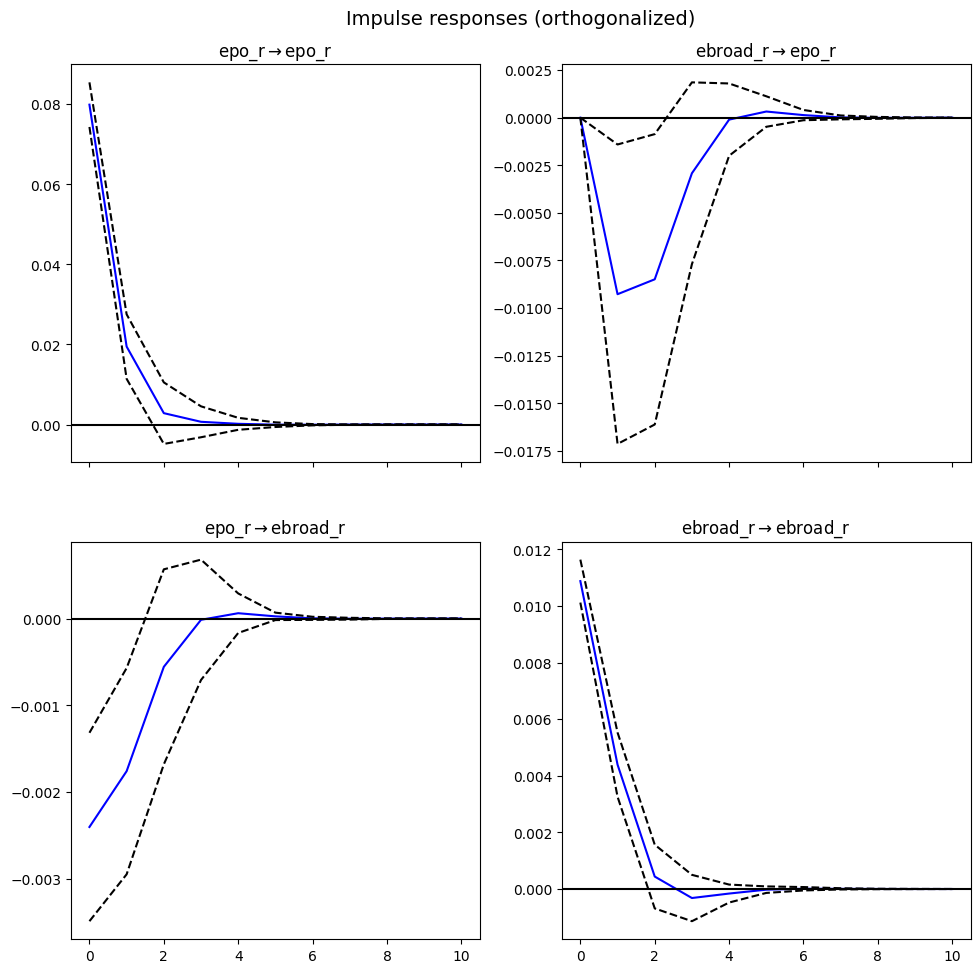

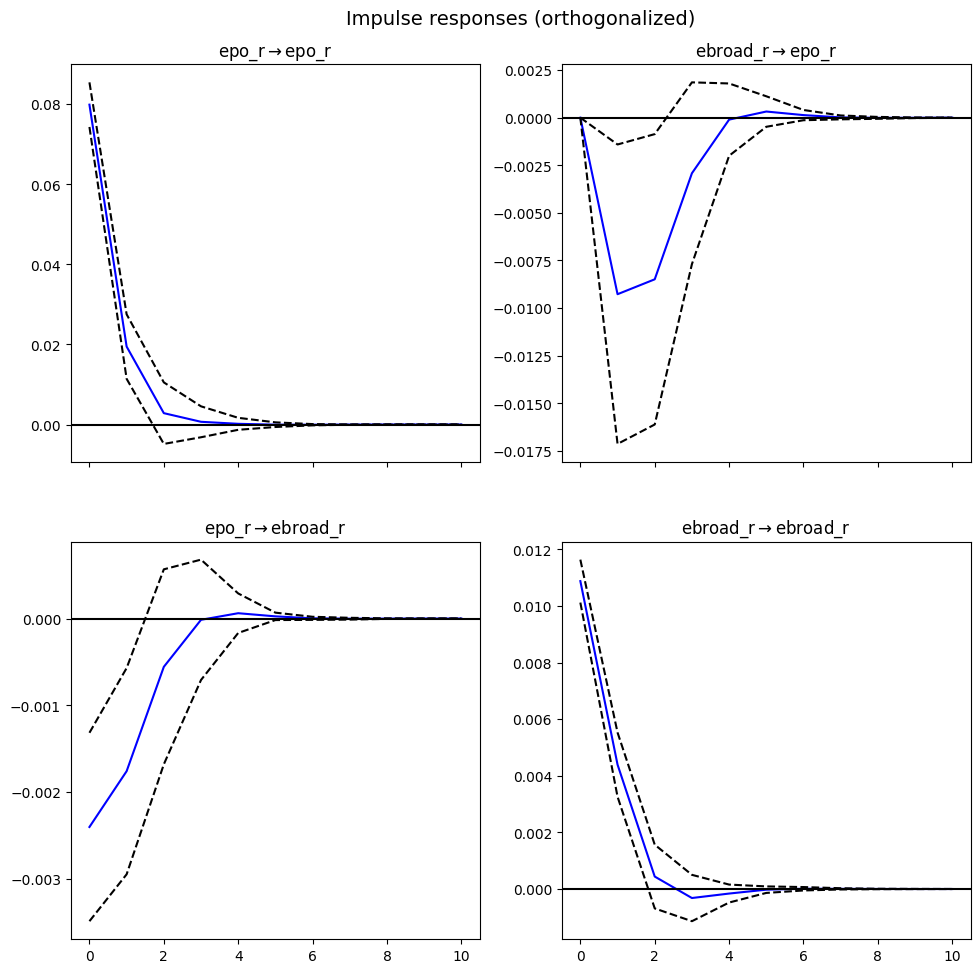

In [30]:
irf.plot(orth=True)

1.  an oil price increase leads to a depreciation of the U.S. EER during the first months after the shock and an appreciation afterwards. While the short-run reaction (i.e., the depreciation) is statistically significant, the long-run response (i.e., the appreciation) is not significant. 

2. The impact of a positive shock on U.S. EER tends to significantly reduce oil price. Thus, the responses in favor of a negative relation between oil price and exchange rate are statistically significant, while those that imply a positive relation are not statistically significant.


Therefore, these findings show evidence in favor of a negative relationship between oil price and exchange rate, which is in concordance with most of the economic theory previously highlighted in the Introduction.

In [31]:
import numpy as np
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.irf import BaseIRAnalysis, IRAnalysis
from statsmodels.tsa.vector_ar import irf

#import importlib

# Reload the module
#importlib.reload(irf)

# Fit VAR model
model = VAR(my_data[['ebroad_r', 'epo_r']].diff().dropna())
results = model.fit(maxlags=2)

# Calculate impulse responses
irf = results.irf()

/opt/anaconda3/envs/datasci/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


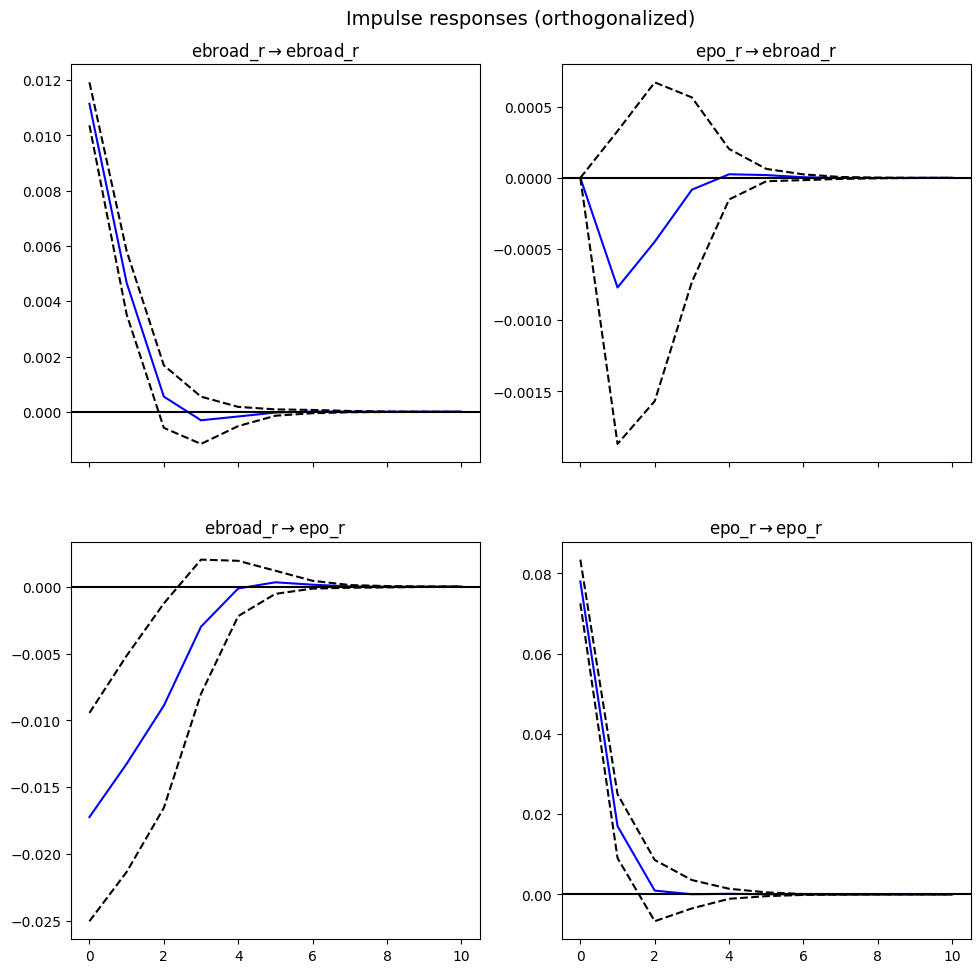

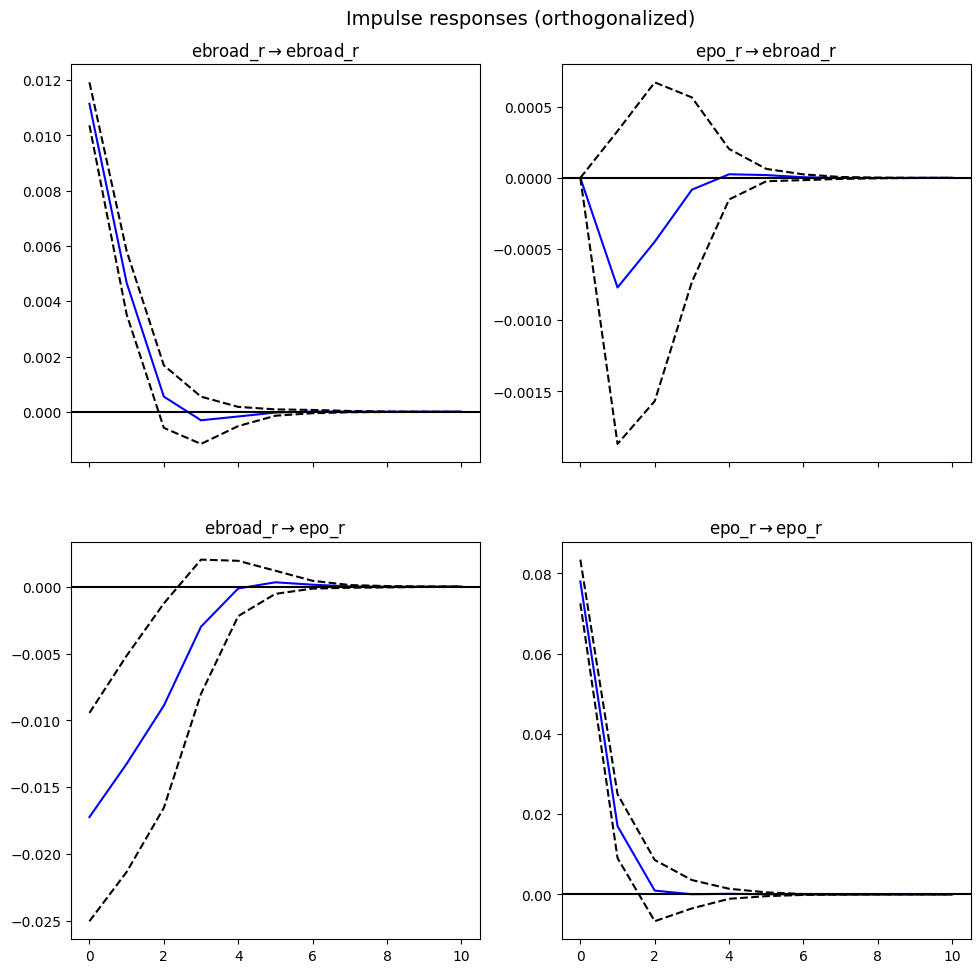

In [32]:
irf.plot(orth=True)

For lags 5-10:

There is significant Granger causality between the variables being tested at the given lag lengths.

If the test indicates significant Granger causality from variable A to variable B, it means that variable A can be used to predict future values of variable B better than using B alone. Conversely, if there's significant Granger causality from B to A, then B can predict future values of A better than using A alone. If there's mutual Granger causality between A and B, then both variables contain information that helps predict each other's future values.

The strength of this negative relationship is moderate, indicating that there may be other factors influencing the relationship between the two variables.

#### Detecting a Suspected Break at a Known Date (1999): The Chow Test

Chow Test tests if the true coefficients in two different regressions models are equal. The null hypothesis is equivalent to saying that the model before the possible break point is the same as the model after the possible break point. The alternative hypothesis is the model fitting each periods are different. 

It performs an F-test on the Chow Statistic 

The models in all three period (pooled, 1, 2) must have normally distributed error with mean 0, as well as independent and identically distributed errors, to satisfy Gauss-Markov assumptions. 

1. Perform Chow Test to test for a structural break at the introduction of the Euro in January 1999. Some major currencies disappeared, and one major currency was created. This was a shock to currency markets, as well as the oil vs. dollar relationship. 

In [97]:
import chowtest as ct

independently and identically distributed residual requirement = constant mean and variance without serial correlation in the residuals. 


We test for autocorrelation and heteroskedasticity in the residuals. I did the same tests on their growth rates (the difference in natural logs). I also plotted the residuals and estimated their mean.

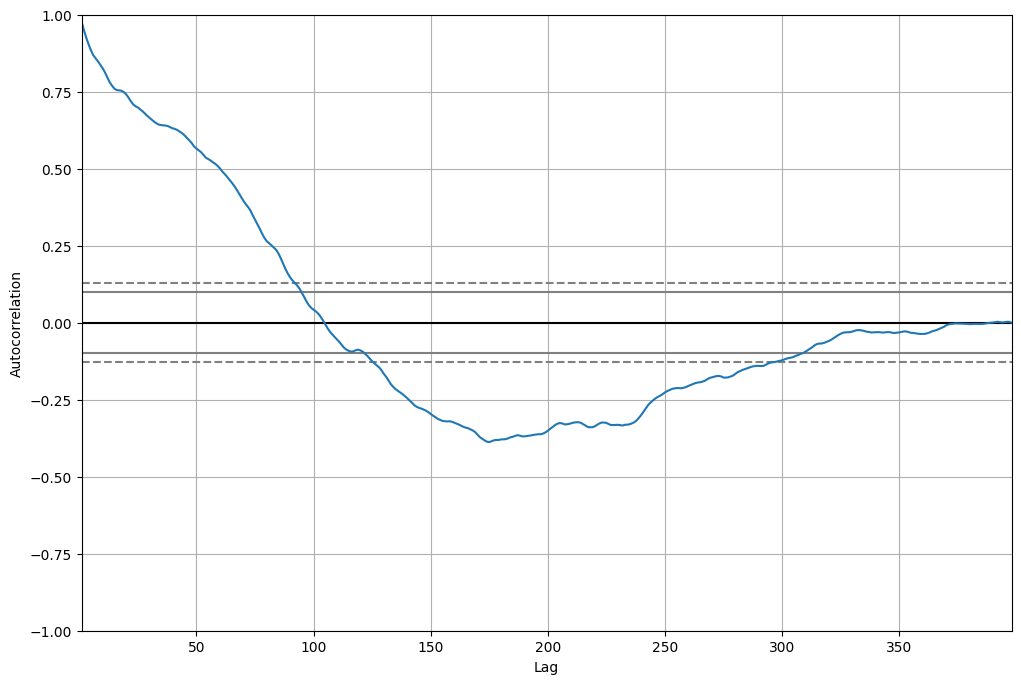

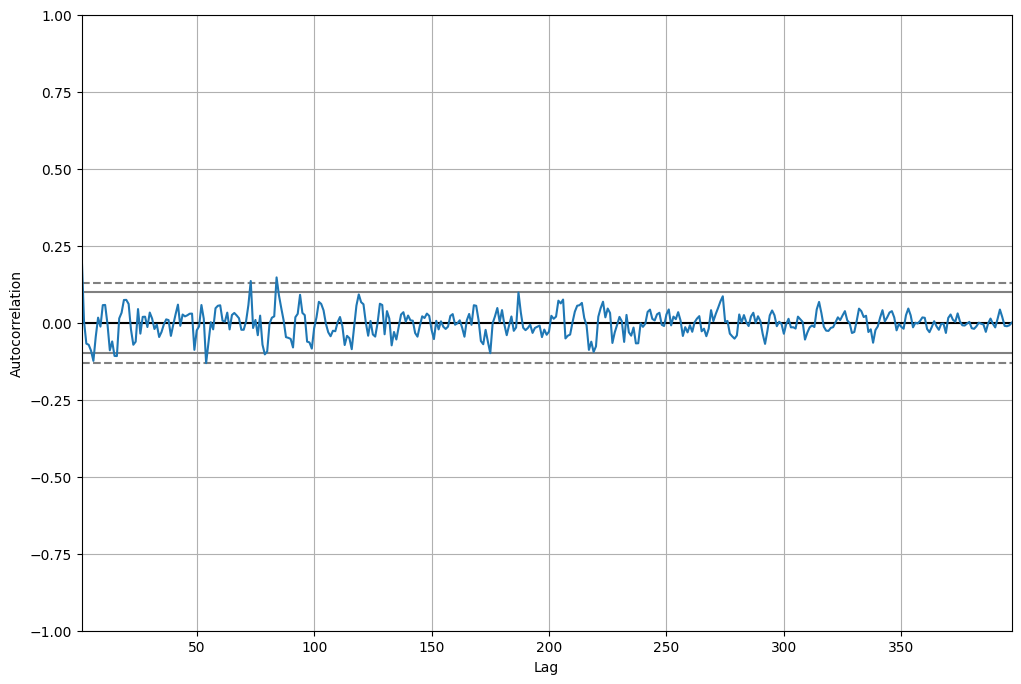

In [98]:
# sets the plot size to 12x8
mpl.rcParams['figure.figsize'] = (12,8)

# to reduce typing, I saved ebroad_r as X and epo_r as y
X = pd.DataFrame(my_data[['ebroad_r']])
y = pd.DataFrame(my_data.epo_r)

# to reduce typing, I saved the differenced ebroad_r as X_diff and epo_r as y_diff
X_diff = X.diff().dropna()
y_diff = y.diff().dropna()

# saves the residuals from the undifferenced X and y OLS model
un_diffed_resids = ct.linear_residuals(X, y).residuals

# saves the residuals from the differenced X and y OLS model
diffed_resids = ct.linear_residuals(X_diff, y_diff).residuals

# plots the ACF for the residuals of the OLS  regression of epo_r on ebroad_r
pd.plotting.autocorrelation_plot(un_diffed_resids)
plt.show()

# plots the ACF for the residuals of the OLS regression of the differenced epo_r on 
# differenced ebroad_r
pd.plotting.autocorrelation_plot(diffed_resids)
plt.show()

1. The residuals from the simple OLS odel have strong auto-correlation.
2. Residuals from the OLS of the growth rates are not auto-correlated.

In [99]:
from statsmodels.stats.diagnostic import het_breuschpagan
# Assuming X is your exogenous variables matrix
# If X does not already contain a constant column, add one
X_np= np.column_stack((np.ones(len(X)), X))
X_diff_np = np.column_stack((np.ones(len(X_diff)), X_diff))

# tests for heteroskedasticity in the full-sample residuals
print('F-statistic for the Breusch-Pagan Test the OLS model: ' + 
      str(het_breuschpagan(un_diffed_resids, X_np)[2]))
print('p-value for the Breusch-Pagan F-Test the OLS model: ' + 
      str(het_breuschpagan(un_diffed_resids, X_np)[3]))


# tests for heteroskedasticity in the full-sample residuals
print('F-statistic for the Breusch-Pagan Test the growth rate OLS model: ' + 
      str(het_breuschpagan(diffed_resids, X_diff_np)[2]))
print('p-value for the Breusch-Pagan R-Test the growth rate OLS model: ' + 
      str(het_breuschpagan(diffed_resids, X_diff_np)[3]))

F-statistic for the Breusch-Pagan Test the OLS model: 91.82089271084826
p-value for the Breusch-Pagan F-Test the OLS model: 1.0690068149434386e-19
F-statistic for the Breusch-Pagan Test the growth rate OLS model: 3.792580094801139
p-value for the Breusch-Pagan R-Test the growth rate OLS model: 0.05218844218608954


In [100]:
# pandas series format containing the constant column

#X_pd = pd.DataFrame(np.column_stack((np.ones(len(X_np)), X_np)))
#X_diff_pd = pd.DataFrame(np.column_stack((np.ones(len(X_diff_np)), X_diff_np)))
X_pd = pd.DataFrame(X_np)
X_diff_pd = pd.DataFrame(X_diff_np)

In [101]:
X_diff_pd

,0,1
0,1.0,-0.030078
1,1.0,-0.018562
2,1.0,-0.009029
3,1.0,-0.015941
4,1.0,0.009238
...,...,...
392,1.0,0.007240
393,1.0,0.011031
394,1.0,0.001413
395,1.0,-0.014066


Histogram of residuals for regular OLS model possibly shows a double-humped shape.

(array([11., 38., 51., 31., 36., 56., 50., 79., 40.,  6.]),
 array([-0.92776832, -0.74985725, -0.57194618, -0.39403511, -0.21612404,
        -0.03821297,  0.1396981 ,  0.31760917,  0.49552024,  0.67343131,
         0.85134238]),
 <BarContainer object of 10 artists>)

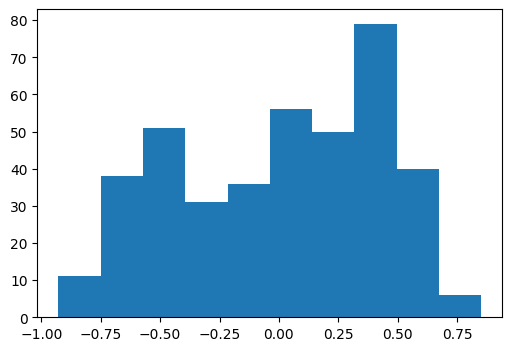

In [102]:
# sets the plot size to 12x8
mpl.rcParams['figure.figsize'] = (6,4)
                                          
# plots the histogram of residuals
plt.hist(un_diffed_resids)

Histogram of residuals for the OLs model looking at growth rates shows a bell-shaped curve 

(array([  1.,   1.,   7.,  19.,  81., 170.,  99.,  15.,   3.,   1.]),
 array([-0.43759828, -0.35790159, -0.27820489, -0.1985082 , -0.11881151,
        -0.03911482,  0.04058187,  0.12027857,  0.19997526,  0.27967195,
         0.35936864]),
 <BarContainer object of 10 artists>)

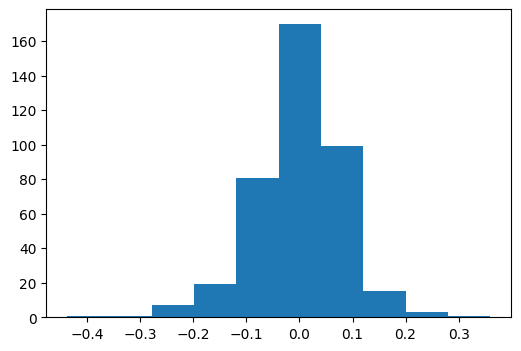

In [103]:
# sets the plot size to 12x8
mpl.rcParams['figure.figsize'] = (6,4)
                                          
# plots the histogram of residuals
plt.hist(diffed_resids)

Perform normality test for the residuals from both models:

In [104]:
# imports the normality test from scipy.stats
from scipy.stats import normaltest

# performs the normality test on the residuals from the non-differenced OLS model
print(normaltest(un_diffed_resids))
# performs the normality test on the residuals from the differenced OLS model
print(normaltest(diffed_resids))

NormaltestResult(statistic=139.93912713934466, pvalue=4.098308440718485e-31)
NormaltestResult(statistic=52.30465354494335, pvalue=4.387213745430691e-12)


In [105]:
print('Mean of OLS residuals: ' + str(np.mean(un_diffed_resids)))
print('Mean of OLS model of growth rate residuals: ' + str(np.mean(diffed_resids)))

Mean of OLS residuals: -7.141133022714575e-17
Mean of OLS model of growth rate residuals: 5.593063096348396e-19


`statistic` measures how much the data deviates from a normal distribution. High values indicate greater deviation from normality. 

`p_value` is the probability of observing the test statistic, or more extreme value, if the null hypothesis were true (data is normally distributed). Here, a low p-value suggests the null hypothesis should be rejected: **data is not normally distributed**.

We conclude that residuals of both models fail test for normality. However, the mean of residuals of both models is very close to zero. 

Use growth rates model. Assume that Chow Test result will be robust to non-normality of residuals. 

Define the split date

#### 1999 EU creation

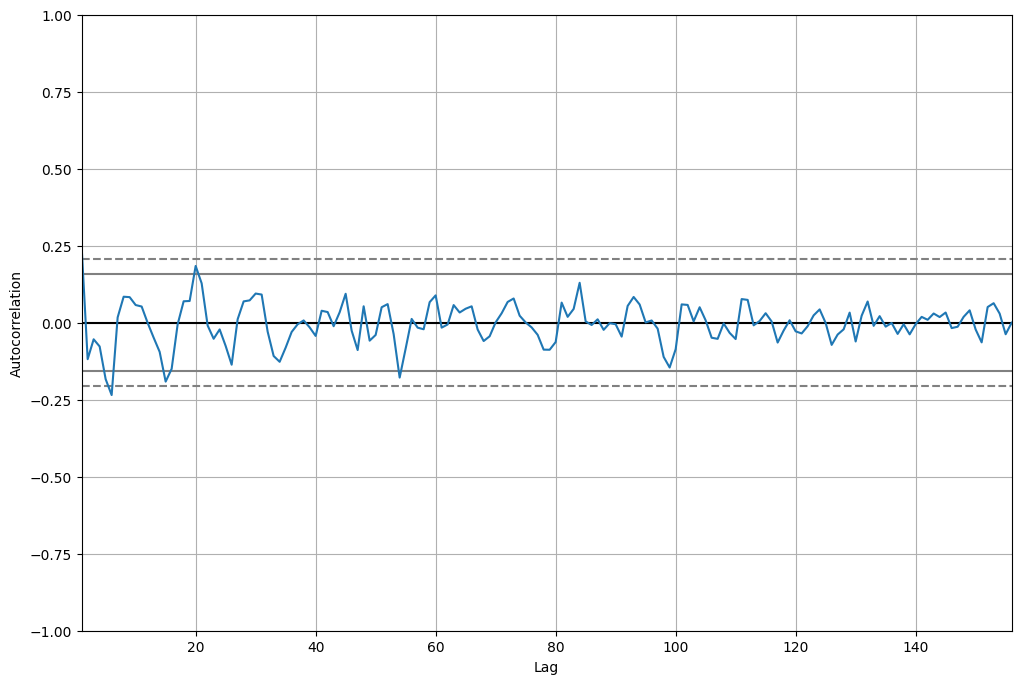

In [106]:
# sets the plot size to 12x8
mpl.rcParams['figure.figsize'] = (12,8)

# creates split dates for our sample period (EU creation)
stop = '1999-01-01'
start = '1999-02-01'

# plots the ACF for the residuals of the OLS regression of the differenced epo_r on 
# differenced ebroad_r
pd.plotting.autocorrelation_plot(ct.linear_residuals(X_diff.loc[:stop], 
                                                        y_diff.loc[:stop]).residuals)
plt.show()

# sets the plot size to 12x8
mpl.rcParams['figure.figsize'] = (12,8)


In [107]:
X_diff.index

DatetimeIndex(['1986-02-01', '1986-03-01', '1986-04-01', '1986-05-01',
               '1986-06-01', '1986-07-01', '1986-08-01', '1986-09-01',
               '1986-10-01', '1986-11-01',
               ...
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01'],
              dtype='datetime64[ns]', name='Date', length=397, freq=None)

In [108]:
X_diff_pd.index = X_diff.index

In [109]:
X_diff_pd.loc[:stop]

,0,1
Date,,
1986-02-01,1.0,-0.030078
1986-03-01,1.0,-0.018562
1986-04-01,1.0,-0.009029
1986-05-01,1.0,-0.015941
1986-06-01,1.0,0.009238
...,...,...
1998-09-01,1.0,-0.017390
1998-10-01,1.0,-0.028515
1998-11-01,1.0,-0.003388


In [110]:
# tests for heteroskedasticity in the full-sample residuals
print('F-statistic for the Breusch-Pagan Test the growth rate OLS model: ' + 
      str(het_breuschpagan(ct.linear_residuals(X_diff.loc[:stop], 
                                                        y_diff.loc[:stop]).residuals, 
                           X_diff_pd.loc[:stop])[2]))
print('p-value for the Breusch-Pagan F-Test the growth rate OLS model: ' + 
      str(het_breuschpagan(ct.linear_residuals(X_diff.loc[:stop], 
                                                        y_diff.loc[:stop]).residuals, 
                           X_diff_pd.loc[:stop])[3]))

print('Mean of OLS model of growth rate residuals pre-Euro: ' + 
      str(np.mean(ct.linear_residuals(X_diff.loc[:stop], 
                                                        y_diff.loc[:stop]).residuals)))

F-statistic for the Breusch-Pagan Test the growth rate OLS model: 11.532630948690612
p-value for the Breusch-Pagan F-Test the growth rate OLS model: 0.0008701042792161812
Mean of OLS model of growth rate residuals pre-Euro: -1.3344026738283132e-18


<function matplotlib.pyplot.show(close=None, block=None)>

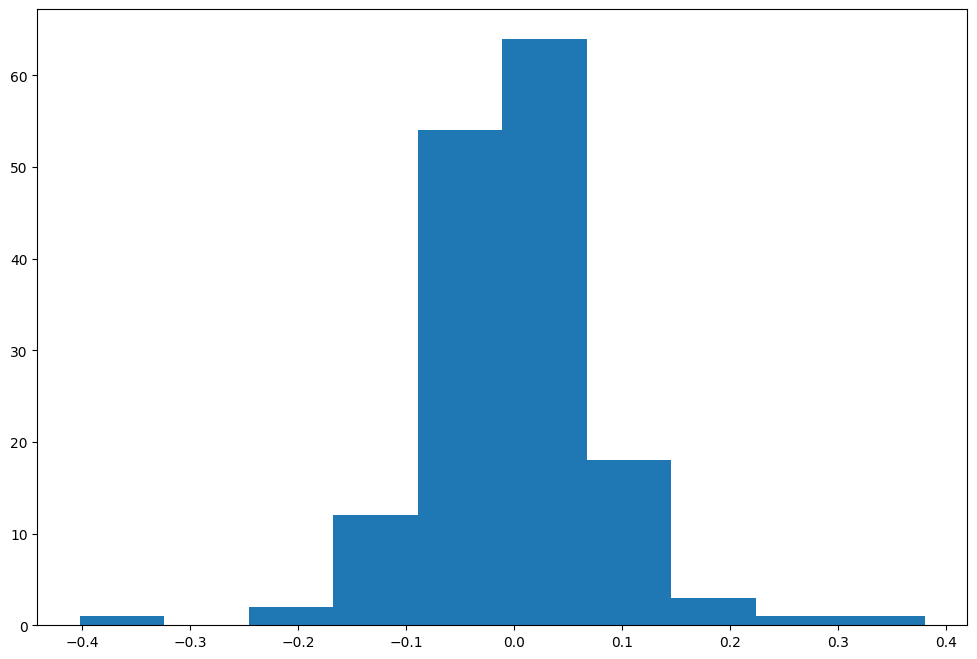

In [111]:
# plots the histogram of residuals
plt.hist(ct.linear_residuals(X_diff.loc[:stop], y_diff.loc[:stop]).residuals)
plt.show

#### After 1999 EU creation

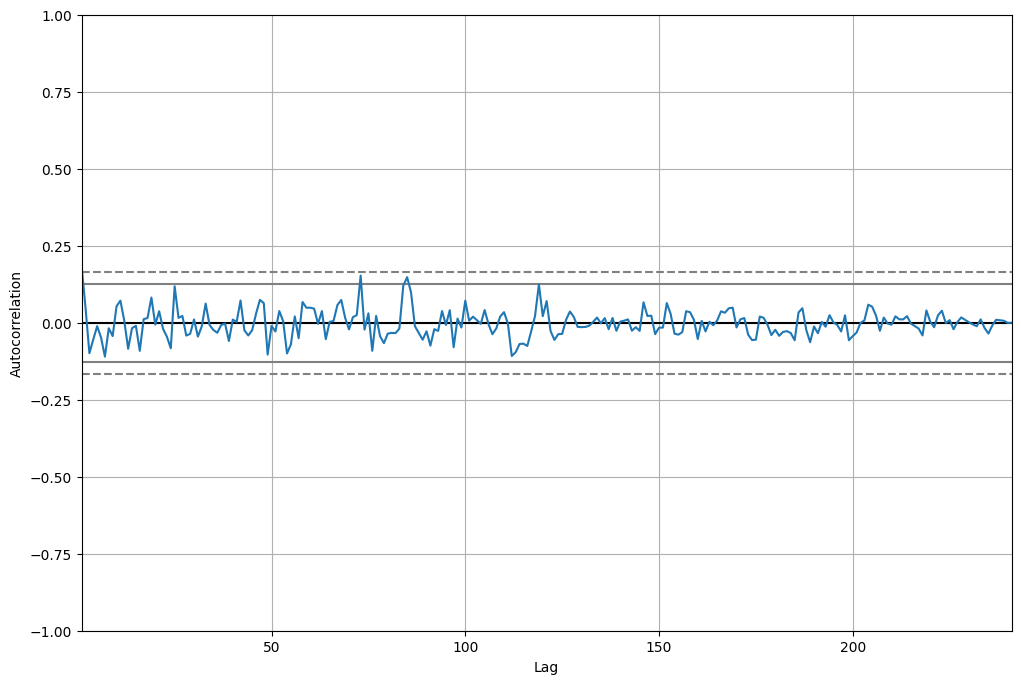

F-statistic for the Breusch-Pagan Test the growth rate OLS model: 1.6264420349768378
p-value for the Breusch-Pagan F-Test the growth rate OLS model: 0.20343412325719384
Mean of OLS model of growth rate residuals pre-Euro: -2.303367271006549e-19


In [112]:
# sets the plot size to 12x8
mpl.rcParams['figure.figsize'] = (12,8)

# plots the ACF for the residuals of the OLS regression of the differenced epo_r on 
# differenced ebroad_r
pd.plotting.autocorrelation_plot(ct.linear_residuals(X_diff[start:], 
                                                        y_diff[start:]).residuals)
plt.show()

# tests for heteroskedasticity in the full-sample residuals
print('F-statistic for the Breusch-Pagan Test the growth rate OLS model: ' + 
      str(het_breuschpagan(ct.linear_residuals(X_diff.loc[start:], 
                                                        y_diff.loc[start:]).residuals, 
                           X_diff_pd.loc[start:])[2]))
print('p-value for the Breusch-Pagan F-Test the growth rate OLS model: ' + 
      str(het_breuschpagan(ct.linear_residuals(X_diff.loc[start:], 
                                                        y_diff.loc[start:]).residuals, 
                           X_diff_pd.loc[start:])[3]))

print('Mean of OLS model of growth rate residuals pre-Euro: ' + 
      str(np.mean(ct.linear_residuals(X_diff.loc[start:], 
                                                        y_diff.loc[start:]).residuals)))

(array([ 1.,  1.,  5.,  8., 26., 50., 80., 51., 16.,  3.]),
 array([-0.36363084, -0.30547149, -0.24731214, -0.18915279, -0.13099344,
        -0.07283409, -0.01467473,  0.04348462,  0.10164397,  0.15980332,
         0.21796267]),
 <BarContainer object of 10 artists>)

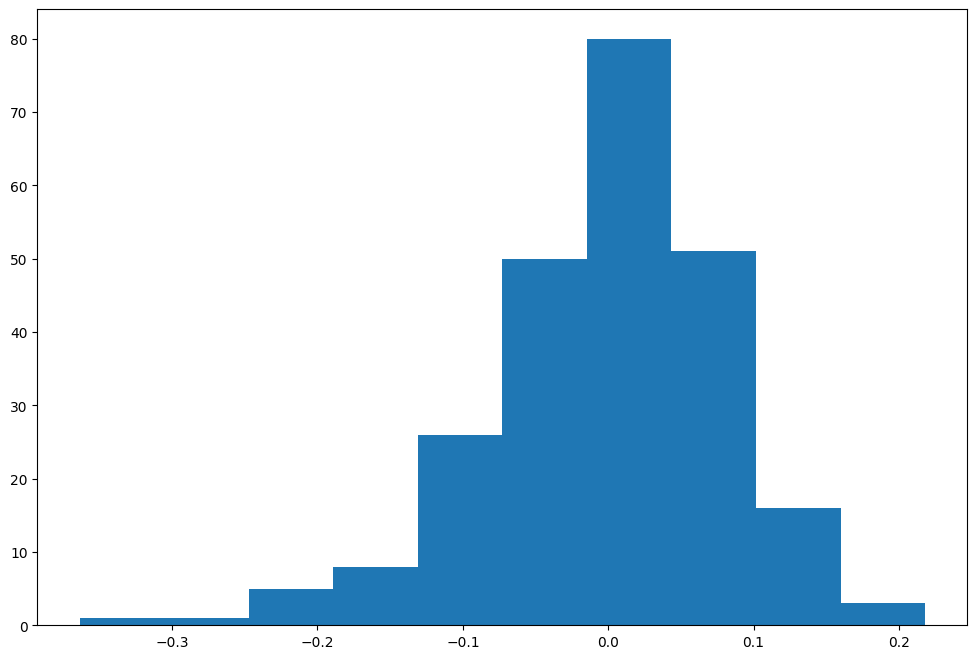

In [113]:
# plots the histogram of residuals
plt.hist(ct.linear_residuals(X_diff.loc[start:], y_diff.loc[start:]).residuals)

In [62]:
# performs the Chow Test
ct.ChowTest(X.diff().dropna(), y.diff().dropna(), stop, start)

(4.2402866987519525, 0.0009118458256104356)

Chow Test statistic = 4.24 tested against an F-distribution with 2 and 394 degrees of freedom (394).

The p-value is about 0.0009, meaning if the models before and after the split date are actually the same and we did an infinite number of trials, 0.09% of our results would show this level of difference in the models due to sampling error. It is safe to say that the model of real oil price and dollar exchange growth rates is different pre-Euro and post-Euro introduction.

#### 2008 financial crisis

In [63]:
stop = '2008-09-01'
start = '2008-10-01'

ct.ChowTest(X.diff().dropna(), y.diff().dropna(), stop, start)

(6.1592740131475745, 1.6430924752453002e-05)

#### 2014 oil crash

In [64]:
stop = '2014-06-01'
start = '2014-07-01'

ct.ChowTest(X.diff().dropna(), y.diff().dropna(), stop, start)

(2.097523053668933, 0.06492238213967738)

#### Using results of `ruptures` package

1.

In [54]:
stop = '2002-10-01'
start = '2002-11-01'
#stop = '2004-05-01'
#start = '2004-06-01'

ct.ChowTest(X.diff().dropna(), y.diff().dropna(), stop, start)

(5.4586271089628005, 7.177472059749501e-05)

2.

In [55]:
#stop = '2002-10-01'
#start = '2002-11-01'
stop = '2004-05-01'
start = '2004-06-01'

ct.ChowTest(X.diff().dropna(), y.diff().dropna(), stop, start)

(8.11423500316654, 2.658153632761895e-07)

3.

In [56]:
stop = '2006-02-01'
start = '2006-03-01'
#2007-10-01
#2011-02-01
#2012-10-01
ct.ChowTest(X.diff().dropna(), y.diff().dropna(), stop, start)

(9.346503077676942, 1.991559506198115e-08)

The Chow Test statistic measures the difference between the estimated regression sum of squares under the null hypothesis (no structural break) and the sum of squares under the alternative hypothesis (structural break), relative to the sum of squares under the alternative hypothesis.

A higher Chow Test statistic indicates a larger difference between the models before and after the split date, suggesting a more significant structural break. In contrast, a Chow Test statistic closer to zero would indicate less evidence of a structural break.

If there is evidence of a structural break, it may mean to we need to split the data nto 2 samples and run separate regressions. 

Stages in using test:

- run the regression using all the observations, before and after the structural break, collect the RSS
- Run two separate regressions, one before RSS(1), one after, RSS (2), the structural break
- 

Limitations of Chow Test:

- slitting the data may mean fewer degrees of freedom
- theoretica basis for the cut off point ( we do this by testing multiple breaks)
- There is the potential for structural instability across the whole data range. It is possible to test every observation for a structural break


Testing for structural break with unknown date:

Ben-David et al (2003) cautions that “just as failure to allow one break can cause non-rejection of the unit root null by the Augmented Dickey –Fuller test, failure to allow for two breaks, if they exist, can cause non-rejection of the unit root null by the tests which only incorporate one break” (BenDavid et al, 2003: 304). 


Take the date with the highest Chow-statistic value and split dataset at that date to check for any differences...

### Testing use of package `ruptures` for Python

In [114]:
import ruptures as rp


In [115]:
X.diff().dropna().loc['2012-01-01':'2017-12-01']

,ebroad_r
Date,
2012-01-01,-0.007669
2012-02-01,-0.015059
2012-03-01,0.004422
2012-04-01,0.002479
2012-05-01,0.014084
...,...
2017-08-01,-0.010090
2017-09-01,-0.006737
2017-10-01,0.016513


In [123]:
y.diff().dropna()['epo_r']

Date
1986-02-01   -0.391449
1986-03-01   -0.199181
1986-04-01    0.019915
1986-05-01    0.177744
1986-06-01   -0.141071
                ...   
2018-10-01   -0.218568
2018-11-01   -0.136618
2018-12-01    0.040071
2019-01-01    0.065270
2019-02-01    0.052384
Name: epo_r, Length: 397, dtype: float64

In [152]:
signal = X.diff().dropna()['ebroad_r'] / y.diff().dropna()['epo_r'] # try divide and subtract
signal

Date
1986-02-01    0.076837
1986-03-01    0.093192
1986-04-01   -0.453370
1986-05-01   -0.089684
1986-06-01   -0.065487
                ...   
2018-10-01   -0.033124
2018-11-01   -0.080741
2018-12-01    0.035255
2019-01-01   -0.215510
2019-02-01    0.012283
Length: 397, dtype: float64

`fit_predict`:

Fit to the signal and return the optimal breakpoints.

`pen` = 10 is the penalty value, it measures the compromise between the detection time and the accuracy.

`jump` = 20 is the minimal distance between two breakpoints (subsample happens one every jump points)

`min_size` = minimum segment length

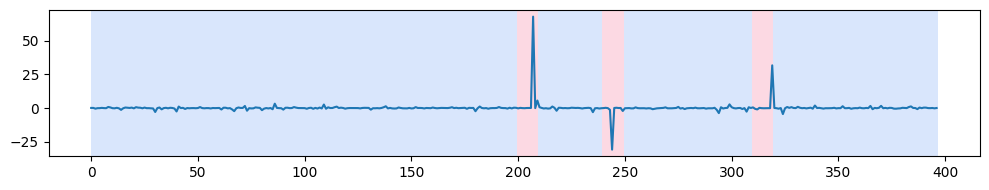

In [153]:
pelt = rp.Pelt(jump = 10)
bkps = pelt.fit_predict(signal.values, 5) # Series has no attribute 'reshape'
rp.display(signal.values, bkps)
plt.show()

In [50]:
print(f"Python implementation:\t{bkps}")
for b in bkps:
    if b!=397:
        print(signal.index[int(b)])

Python implementation:	[200, 220, 240, 260, 300, 320, 397]
2002-10-01 00:00:00
2004-06-01 00:00:00
2006-02-01 00:00:00
2007-10-01 00:00:00
2011-02-01 00:00:00
2012-10-01 00:00:00


Perform statistical test to ensure that the sub samples are drawn from different distributions

First Period

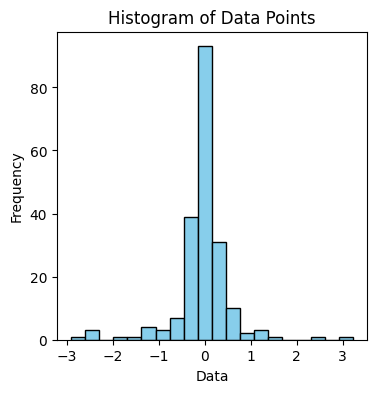

Mean: -0.040112080991471545
Standard Deviation: 0.6212366554072007
Skewness: -0.3273567464803986
Kurtosis: 9.375710219296538


In [132]:
# period 1 = signal.loc[:'2002-10-01']
data1 = signal.loc[:'2002-10-01']
# Plot histogram
fig = plt.figure(figsize=(4, 4))
plt.hist(data1, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Data')
plt.ylabel('Frequency')
plt.title('Histogram of Data Points')
plt.show()

# Compute statistical moments
mean = np.mean(data1)
std_dev = np.std(data1)
skewness = stats.skew(data1)
kurtosis = stats.kurtosis(data1)

print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

In [155]:
data2.loc['2003-05-01'] = -0.03

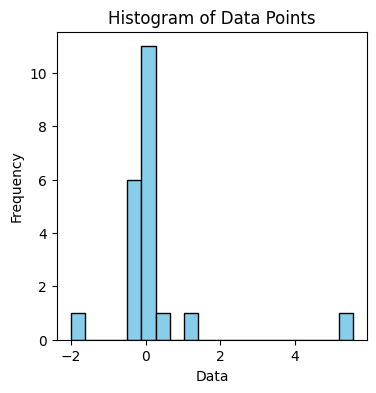

Mean: 0.21787027330730757
Standard Deviation: 1.310666456765427
Skewness: 2.9918354453612594
Kurtosis: 10.531205332101555


In [156]:
# MODIFIED period 2
#data2 = signal.loc['2002-10-01':'2004-06-01']

# Plot histogram
fig = plt.figure(figsize=(4, 4))
plt.hist(data2, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Data')
plt.ylabel('Frequency')
plt.title('Histogram of Data Points')
plt.show()

# Compute statistical moments
mean = np.mean(data2)
std_dev = np.std(data2)
skewness = stats.skew(data2)
kurtosis = stats.kurtosis(data2)

print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")


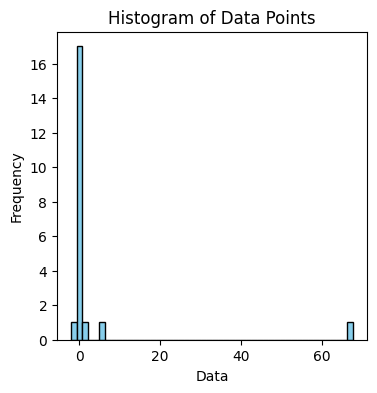

Mean: 3.441416697242514
Standard Deviation: 14.420292467213006
Skewness: 4.192802182749001
Kurtosis: 15.738498562800043


In [137]:
# period 3
data2 = signal.loc['2002-10-01':'2004-06-01']

# Plot histogram
fig = plt.figure(figsize=(4, 4))
plt.hist(data2, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Data')
plt.ylabel('Frequency')
plt.title('Histogram of Data Points')
plt.show()

# Compute statistical moments
mean = np.mean(data2)
std_dev = np.std(data2)
skewness = stats.skew(data2)
kurtosis = stats.kurtosis(data2)

print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")


Compare data1 with data2

Check the price of oil over the same period

Perform PELT Method but for years 2012-2017 (to match `loadedbarrels` dataset)

In [64]:
signal = X.diff().dropna().loc['2012-01-01':'2017-12-01']['ebroad_r'] / y.diff().dropna().loc['2012-01-01':'2017-12-01']['epo_r']
signal

Date
2012-01-01   -0.598651
2012-02-01   -1.026395
2012-03-01    0.145213
2012-04-01   -0.082257
2012-05-01   -0.163076
                ...   
2017-08-01   -0.302158
2017-09-01   -0.228853
2017-10-01    0.175267
2017-11-01    0.065882
2017-12-01   -0.028377
Length: 72, dtype: float64

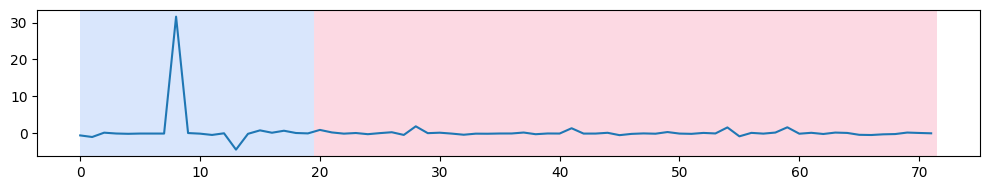

In [75]:
pelt = rp.Pelt(jump = 20) # jump 20
bkps = pelt.fit_predict(signal.values, 10) # Series has no attribute 'reshape'
rp.display(signal.values, bkps)
plt.show()

In [71]:
print(f"Python implementation:\t{bkps}")
for b in bkps:
    if b!=72:
        print(signal.index[int(b)])

Python implementation:	[15, 72]
2013-04-01 00:00:00


Structural change in mid 2013